In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
import warnings
warnings.filterwarnings('ignore')

## Data collection

In [97]:
df = pd.read_csv('car_price_data.csv')

## Exploratory Data Analysis

In [99]:
df

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km          6   
1                   No    Petrol             3  192000 km          6   
2                   No    Petrol           1.3  200000 km          4   
3                  Yes    Hybrid           2.5  168966 km          4   
4                  Yes    Petrol           1.3   91901 km          4   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km          4   
19233              Yes    Petrol           2.4  161600 km          4   
19234              Yes    Diesel             2  116365 km          4   
19235              Yes    Diesel             2   51258 km          4   
19236              Yes    Hybrid           2.4  186923 km          4   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

In [100]:
df.shape

(19237, 18)

In [101]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [102]:
df = df.drop(['ID','Doors'],axis = 1)

In [103]:
df.duplicated().sum()

3512

In [104]:
df = df.drop_duplicates()

In [105]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15725 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             15725 non-null  int64 
 1   Levy              15725 non-null  object
 2   Manufacturer      15725 non-null  object
 3   Model             15725 non-null  object
 4   Prod. year        15725 non-null  int64 
 5   Category          15725 non-null  object
 6   Leather interior  15725 non-null  object
 7   Fuel type         15725 non-null  object
 8   Engine volume     15725 non-null  object
 9   Mileage           15725 non-null  object
 10  Cylinders         15725 non-null  int64 
 11  Gear box type     15725 non-null  object
 12  Drive wheels      15725 non-null  object
 13  Wheel             15725 non-null  object
 14  Color             15725 non-null  object
 15  Airbags           15725 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 2.0+ MB


In [107]:
df.describe()

Price    Prod. year     Cylinders       Airbags
count  1.572500e+04  15725.000000  15725.000000  15725.000000
mean   2.027944e+04   2010.518919      4.483561      6.543339
std    2.106390e+05      6.012122      1.134466      4.067728
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    7.527000e+03   2008.000000      4.000000      4.000000
50%    1.416600e+04   2012.000000      4.000000      6.000000
75%    2.336400e+04   2014.000000      4.000000     12.000000
max    2.630750e+07   2020.000000     16.000000     16.000000

In [108]:
df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

In [109]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

Numerical type columns:
Index(['Price', 'Prod. year', 'Cylinders', 'Airbags'], dtype='object')


## Data Cleaning

In [111]:
df['Levy'] = df['Levy'].replace('-',pd.NA)

In [112]:
median_levy = df['Levy'].dropna().astype(int).median()

In [113]:
df['Levy'] = df['Levy'].fillna(median_levy)

In [114]:
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo','',regex=False)

In [133]:
df['Drive wheels'] = df['Drive wheels'].replace('4x4','All-wheel drive')

In [135]:
df['Mileage'] = df['Mileage'].str.replace(' km','')

In [137]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

In [139]:
df

Price    Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0          LEXUS   RX 450        2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2011       Jeep   
2       8467   779.0          HONDA      FIT        2006  Hatchback   
3       3607   862.0           FORD   Escape        2011       Jeep   
4      11726   446.0          HONDA      FIT        2014  Hatchback   
...      ...     ...            ...      ...         ...        ...   
19230    470   645.0         TOYOTA    Prius        2011  Hatchback   
19232   8467   779.0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson        2010       Jeep   
19236    470   753.0        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19230              Yes    Hybrid            1.8   307325          4   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19236              Yes    Hybrid            2.4   186923          4   

      Gear box type     Drive wheels             Wheel   Color  Airbags  
0         Automatic  All-wheel drive        Left wheel  Silver       12  
1         Tiptronic  All-wheel drive        Left wheel   Black        8  
2          Variator            Front  Right-hand drive   Black        2  
3         Automatic  All-wheel drive        Left wheel   White        0  
4         Automatic            Front        Left wheel  Silver        4  
...             ...              ...               ...     ...      ...  
19230     Automatic            Front        Left wheel  Silver       12  
19232        Manual             Rear        Left wheel  Silver        5  
19233     Tiptronic            Front        Left wheel     Red        8  
19234     Automatic            Front        Left wheel    Grey        4  
19236     Automatic            Front        Left wheel   White       12  

[15725 rows x 16 columns]

In [141]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

Numerical type columns:
Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags'],
      dtype='object')


In [143]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [145]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [147]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Non-Categorical Features: ['Manufacturer', 'Model']
Discrete Features: ['Cylinders', 'Airbags']
Continuous Features: ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage']


## Data Visualization

In [150]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Cylinders
[ 6  4  8  1 12  3  2 16  5  7  9 10 14]

Airbags
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]



In [152]:
for i in discrete:
    print(df[i].value_counts())
    print()

Cylinders
4     12279
6      2429
8       605
5       165
3       107
2        42
12       38
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: int64

Airbags
4     5104
12    3963
8     1566
0     1393
6     1288
2     1047
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64



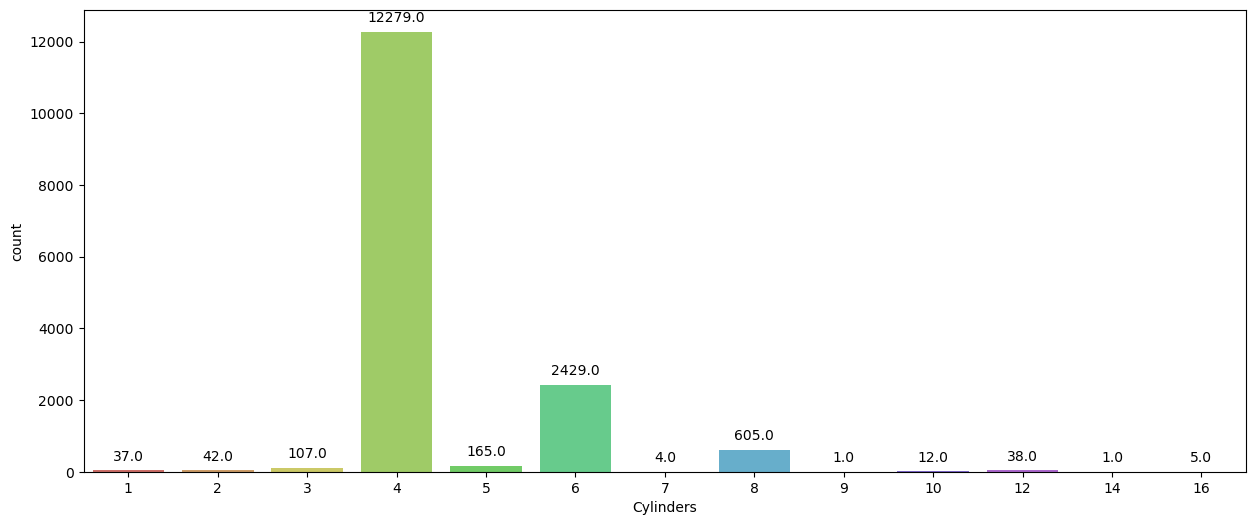

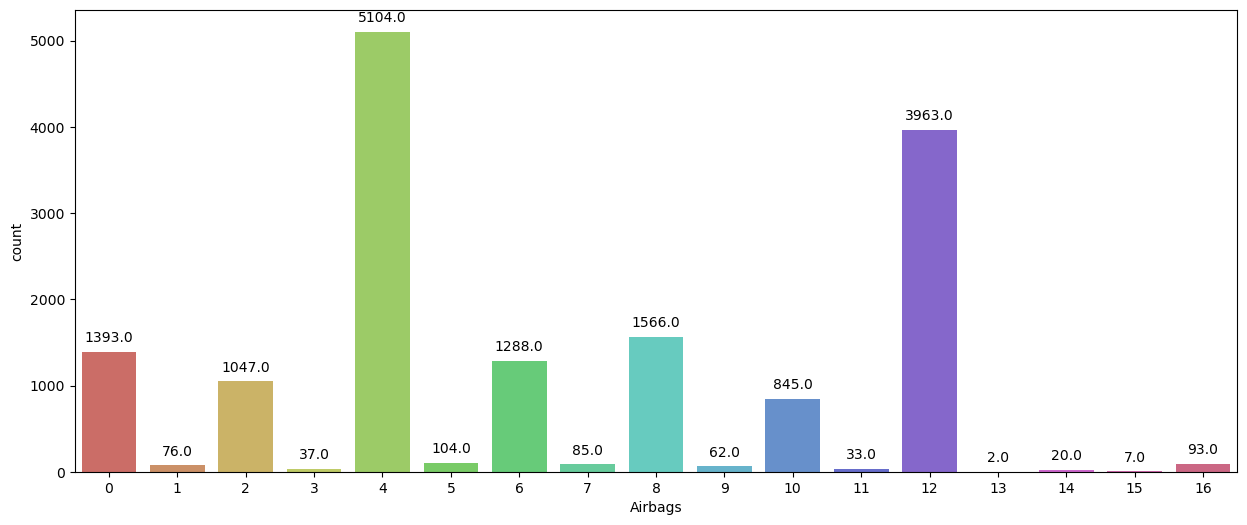

In [154]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

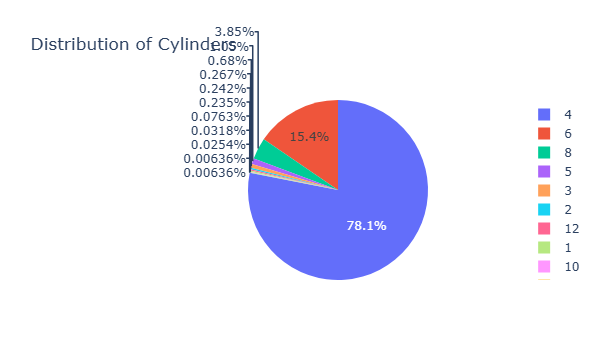

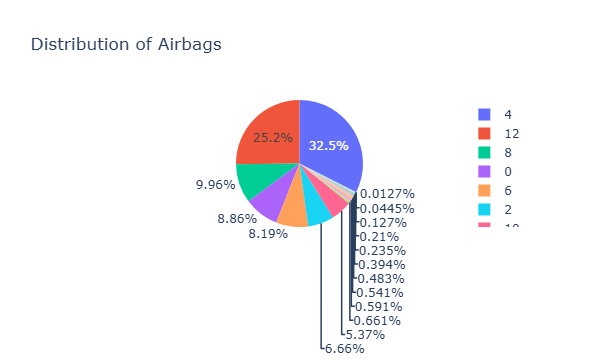

In [156]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [158]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Category
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']

Leather interior
['Yes' 'No']

Fuel type
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

Gear box type
['Automatic' 'Tiptronic' 'Variator' 'Manual']

Drive wheels
['All-wheel drive' 'Front' 'Rear']

Wheel
['Left wheel' 'Right-hand drive']

Color
['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Red' 'Sky blue' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']



In [160]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Category
Category
Sedan          7010
Jeep           4225
Hatchback      2548
Minivan         534
Coupe           476
Universal       311
Microbus        295
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

Leather interior
Leather interior
Yes    10558
No      5167
Name: count, dtype: int64

Fuel type
Fuel type
Petrol            8824
Diesel            3209
Hybrid            2424
LPG                714
CNG                468
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

Gear box type
Gear box type
Automatic    10088
Tiptronic     3064
Manual        1841
Variator       732
Name: count, dtype: int64

Drive wheels
Drive wheels
Front              10990
All-wheel drive     2766
Rear                1969
Name: count, dtype: int64

Wheel
Wheel
Left wheel          14293
Right-hand drive     1432
Name: count, dtype: int64

Color
Color
Black            3835
White            3611
Silver           3149
Grey        

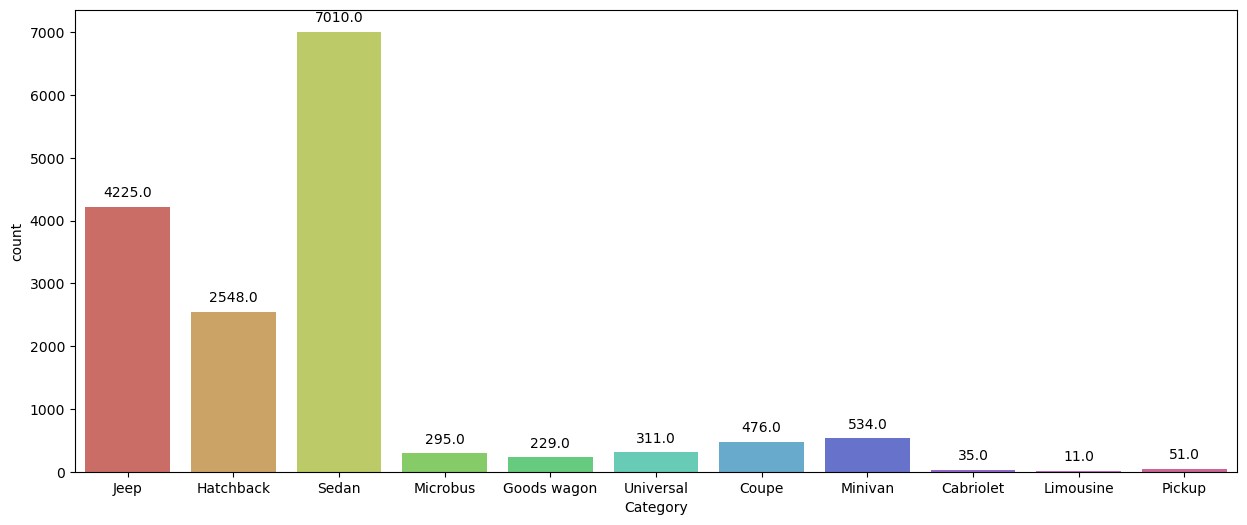

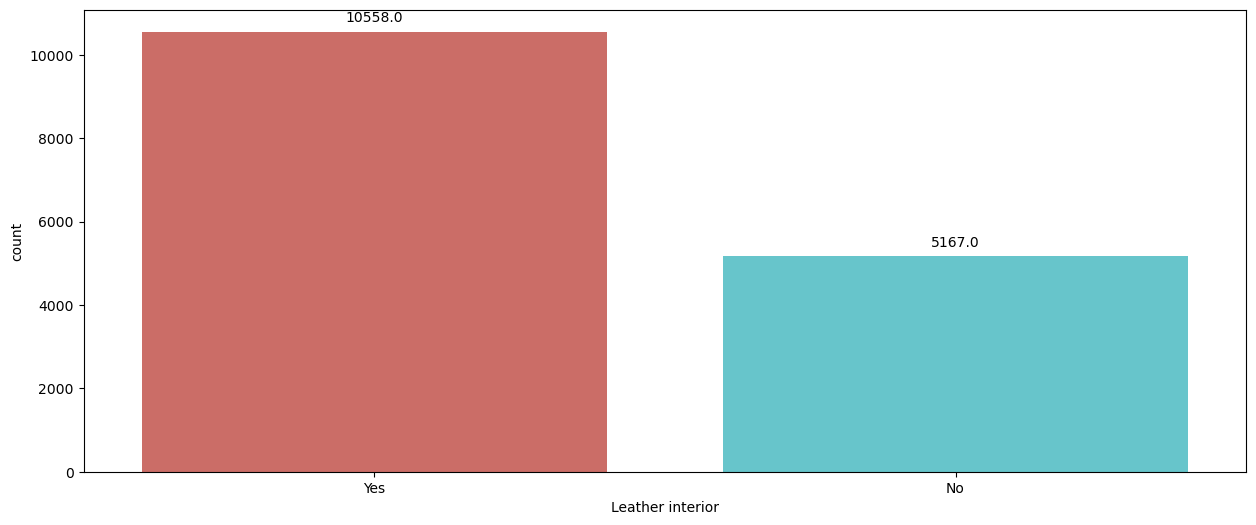

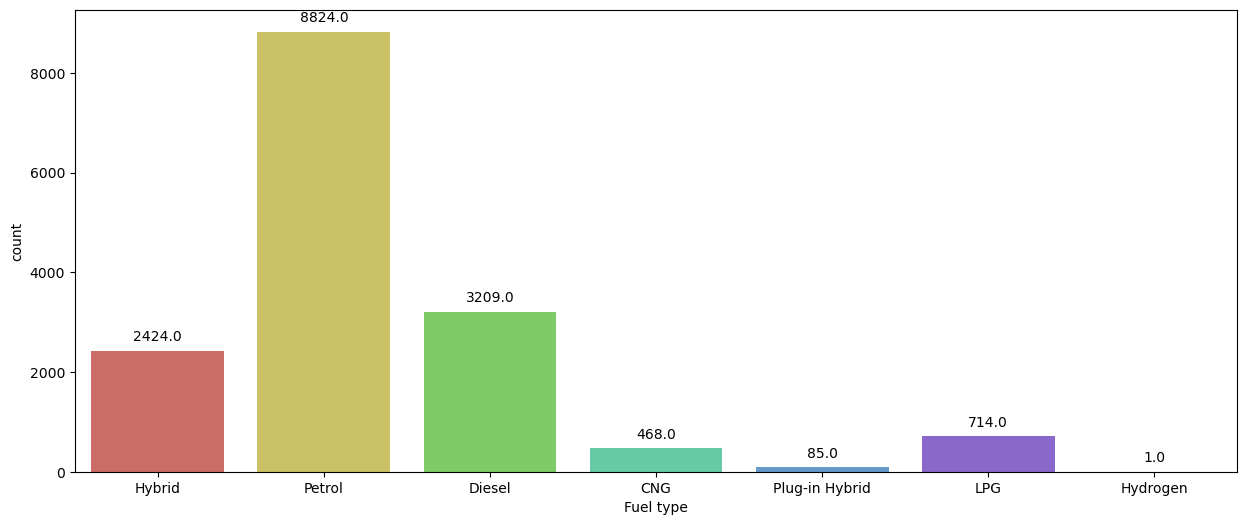

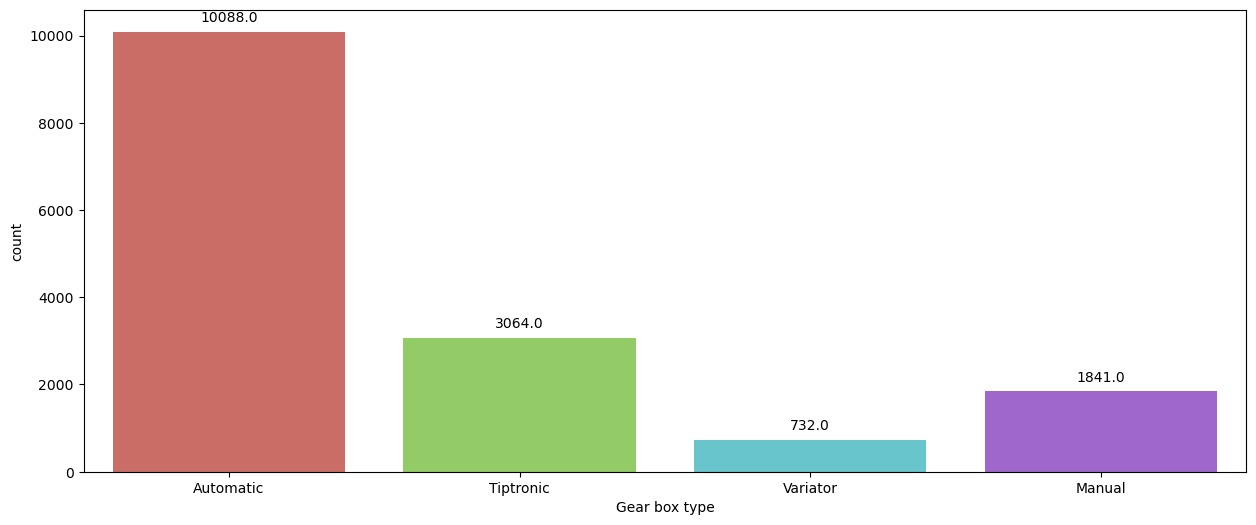

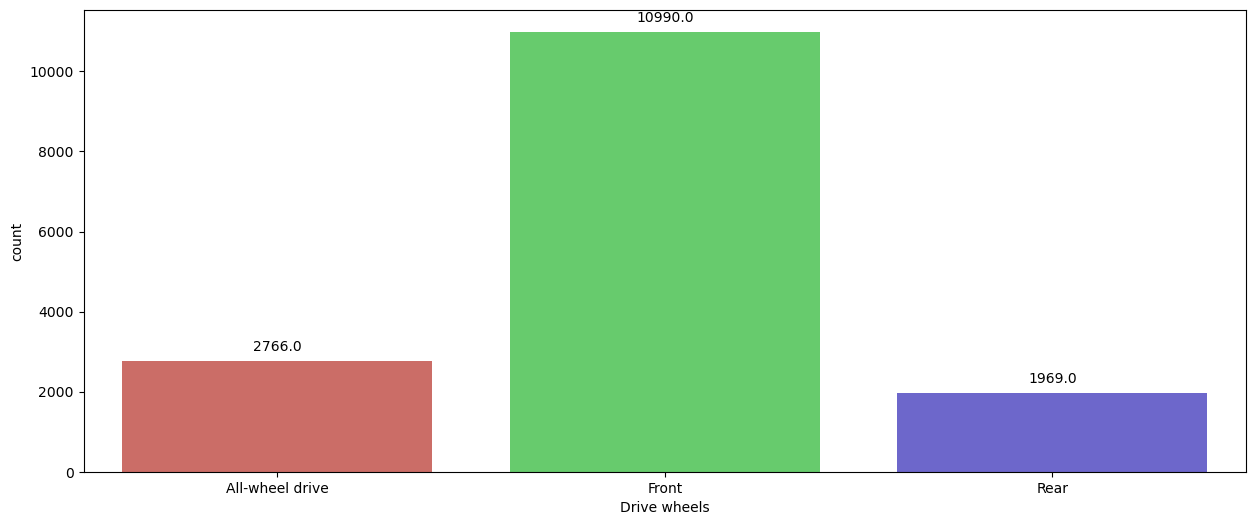

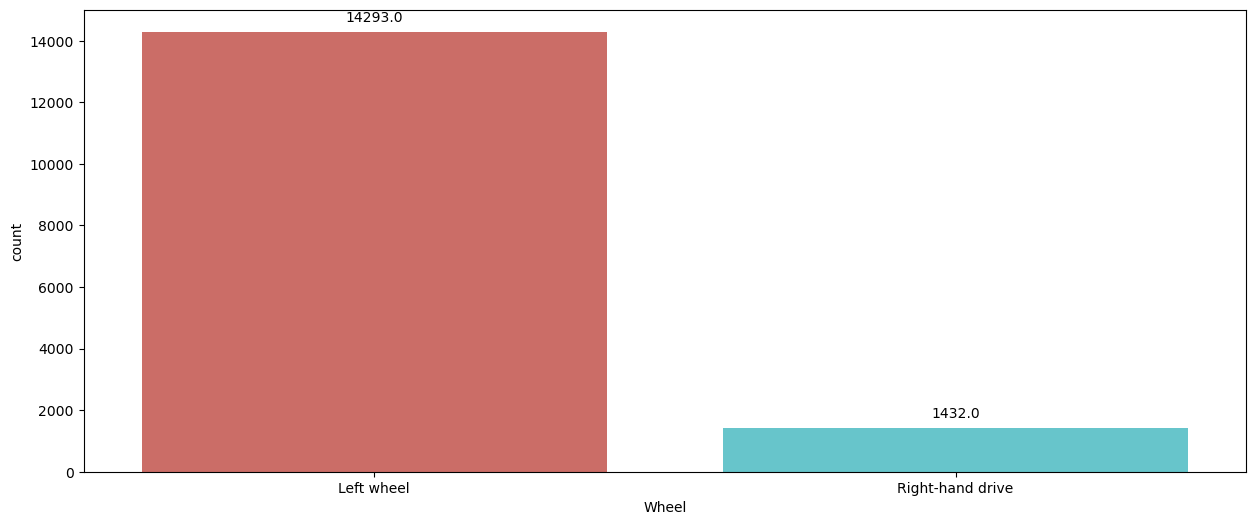

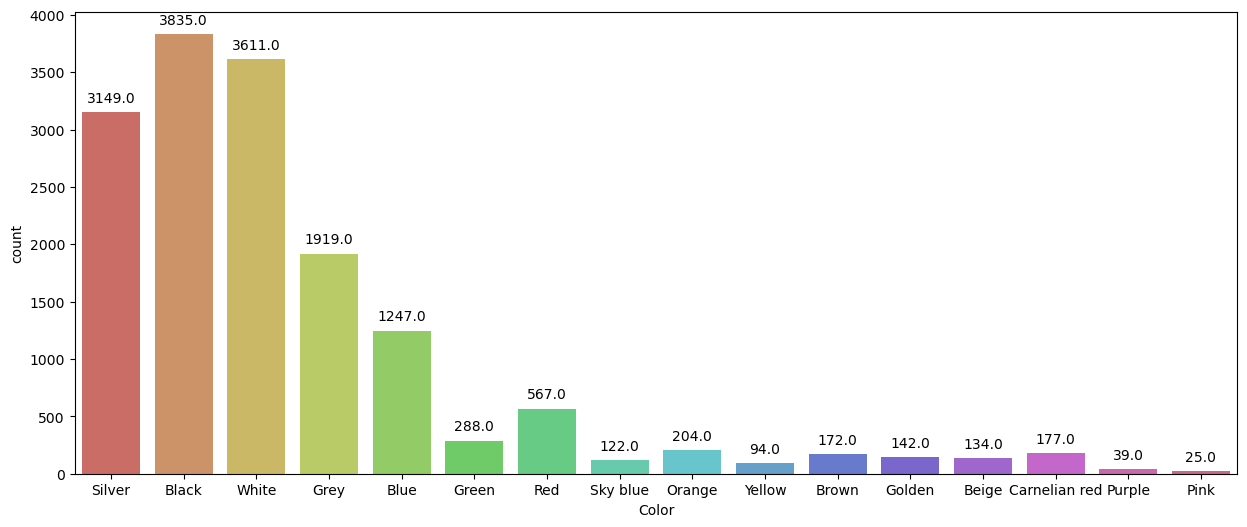

In [162]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

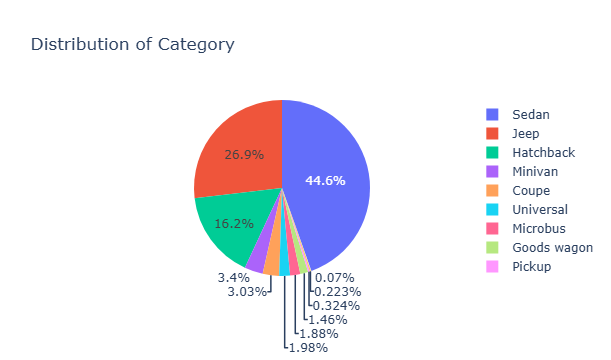

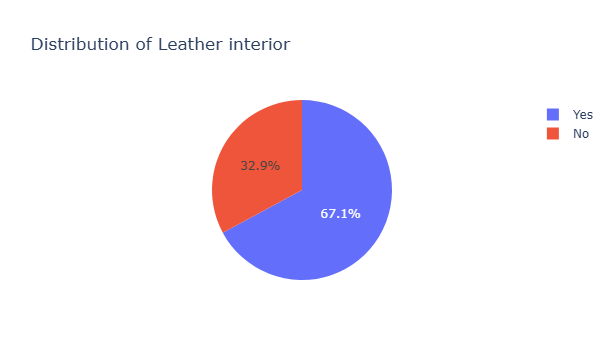

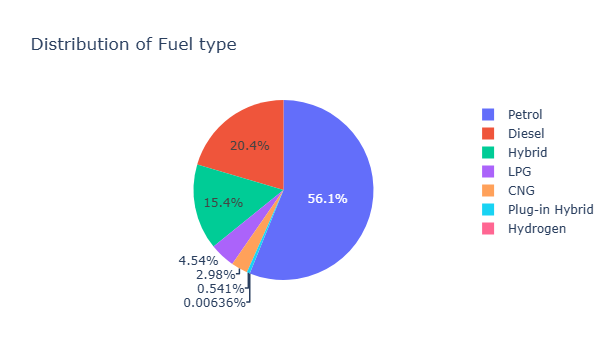

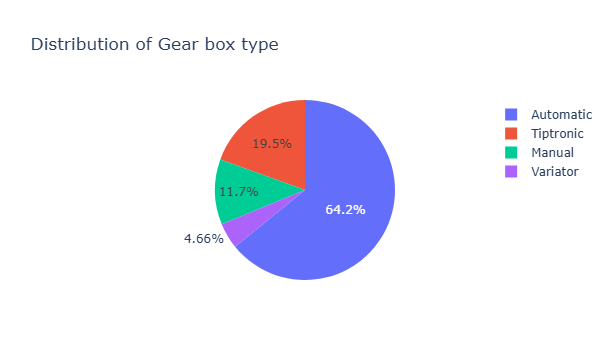

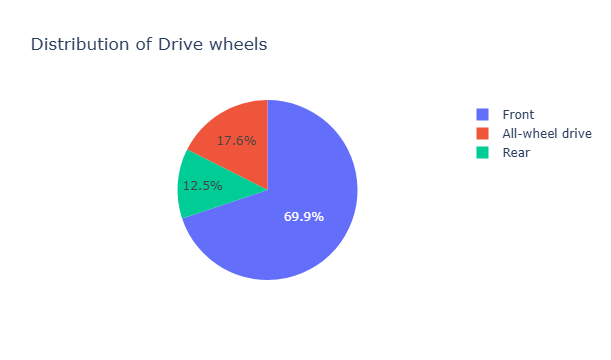

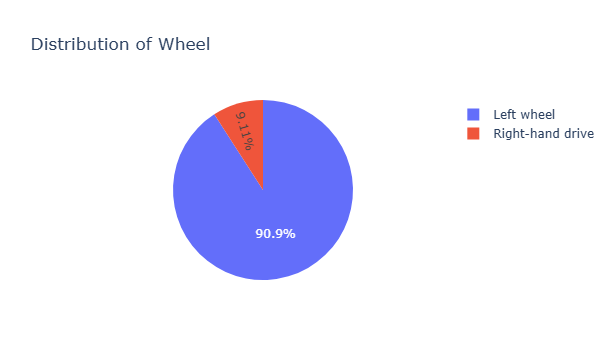

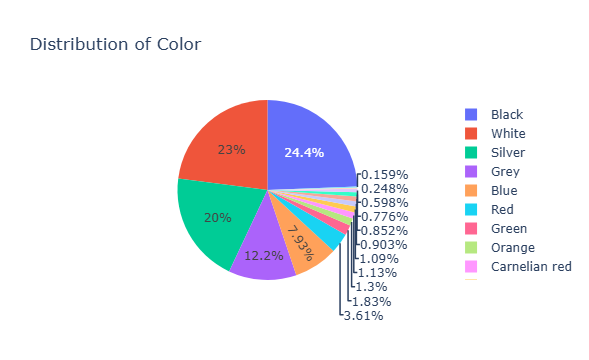

In [164]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

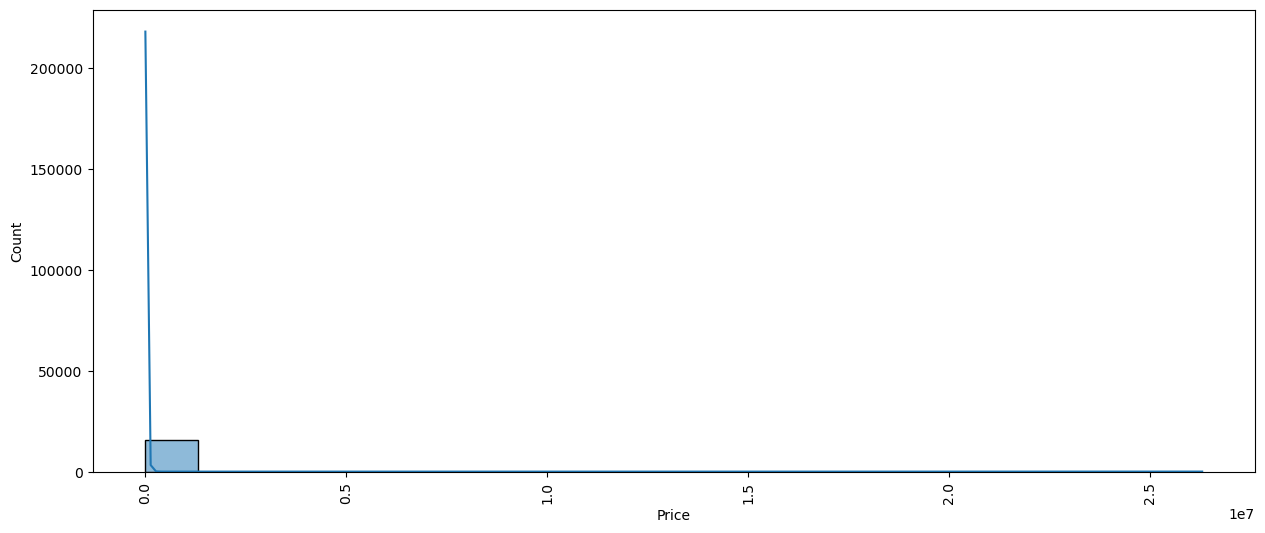

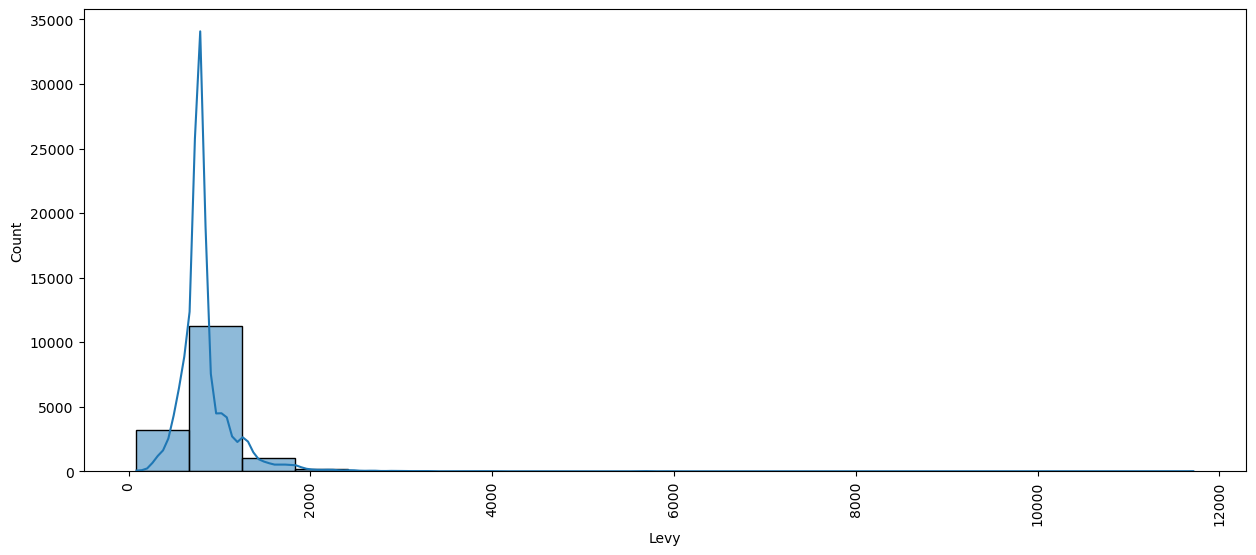

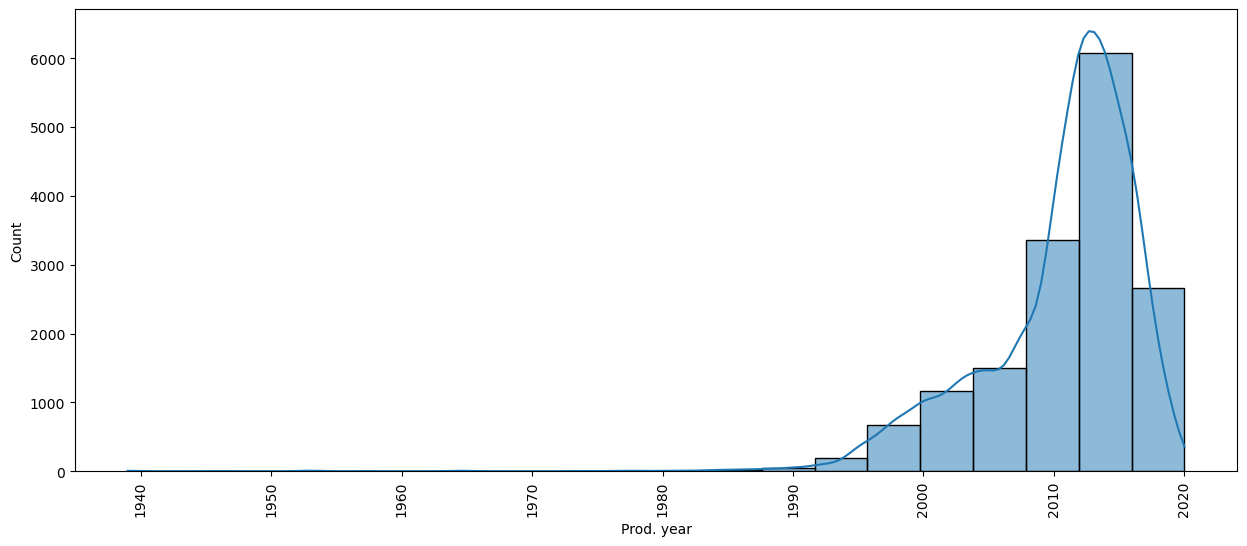

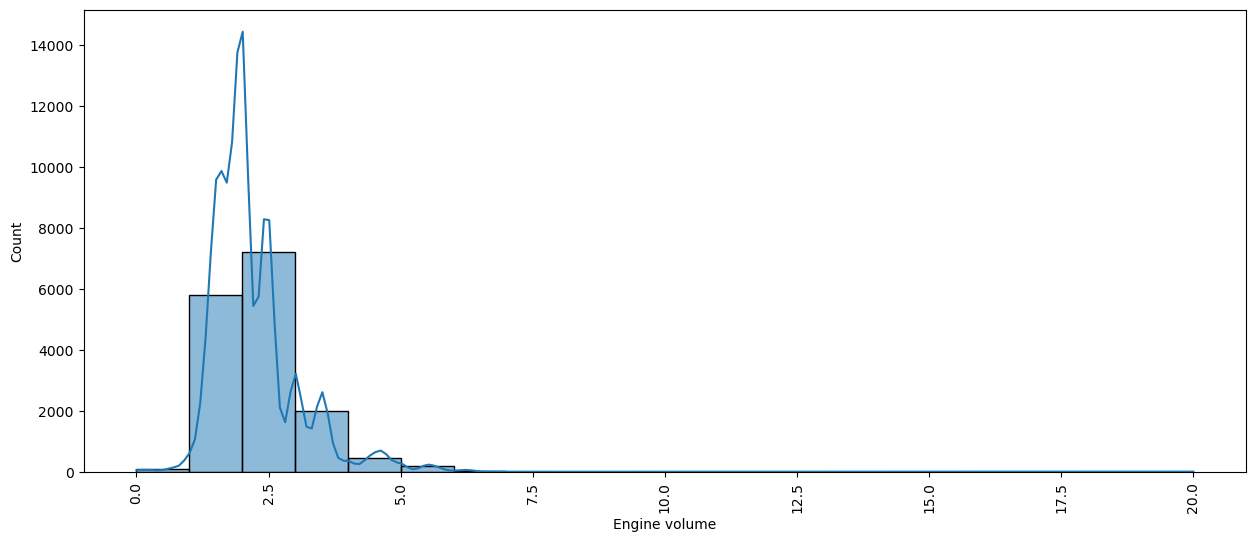

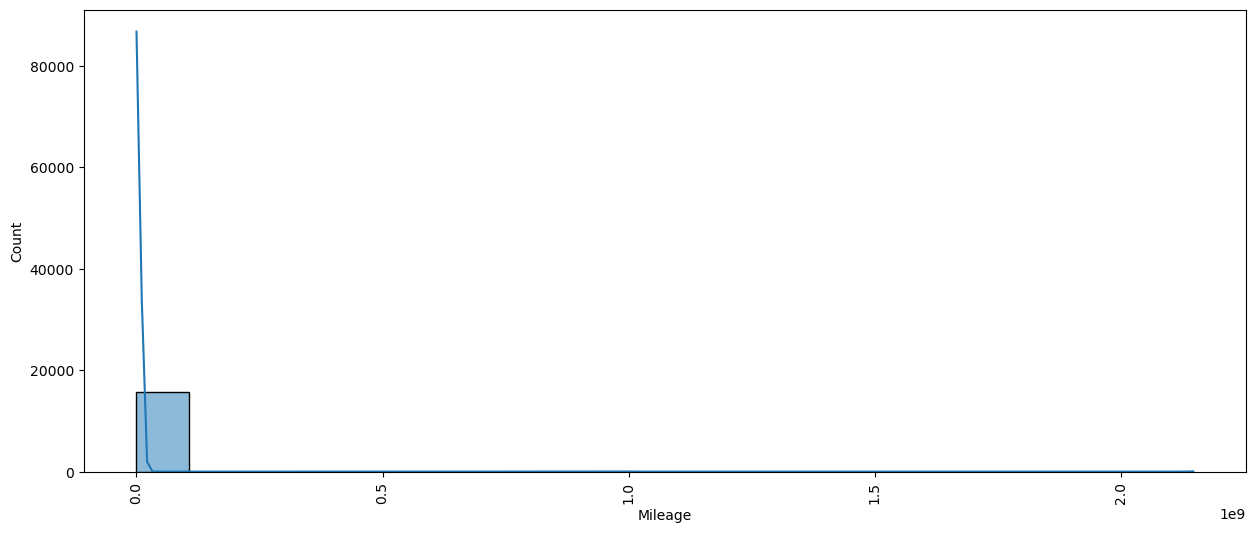

In [166]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

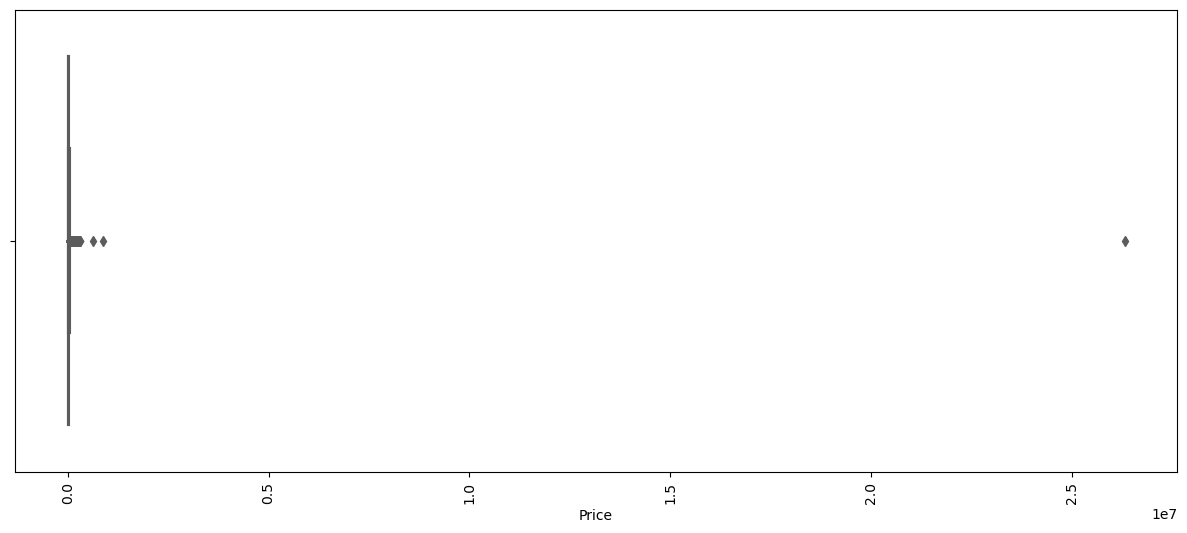

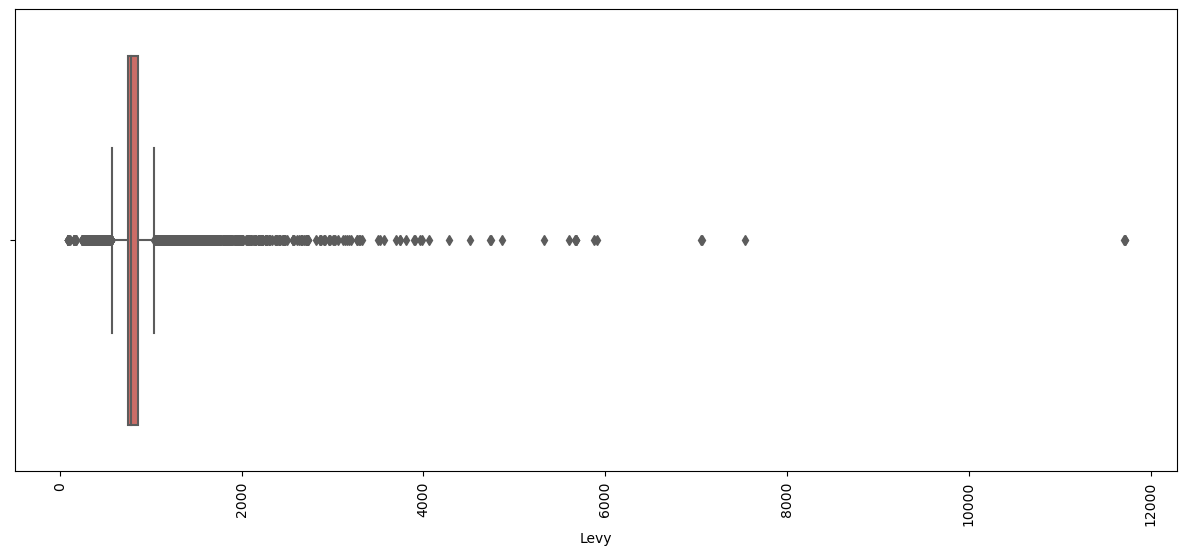

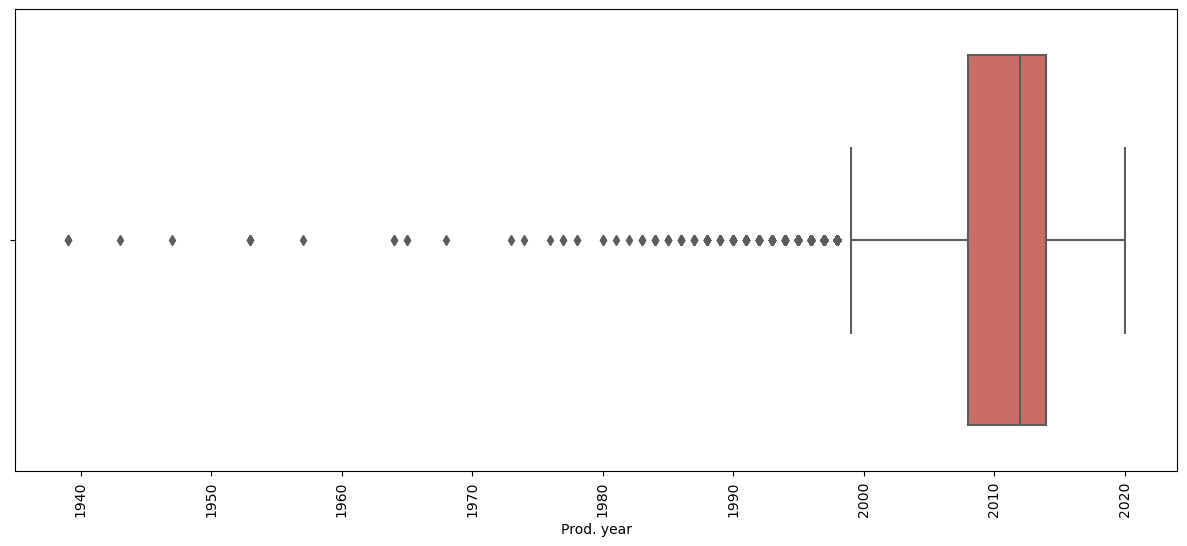

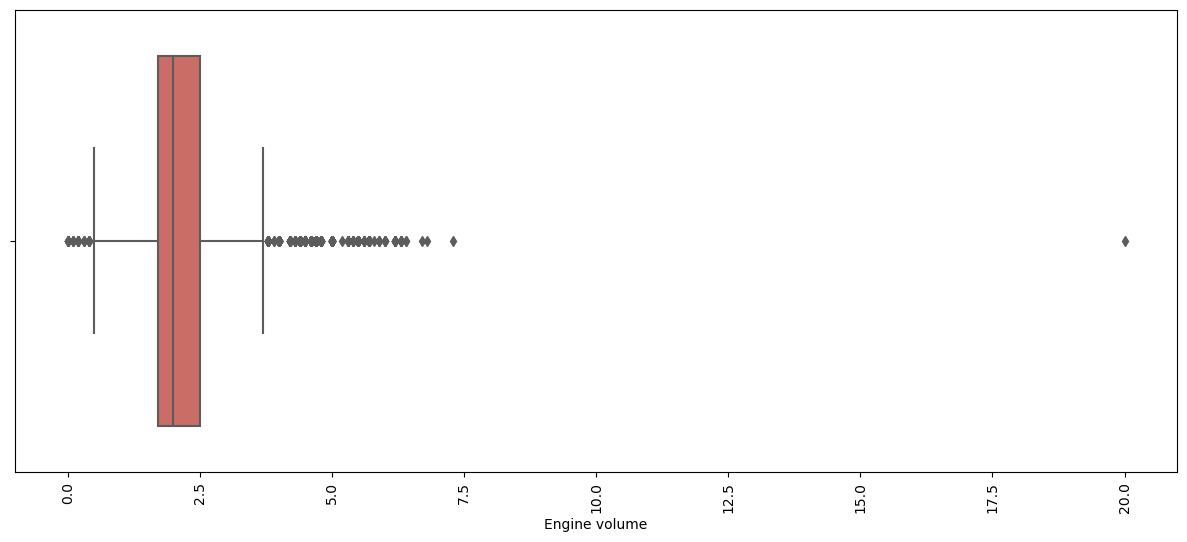

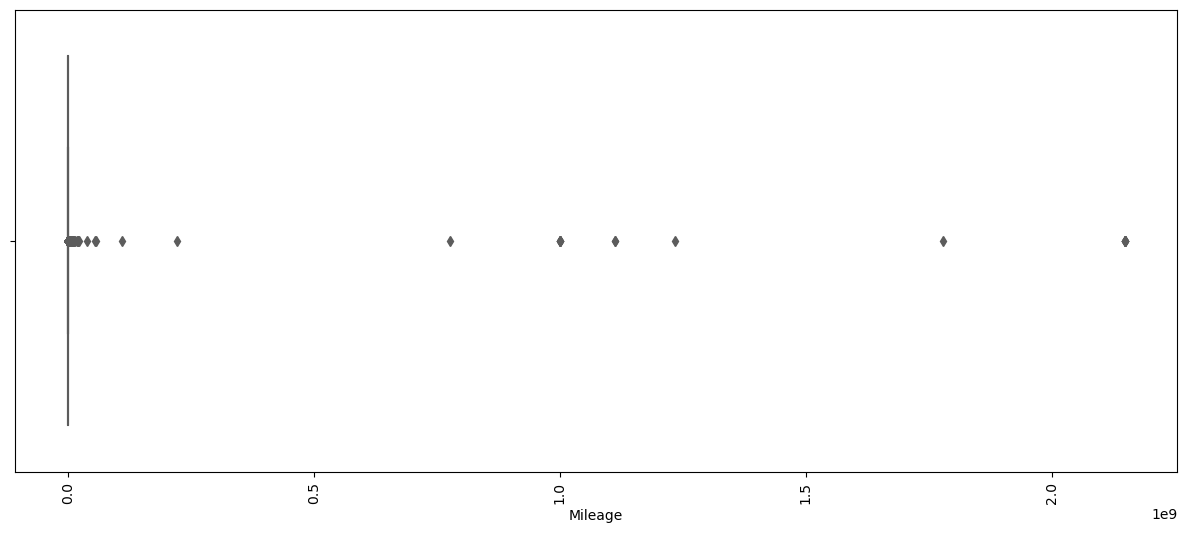

In [168]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

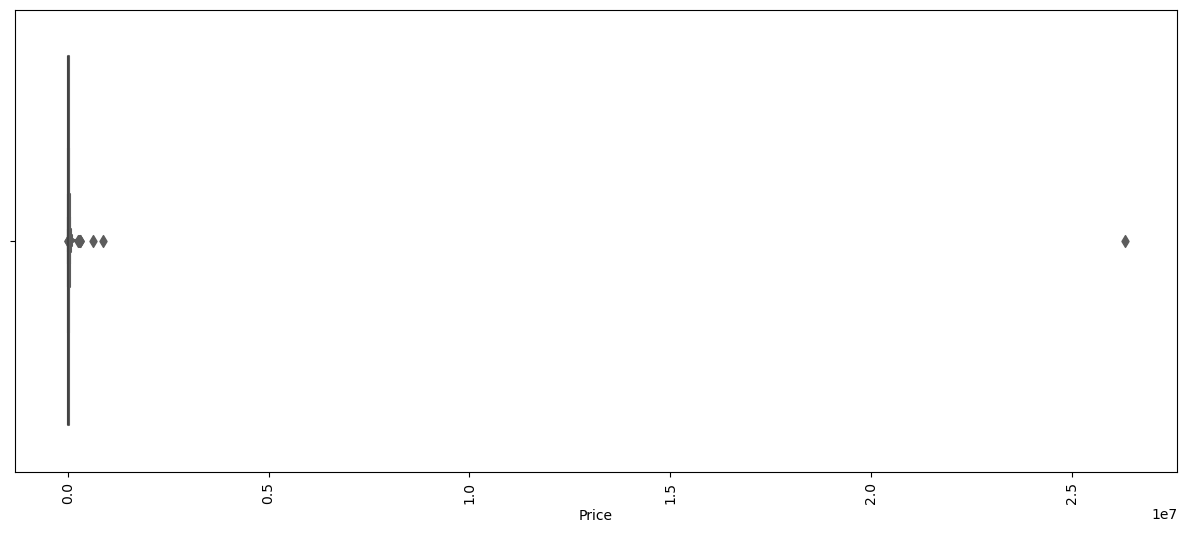

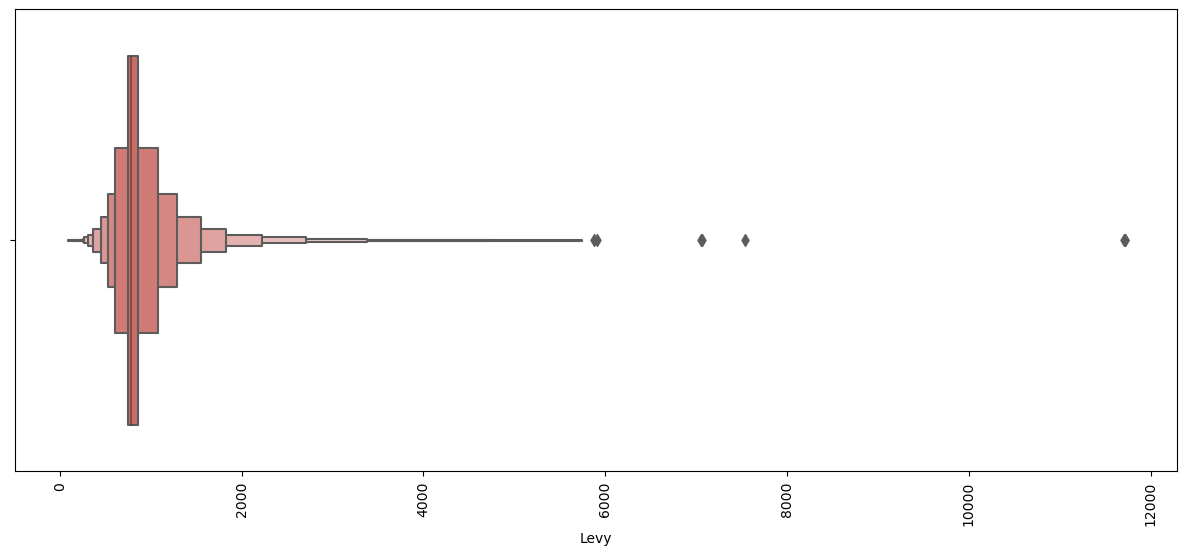

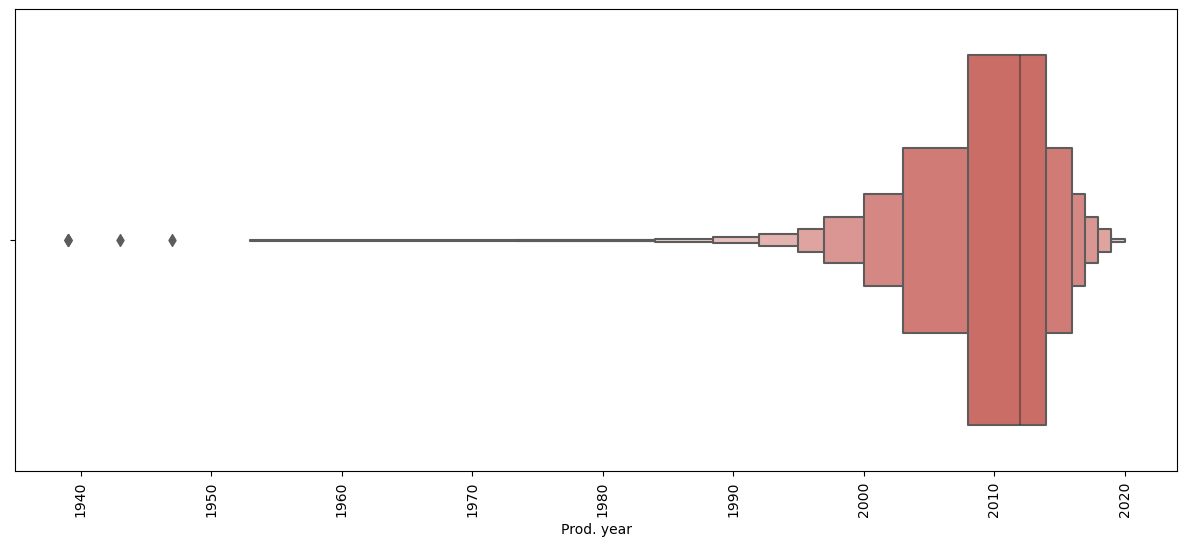

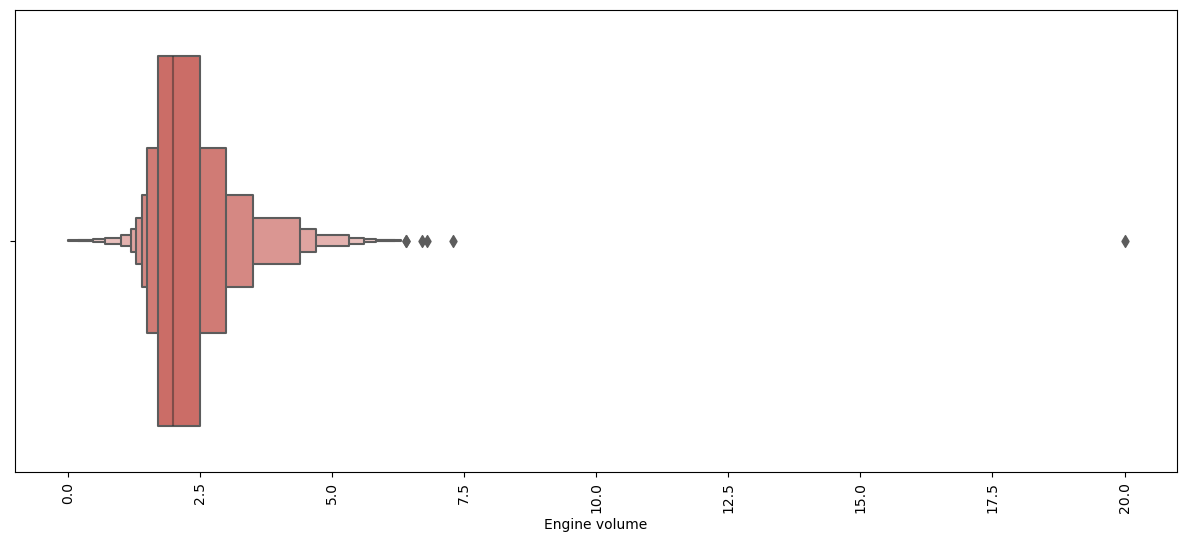

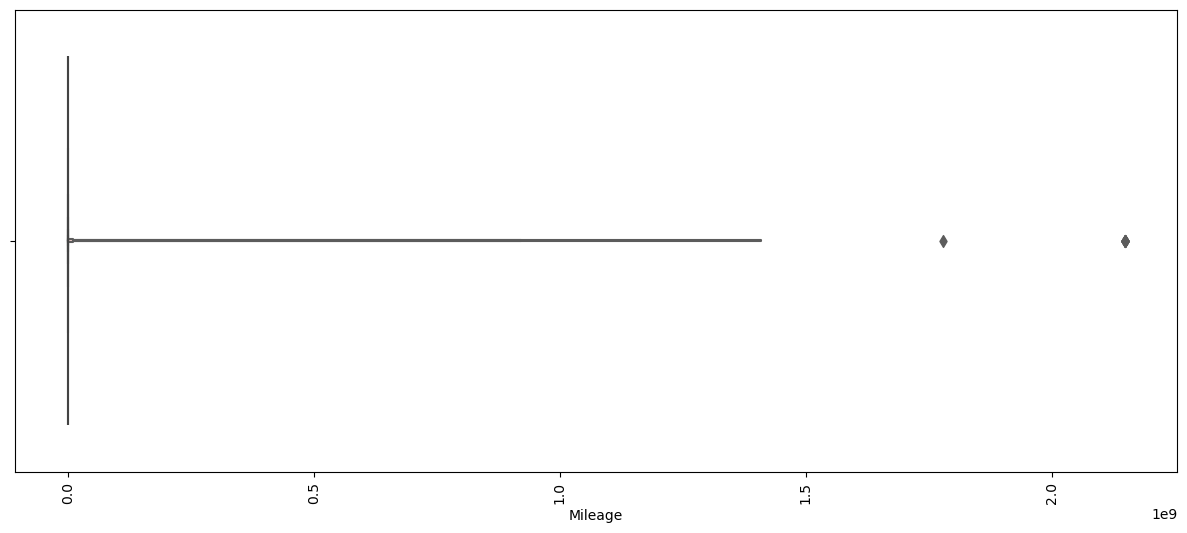

In [170]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

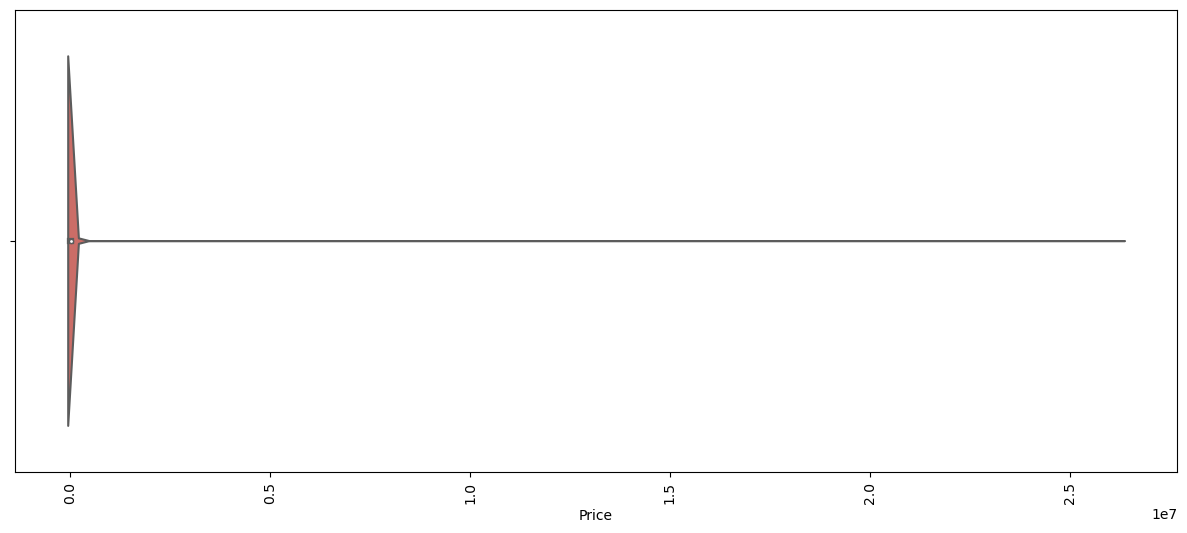

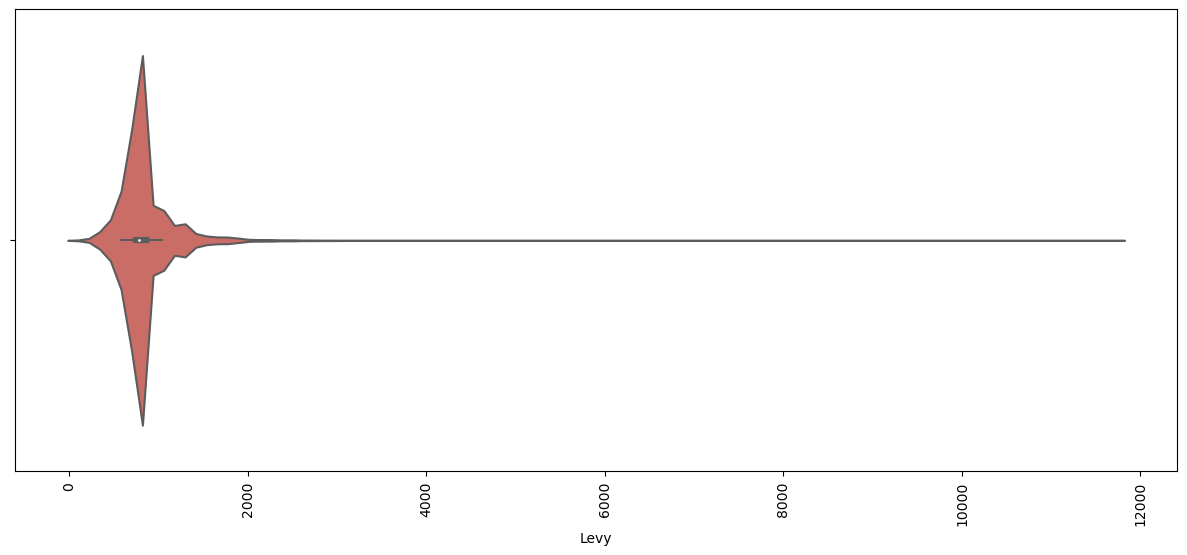

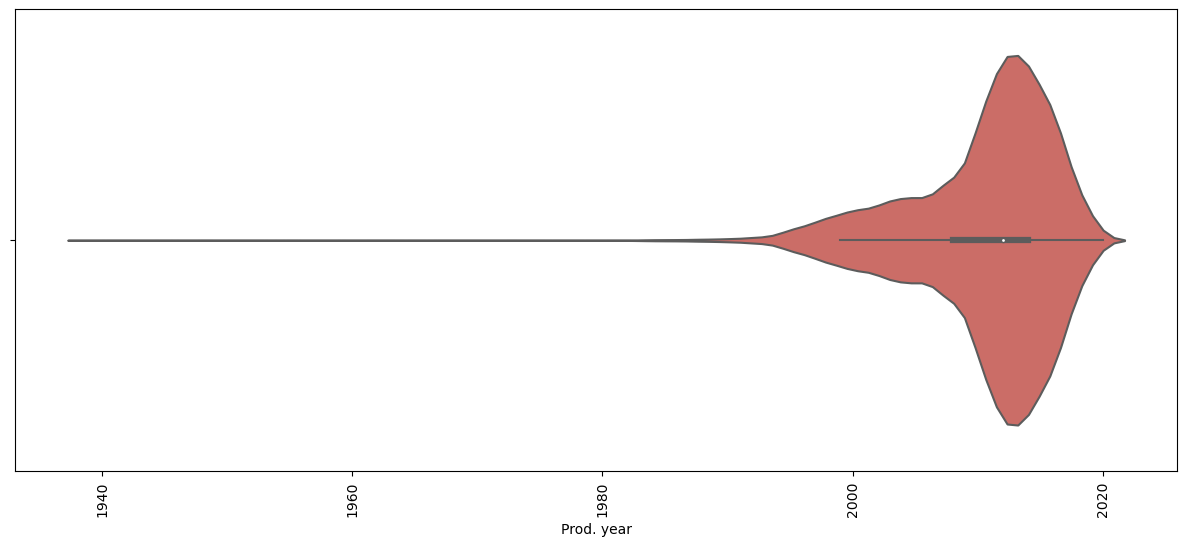

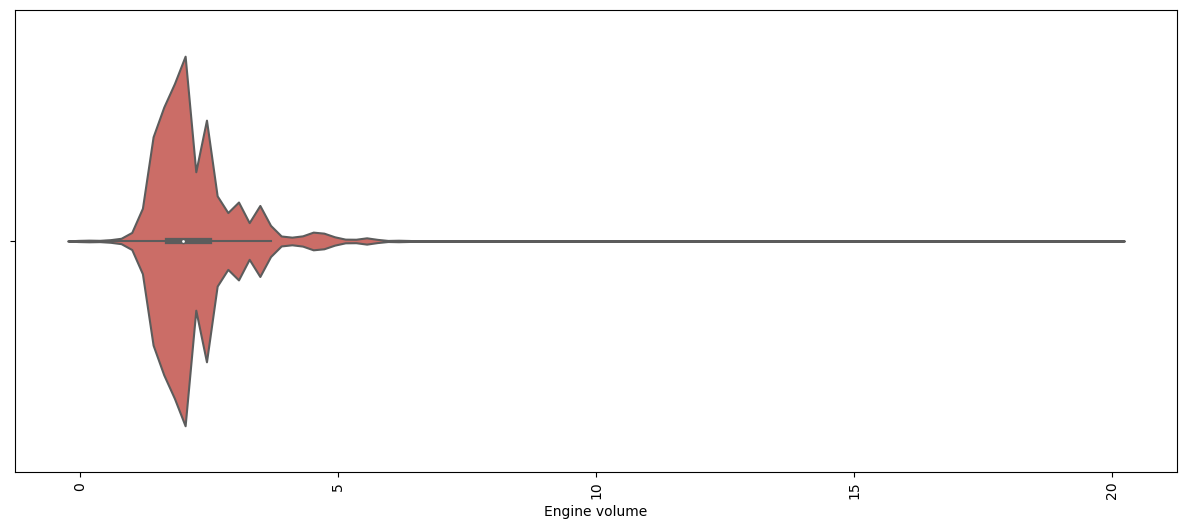

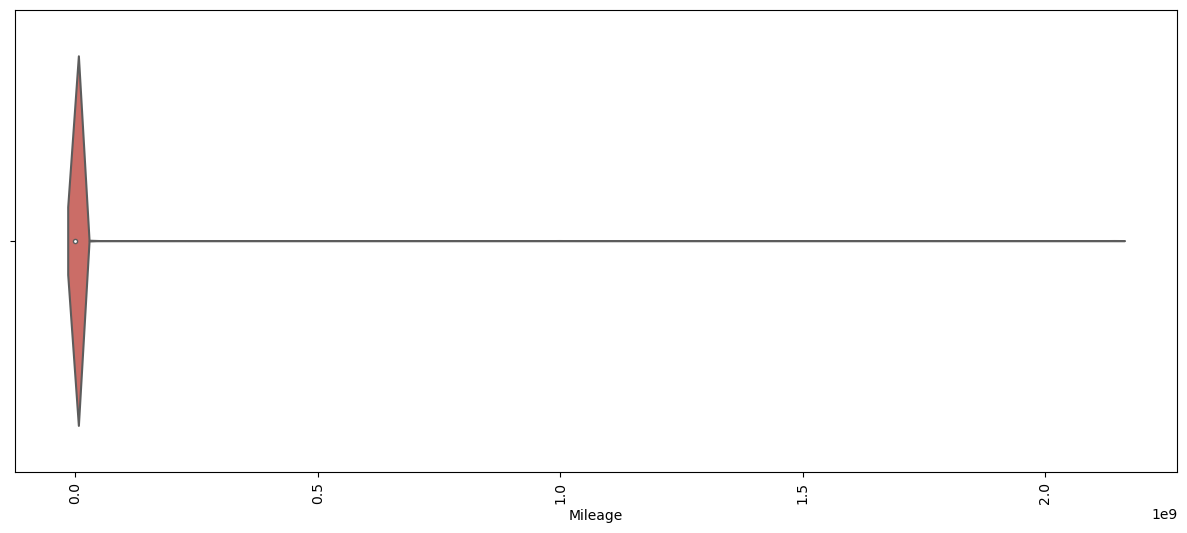

In [172]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

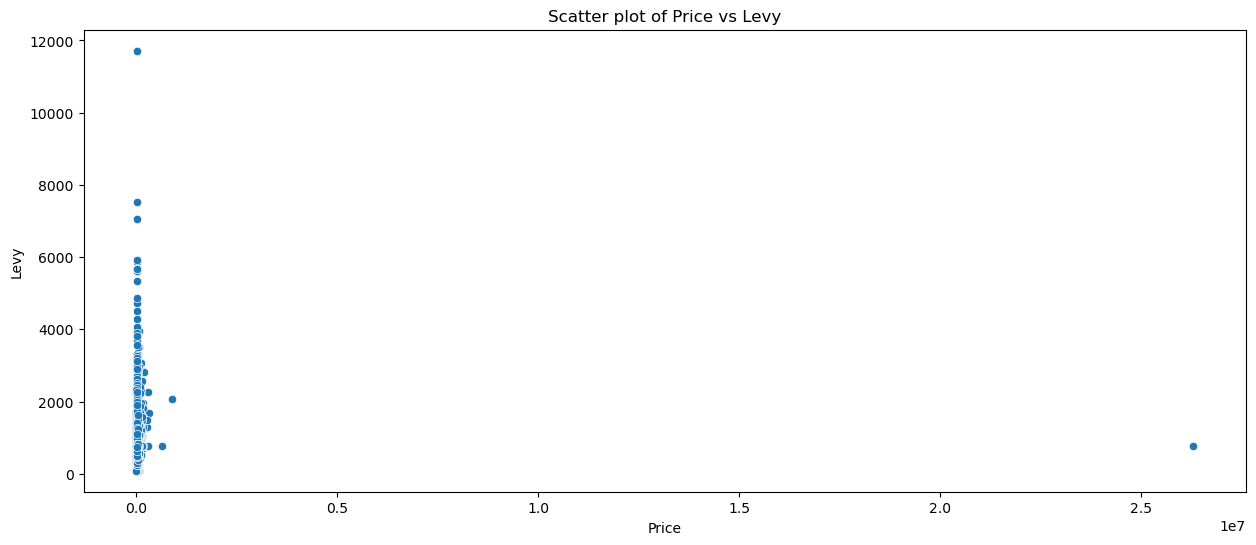

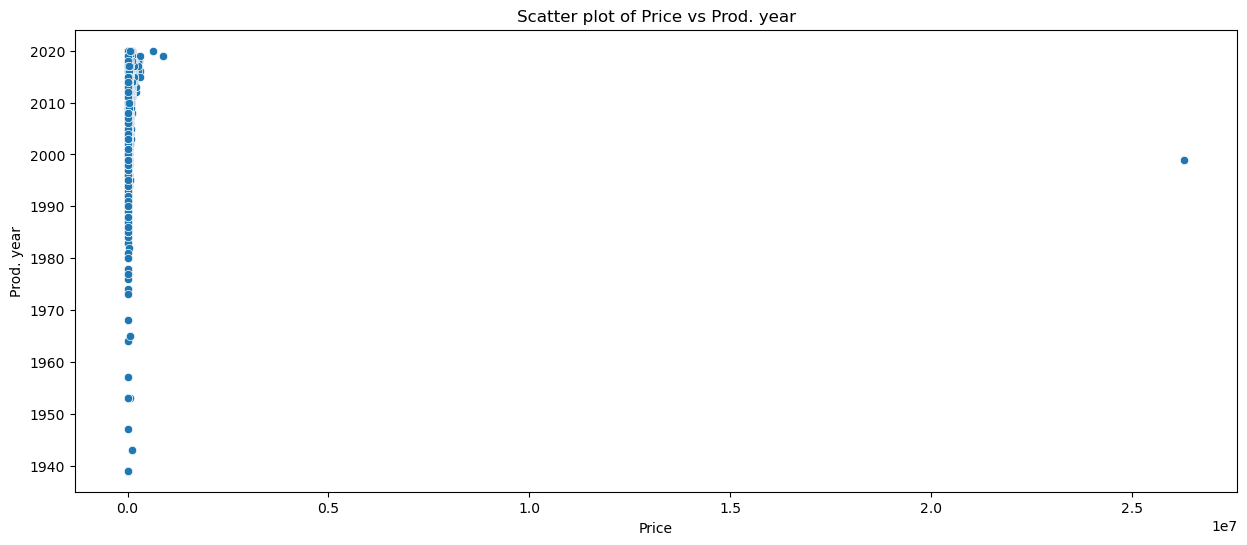

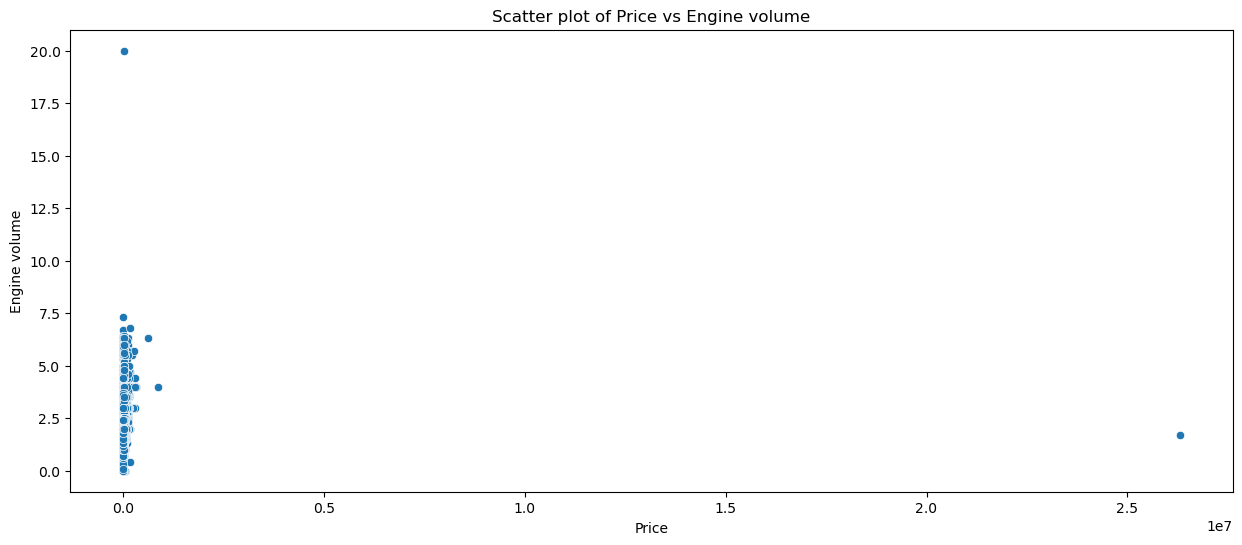

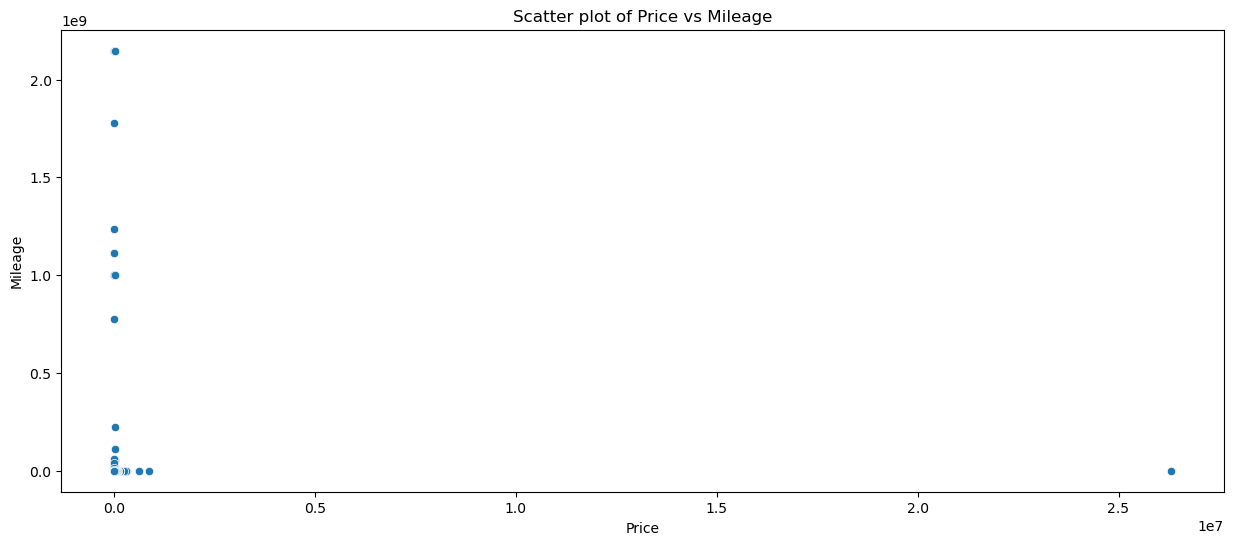

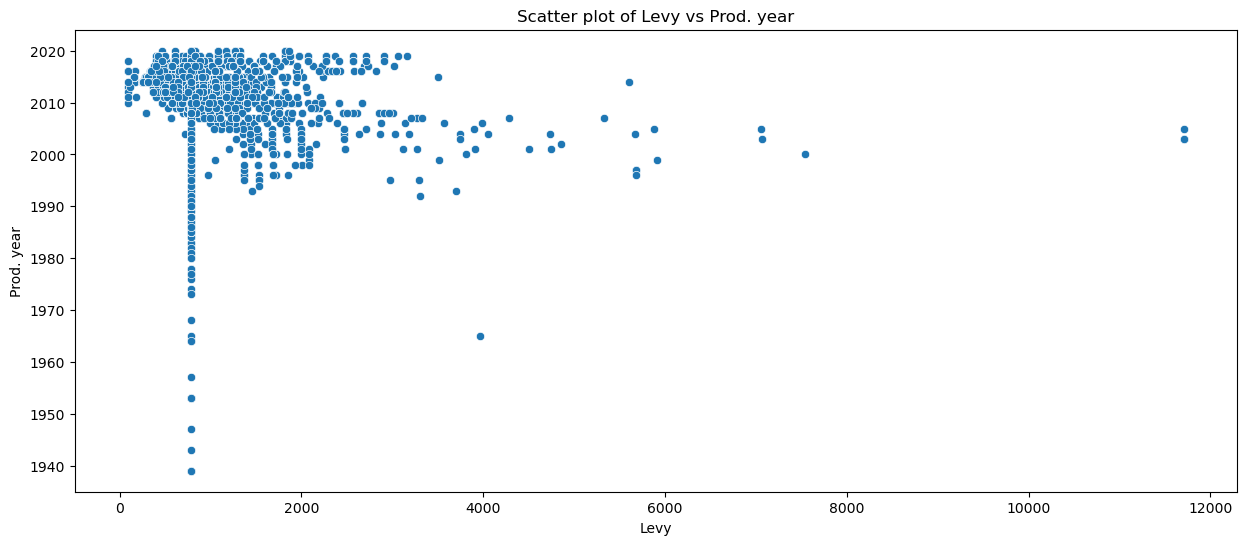

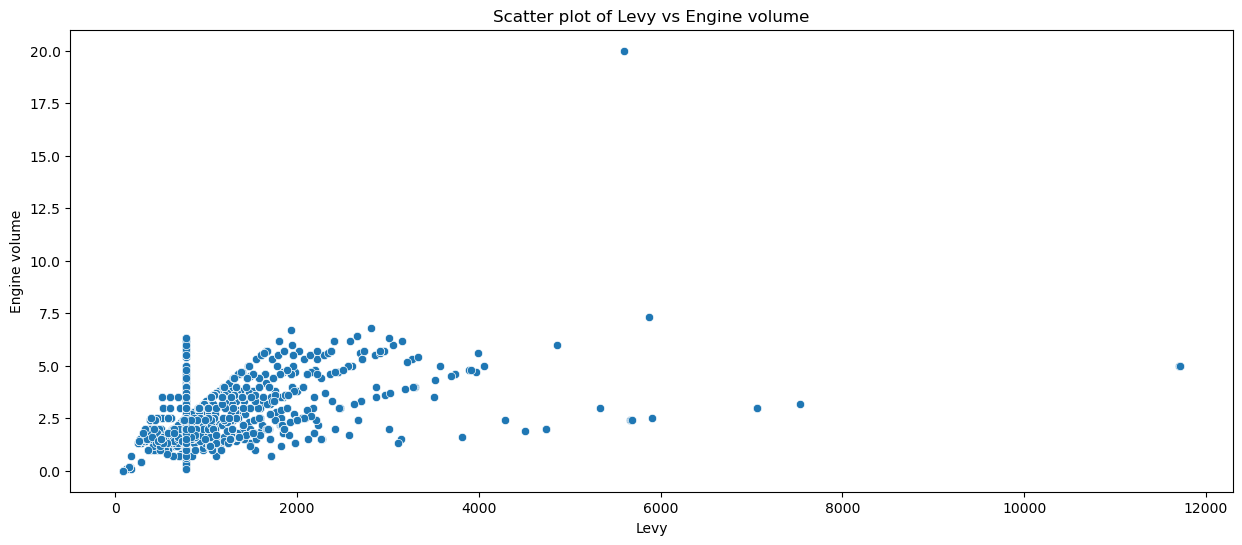

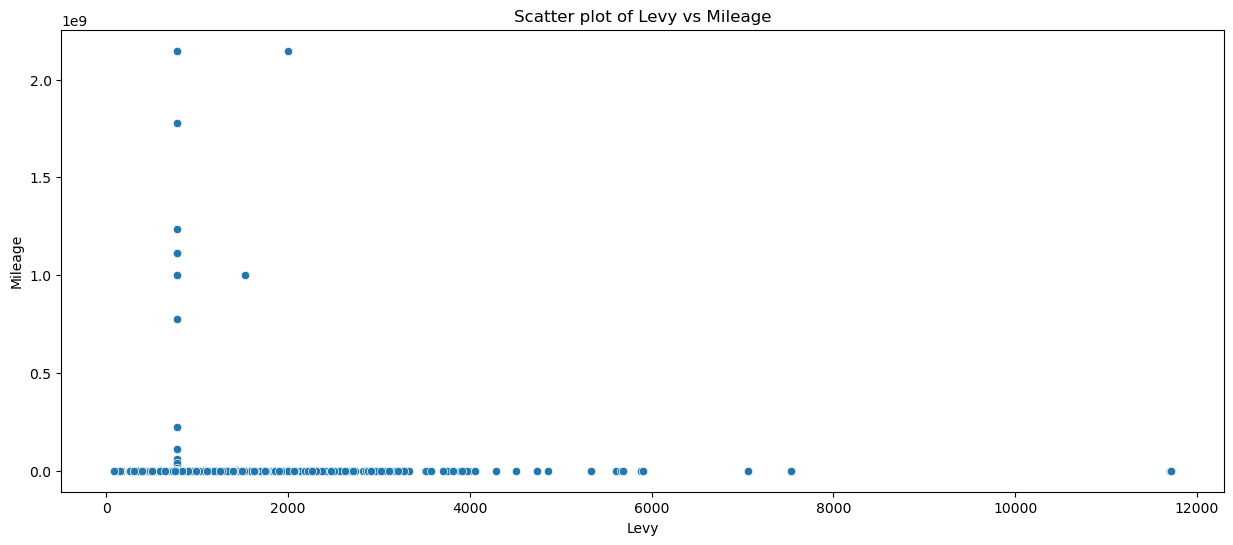

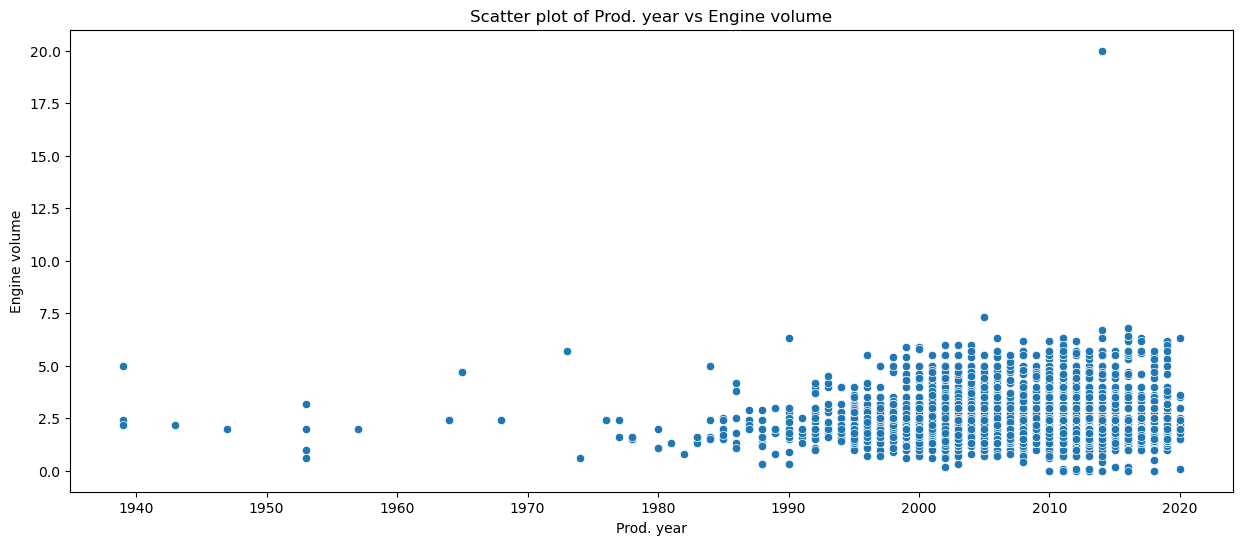

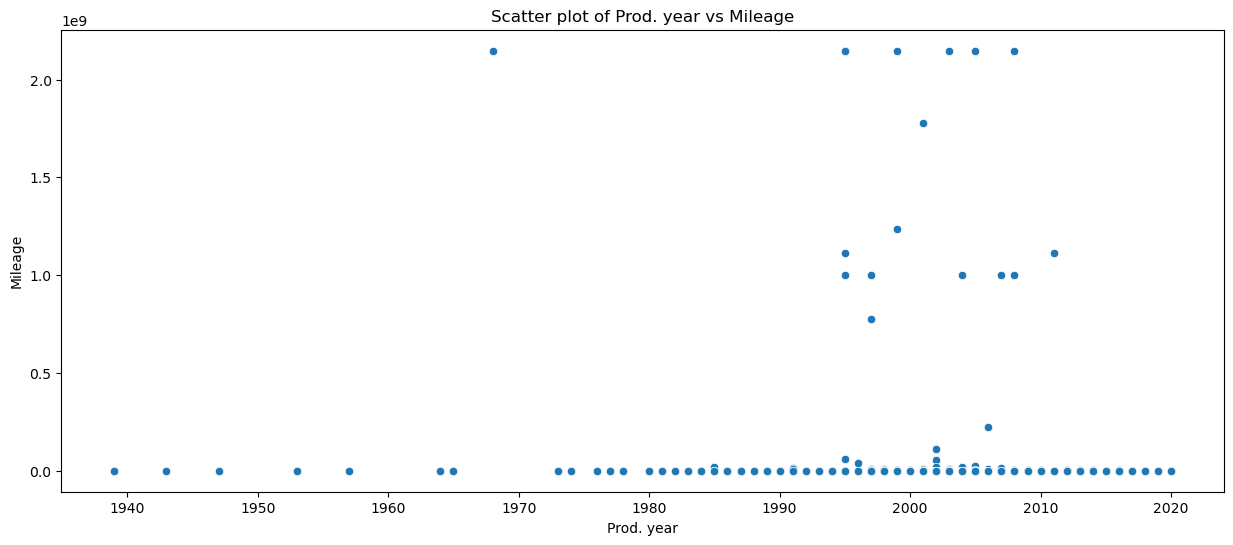

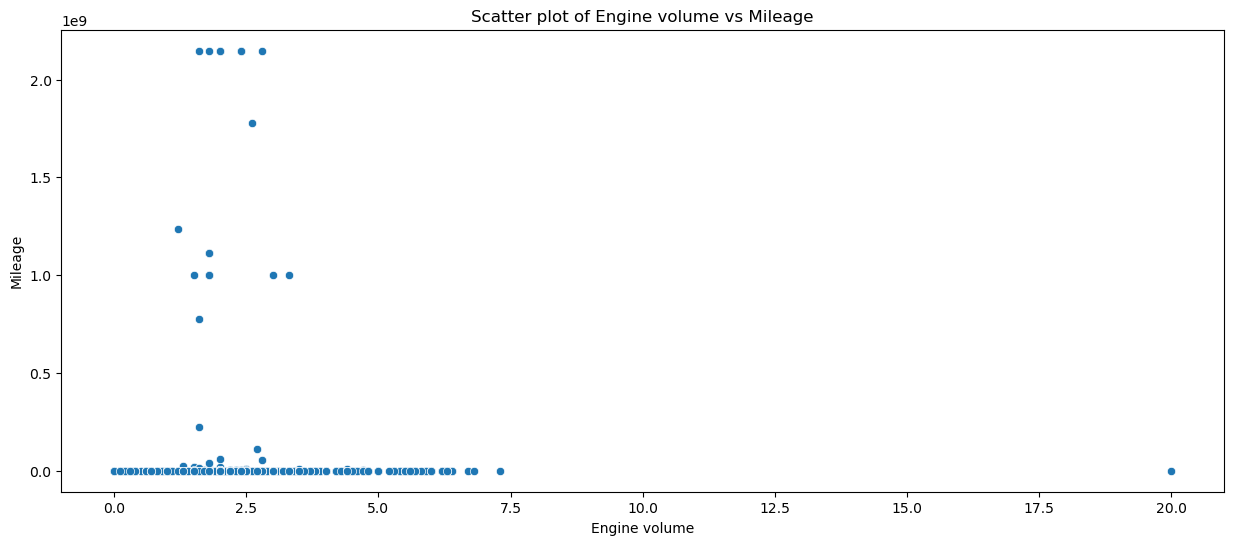

In [174]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

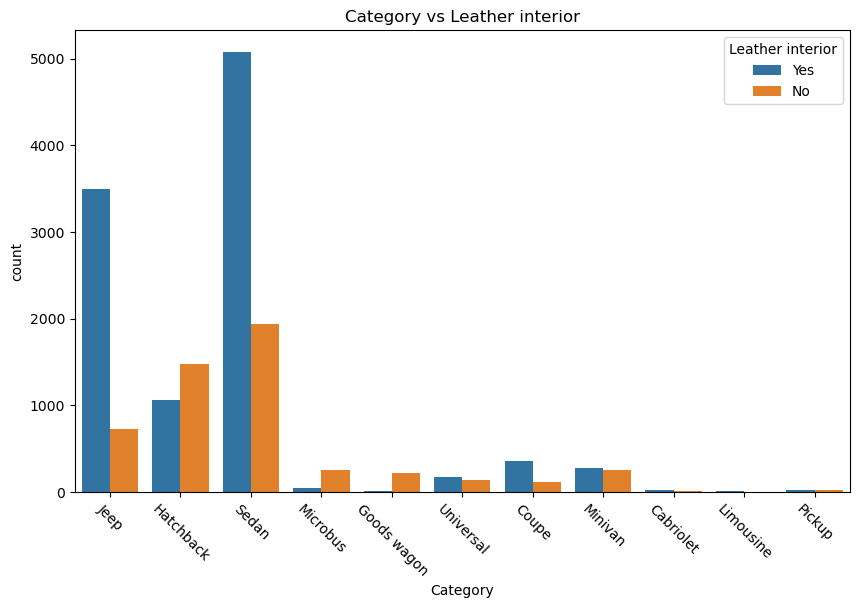

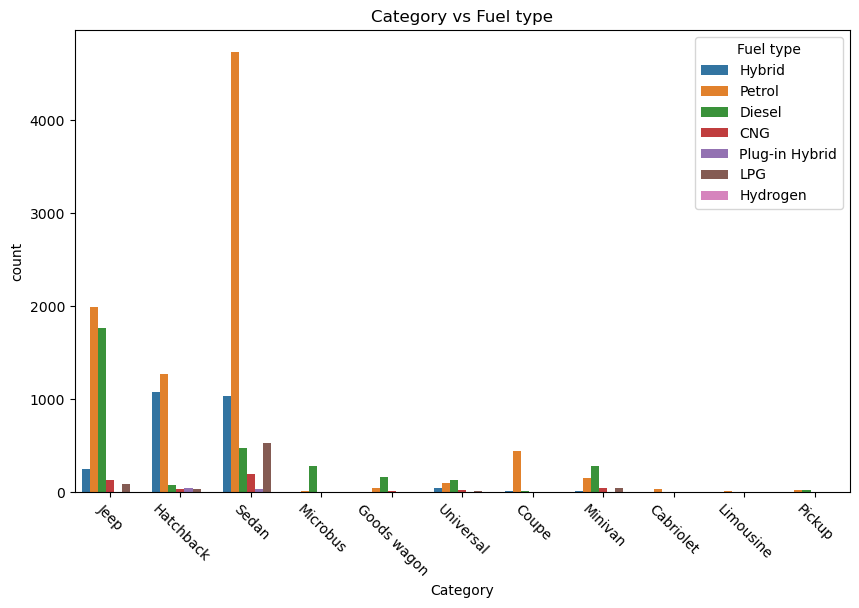

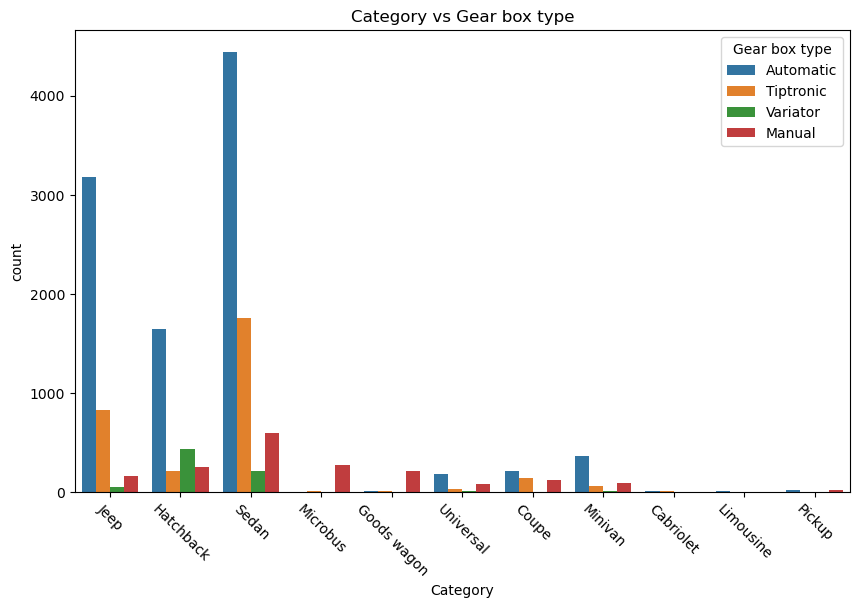

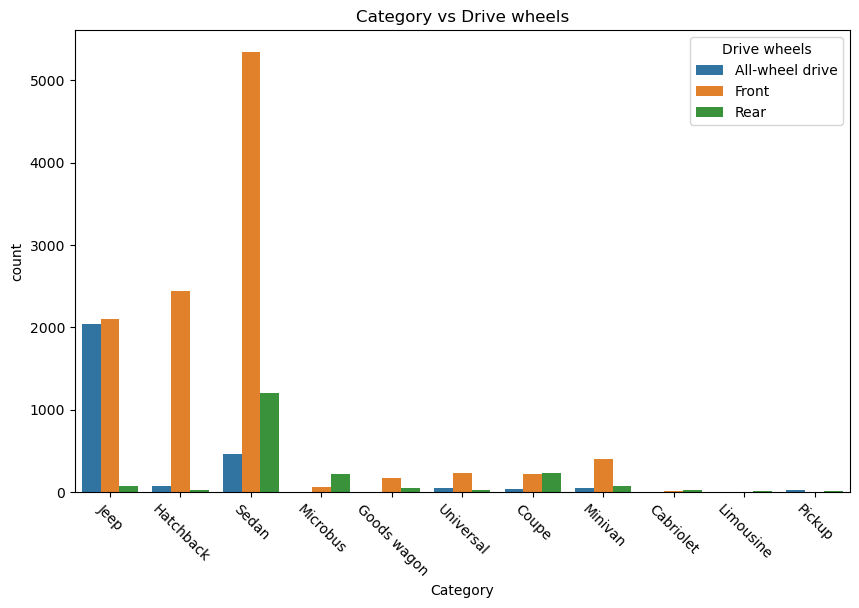

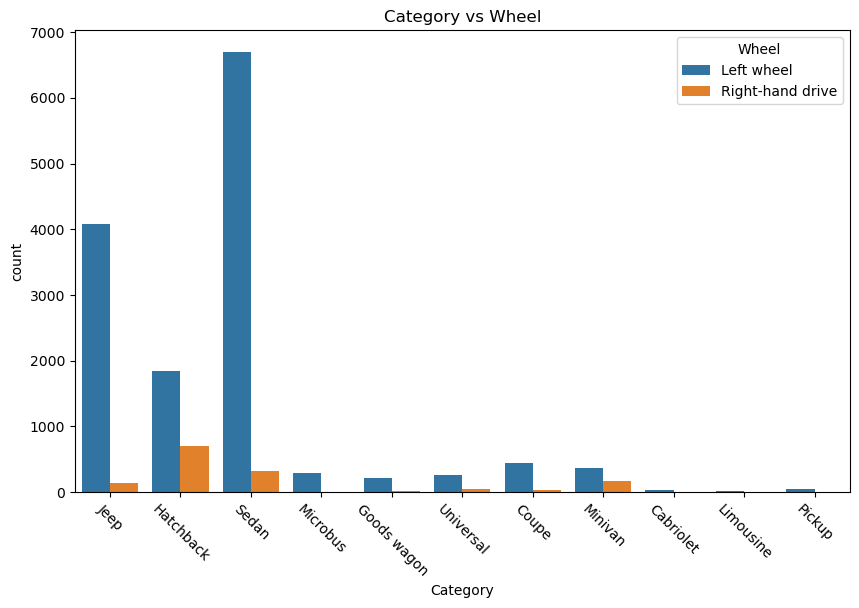

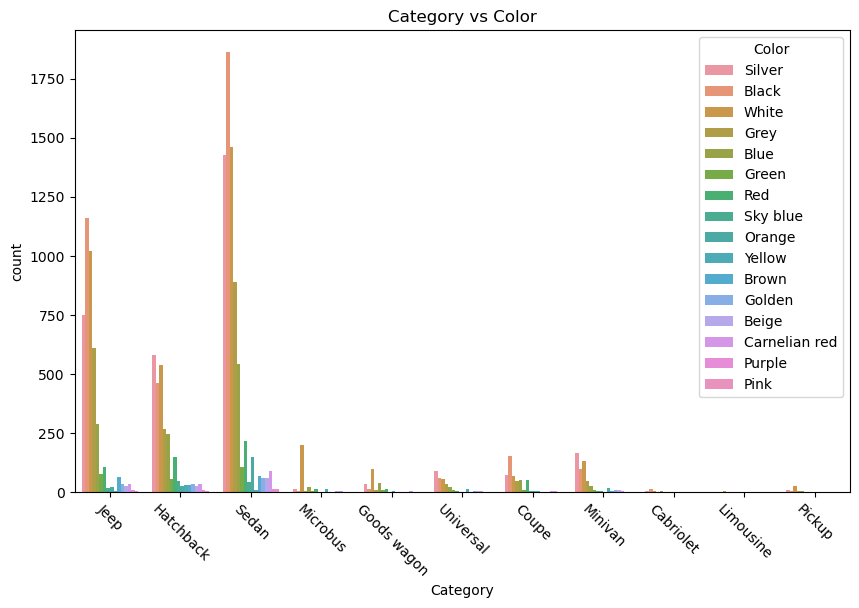

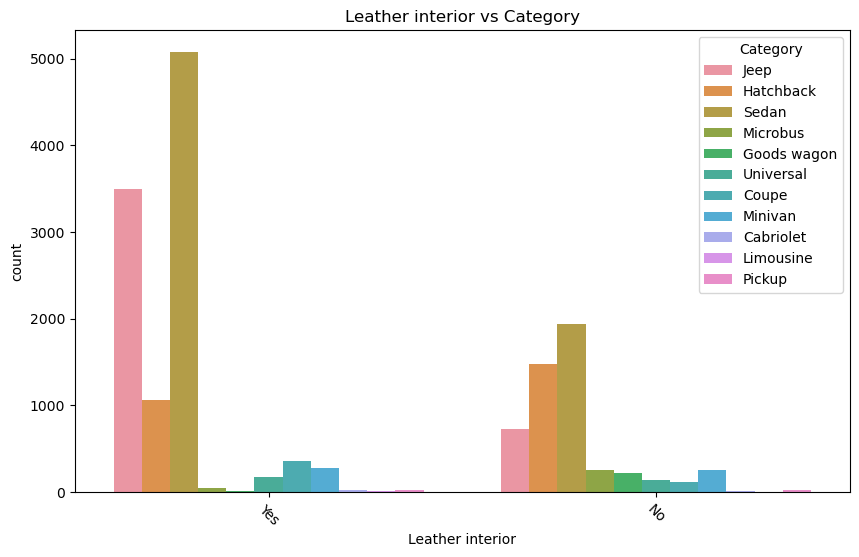

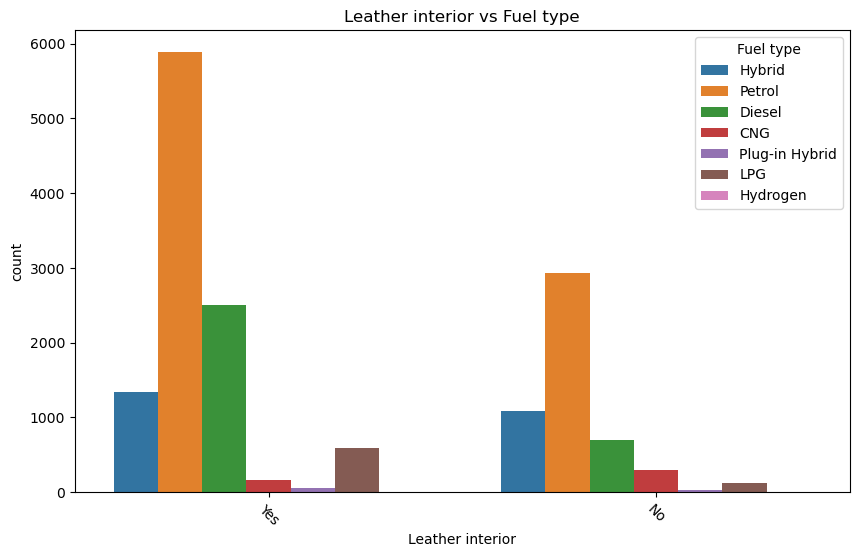

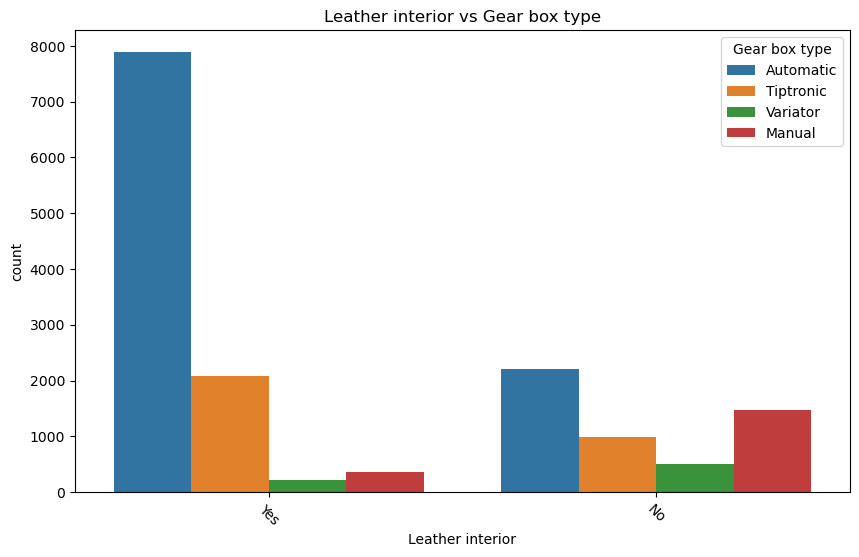

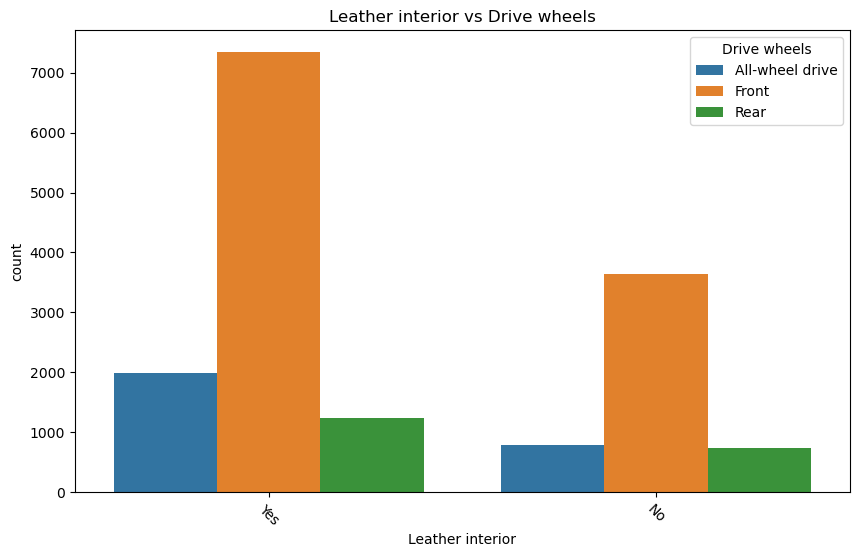

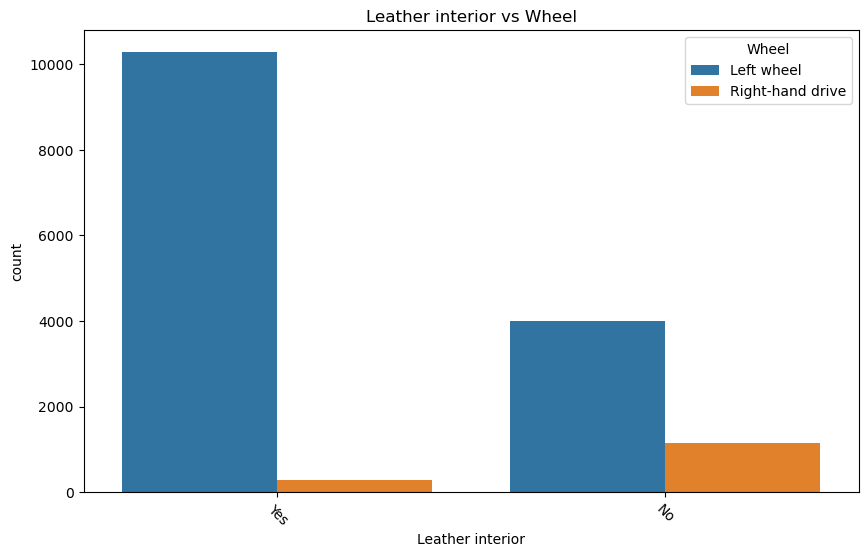

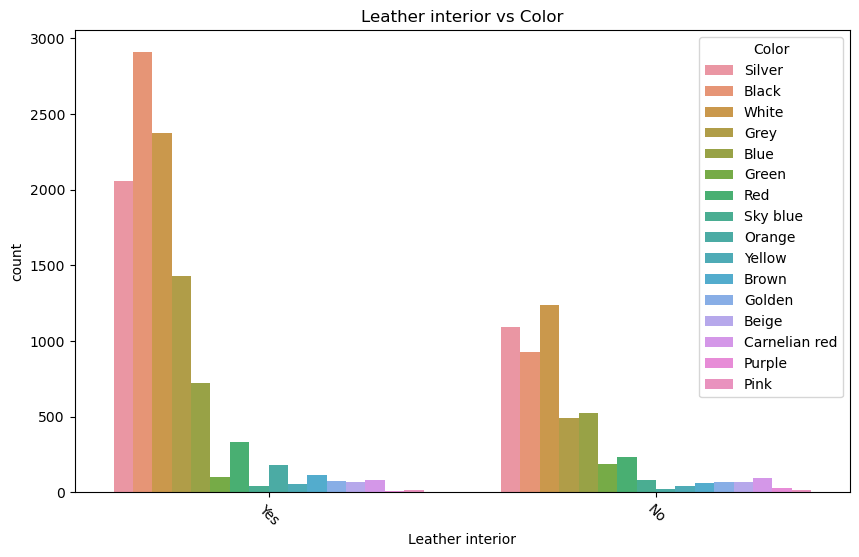

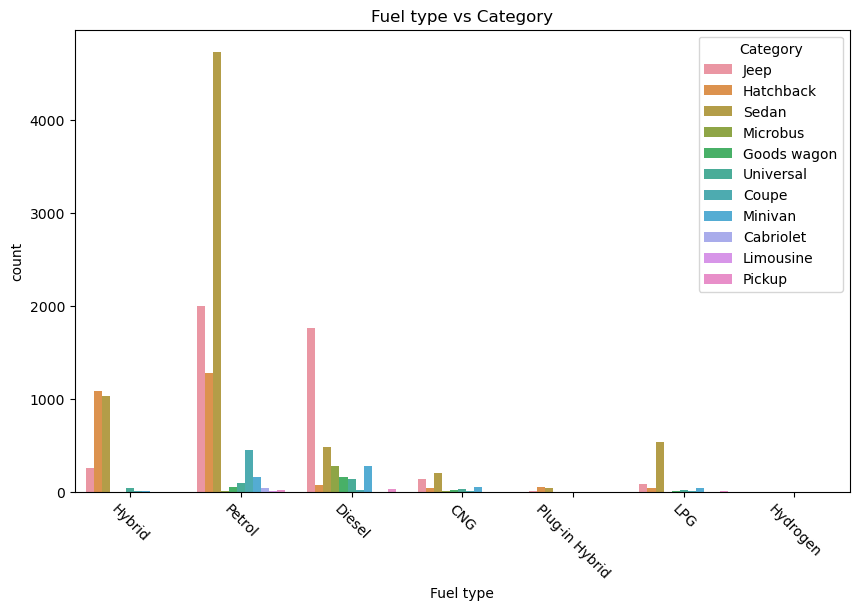

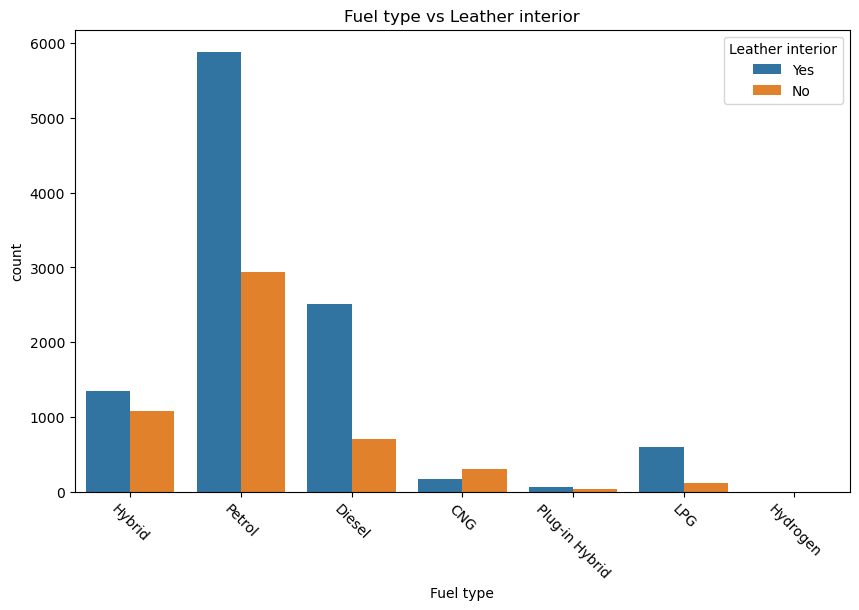

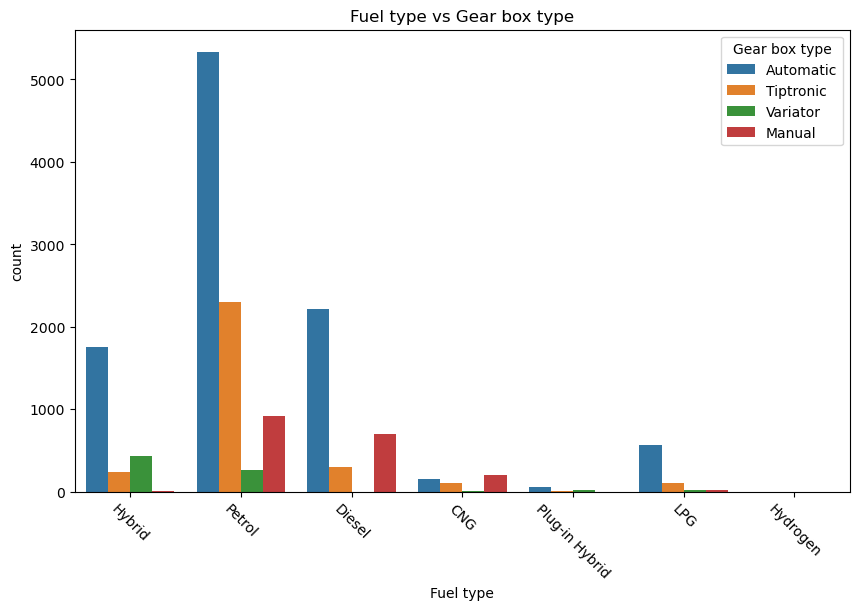

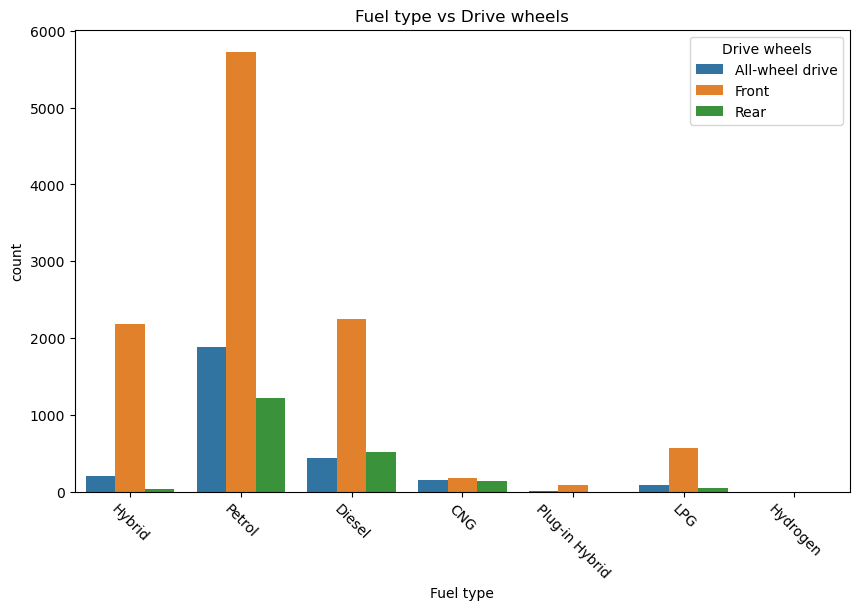

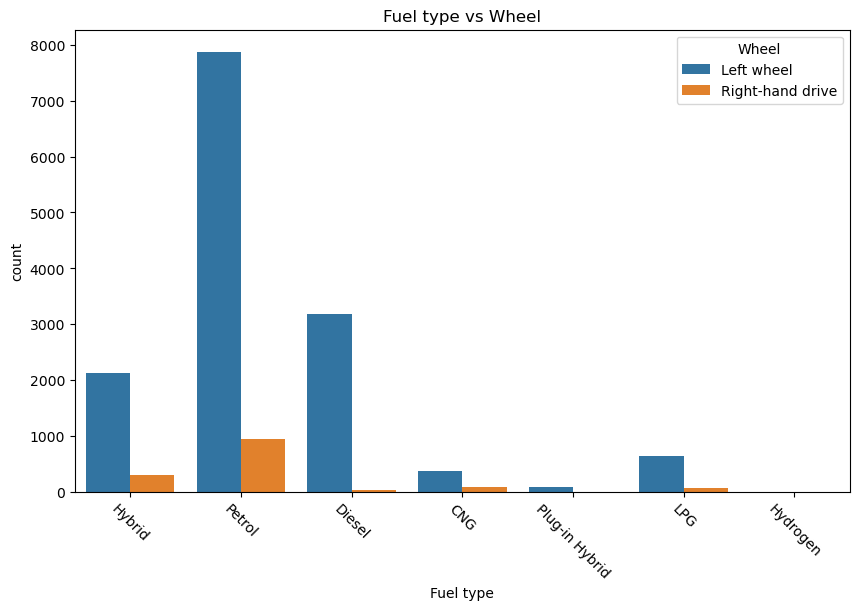

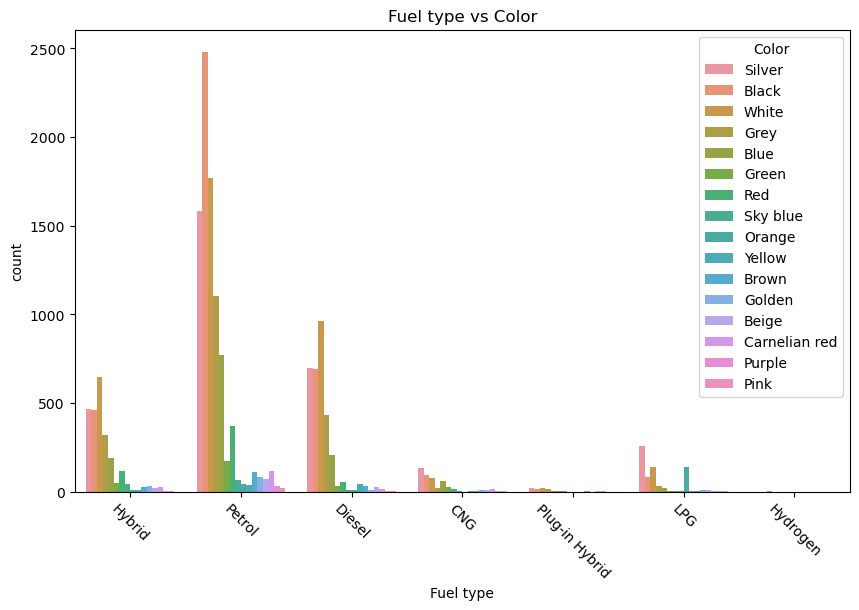

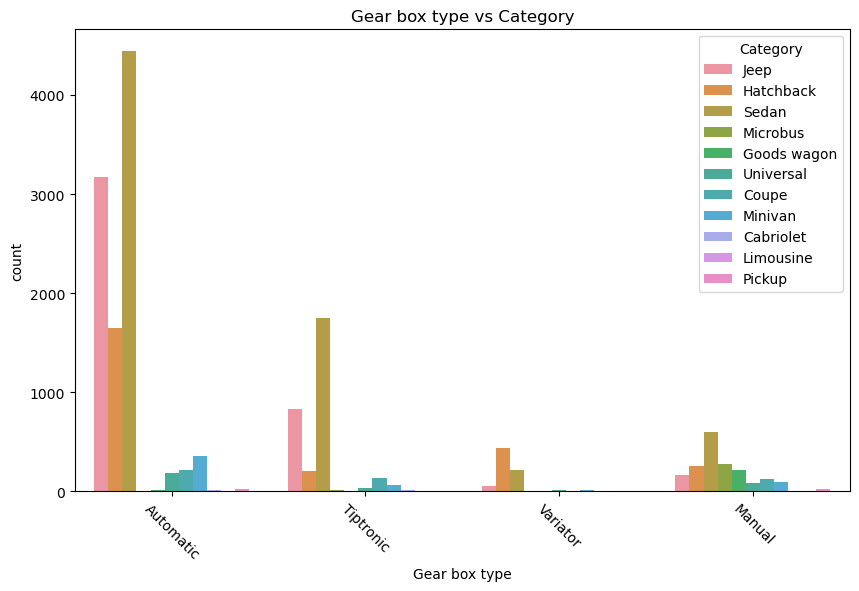

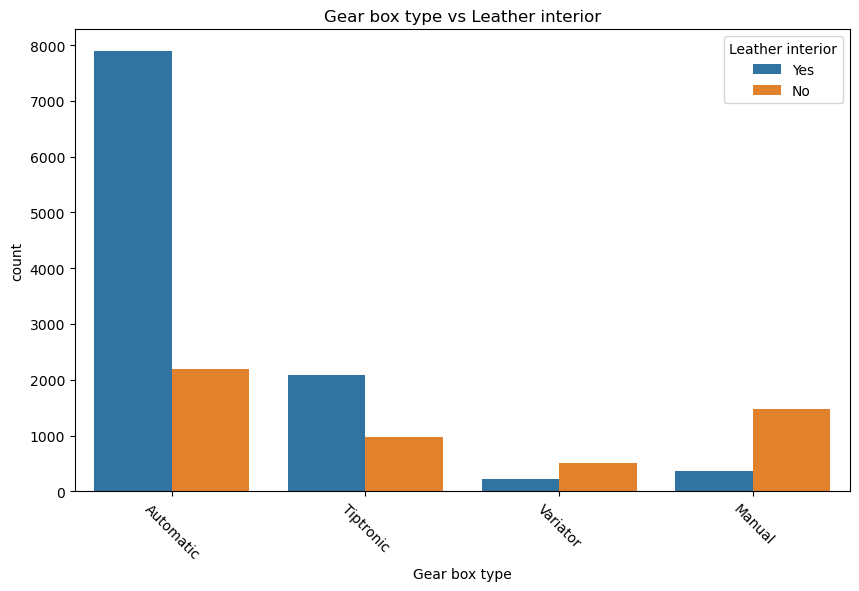

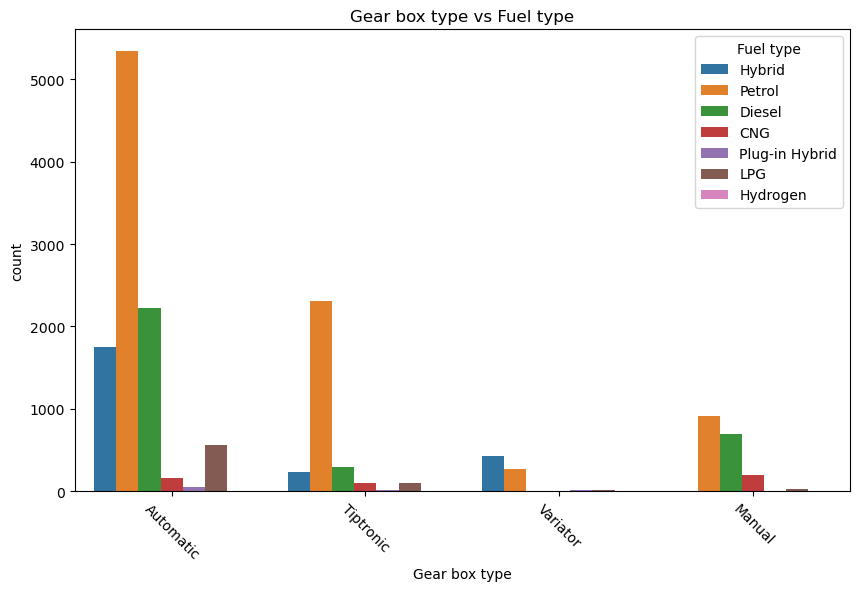

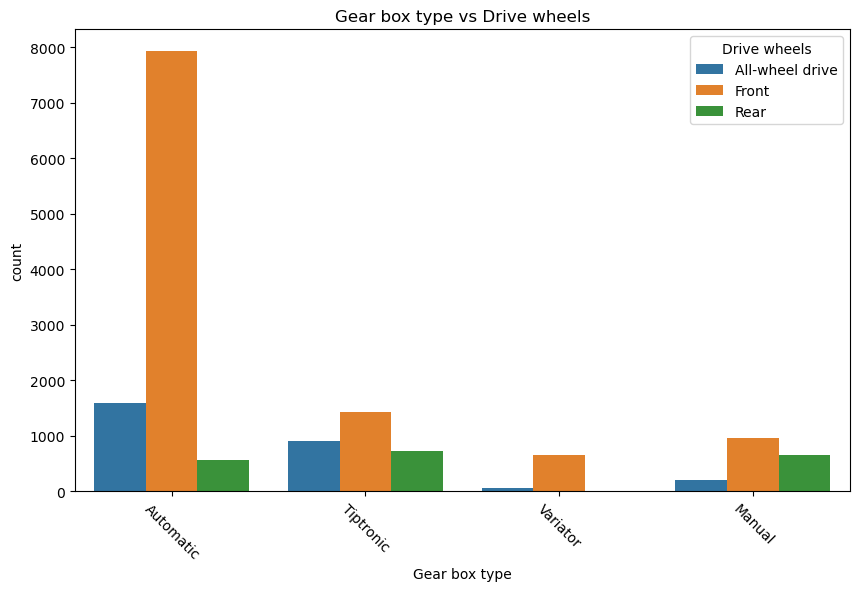

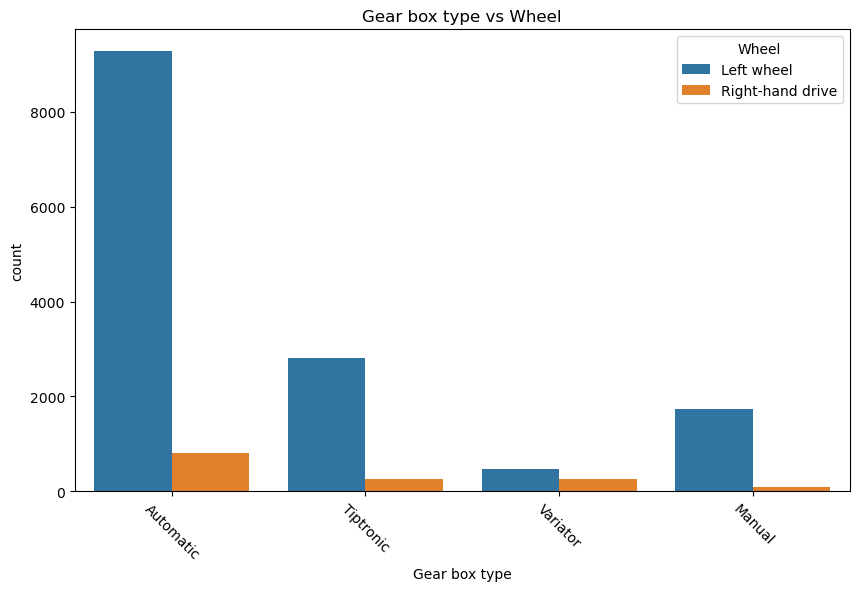

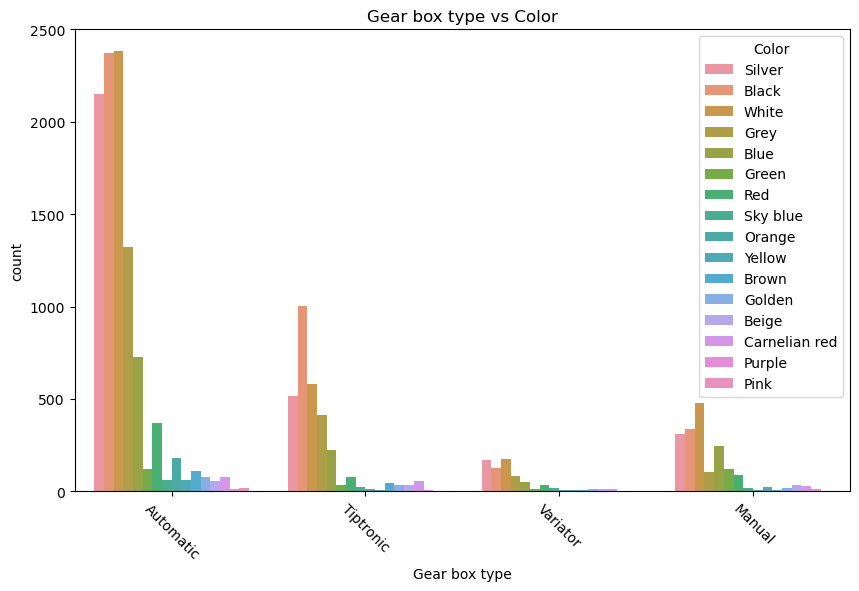

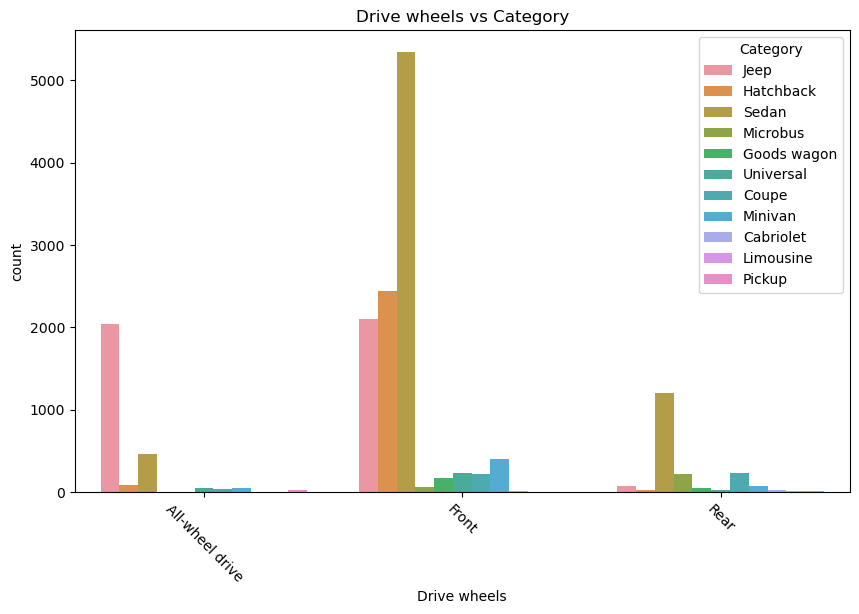

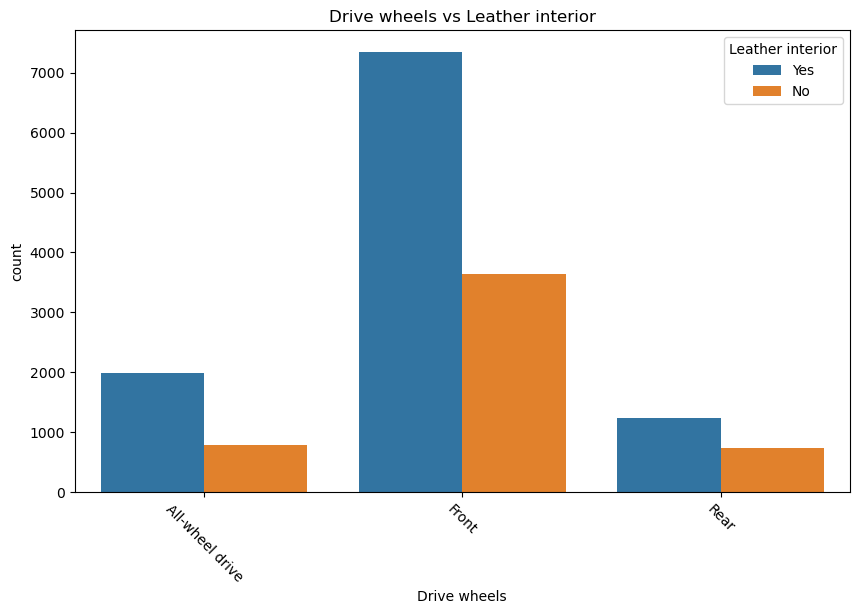

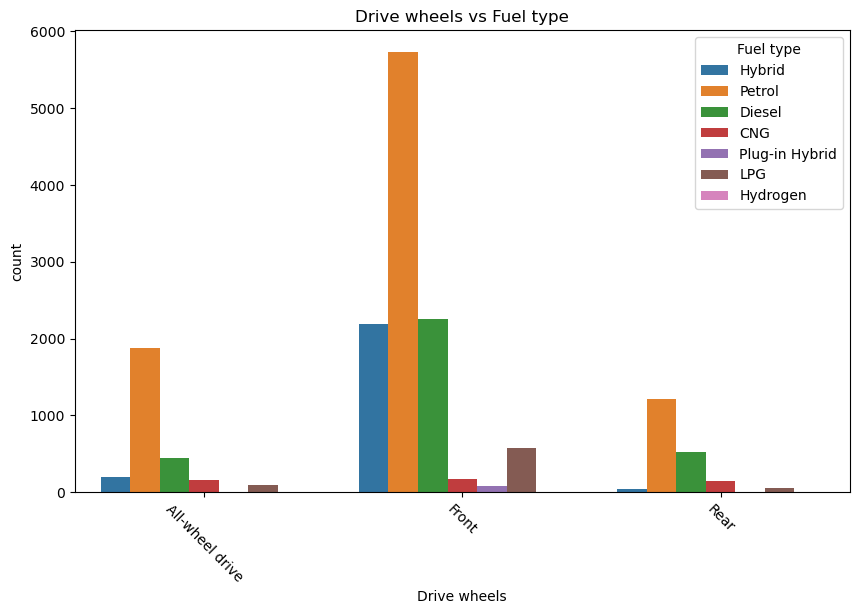

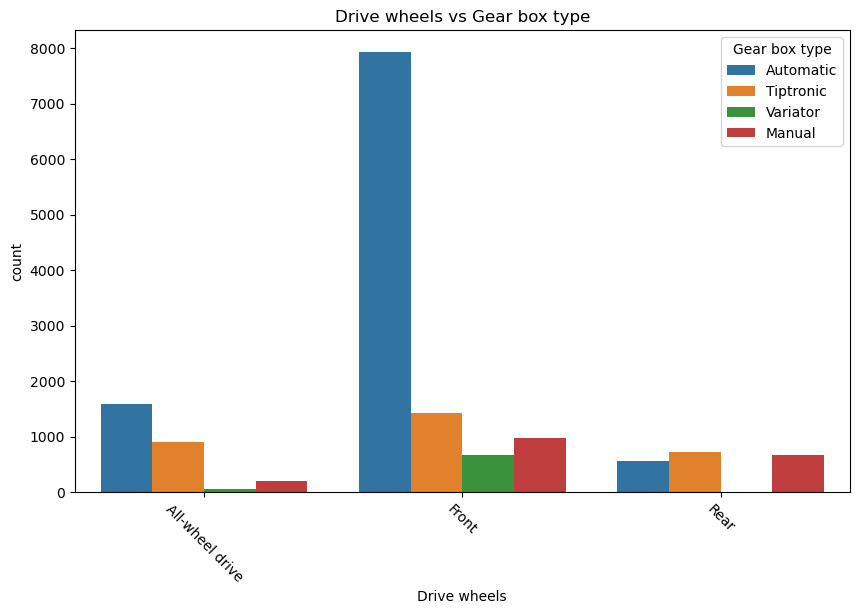

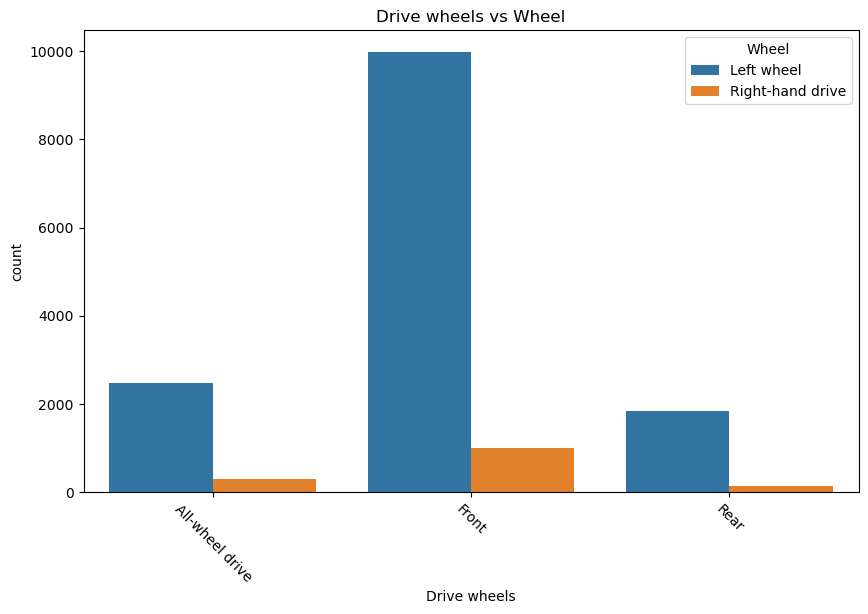

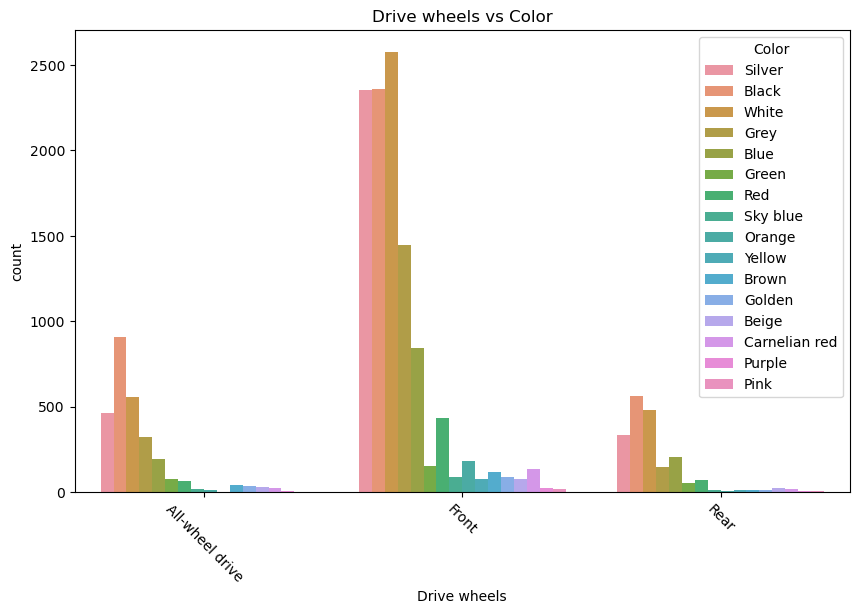

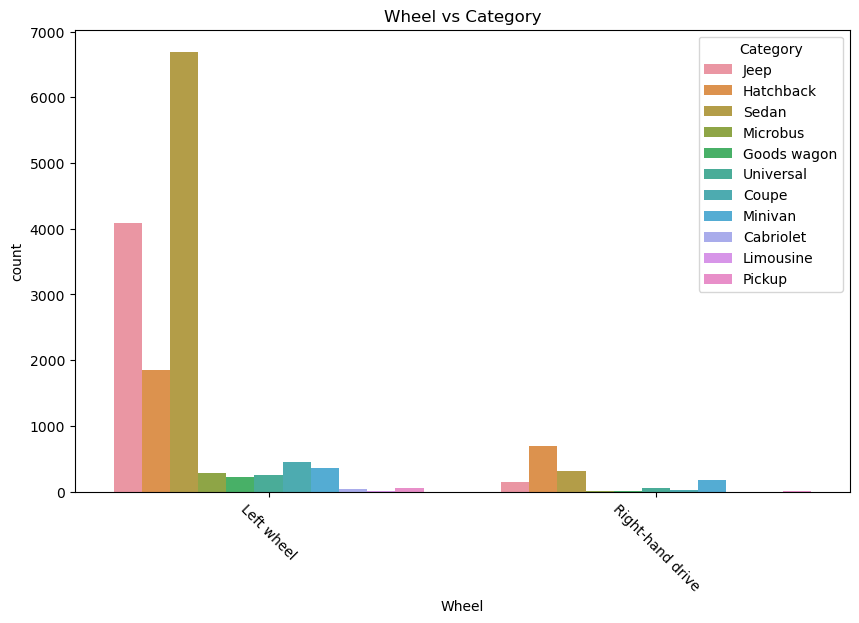

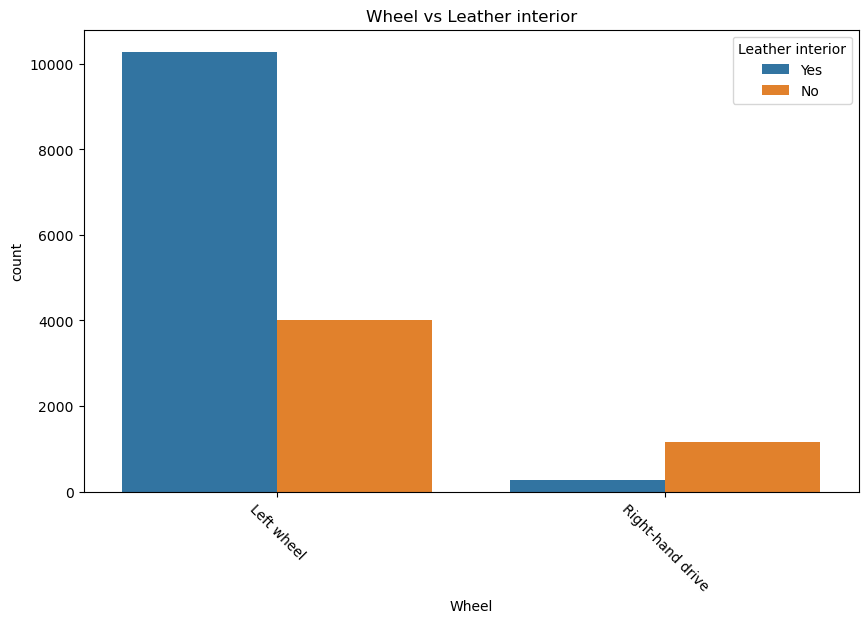

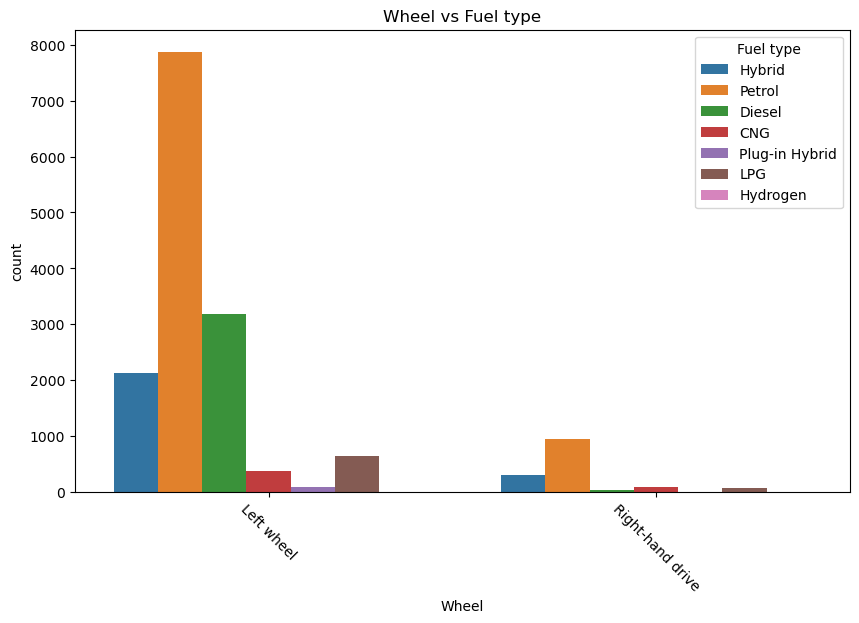

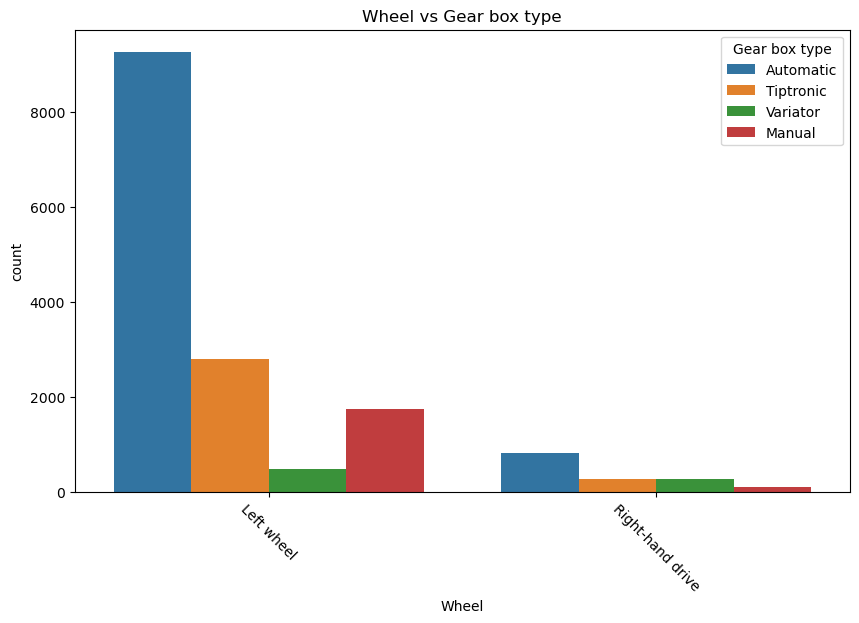

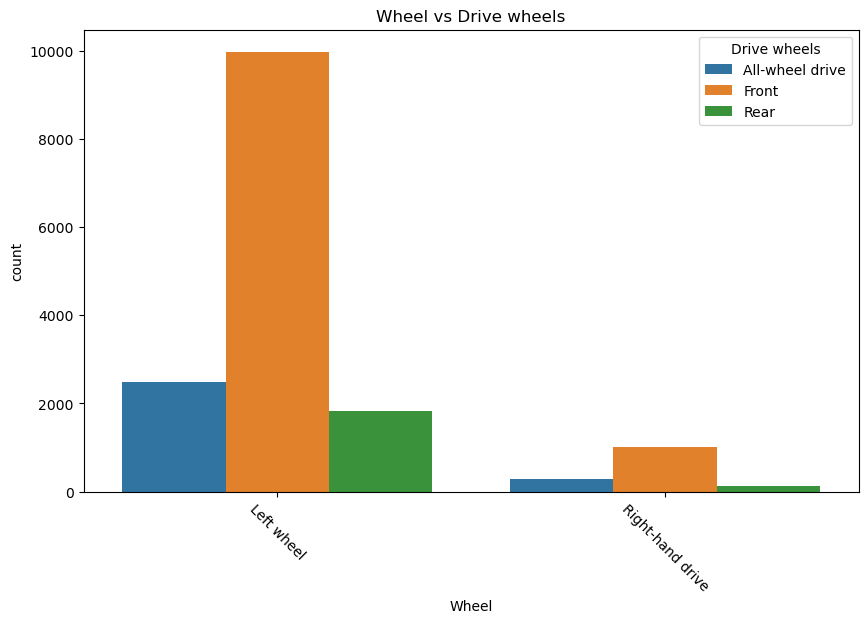

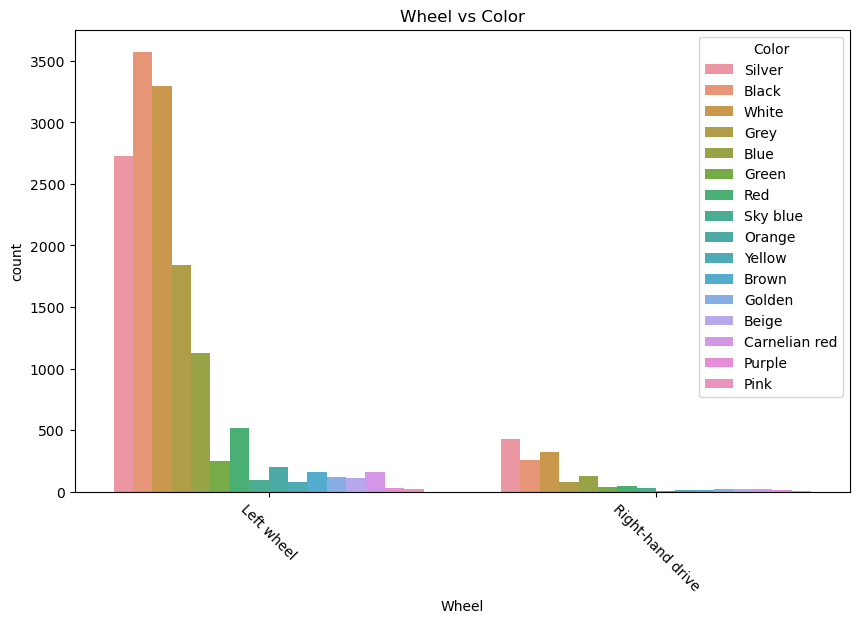

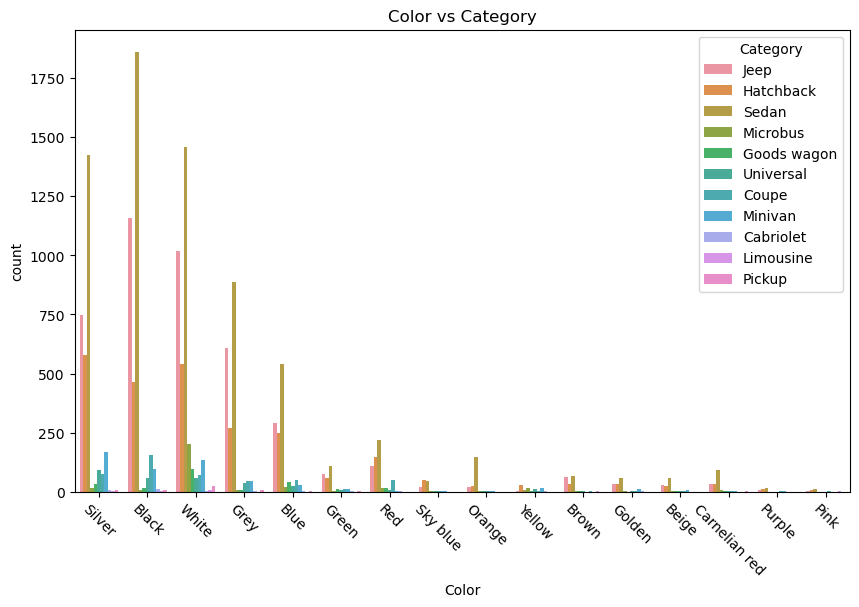

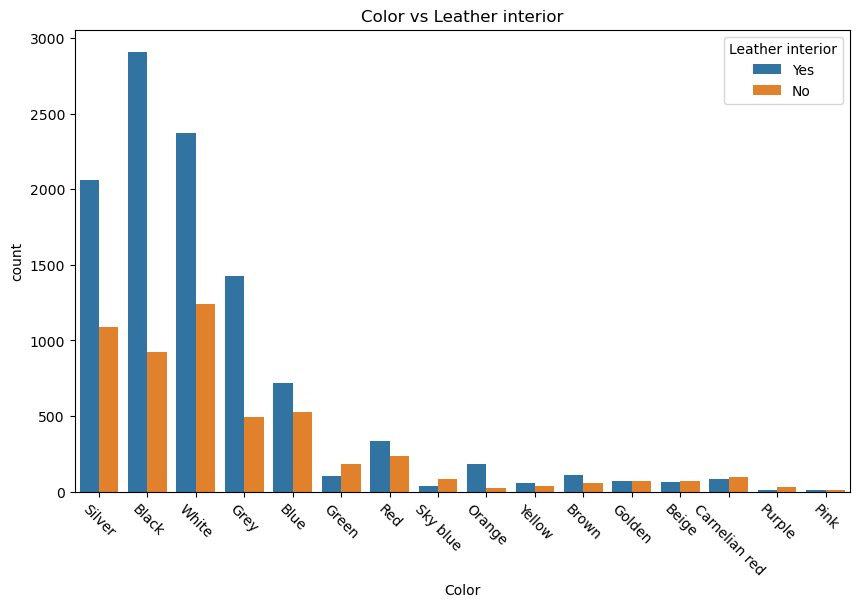

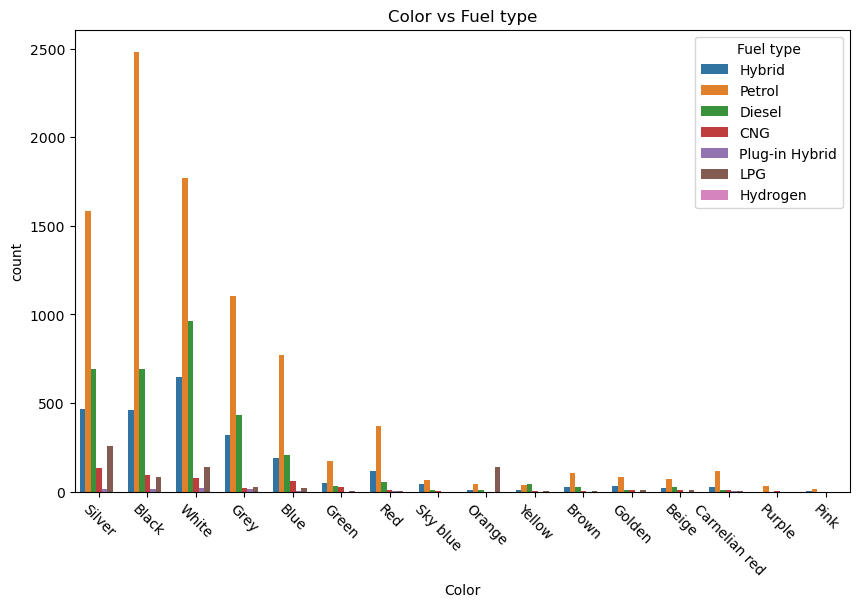

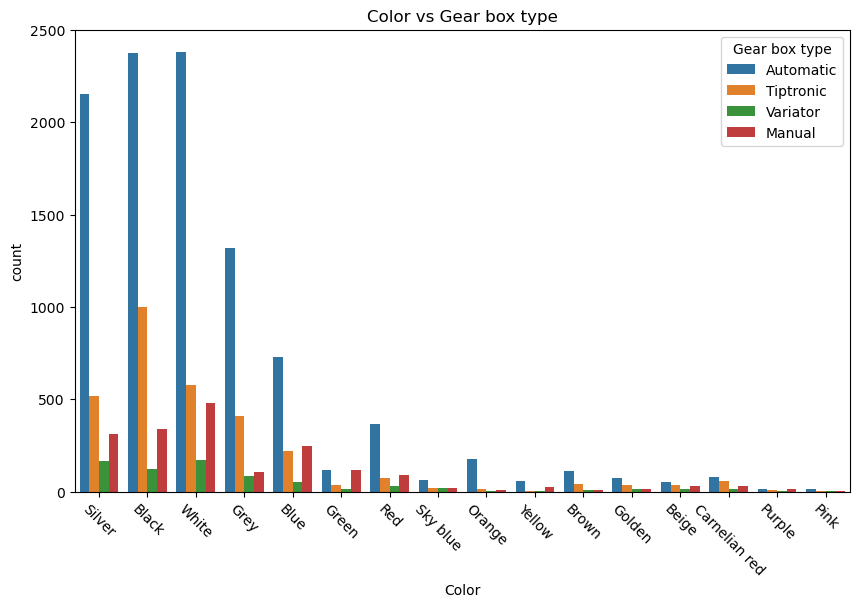

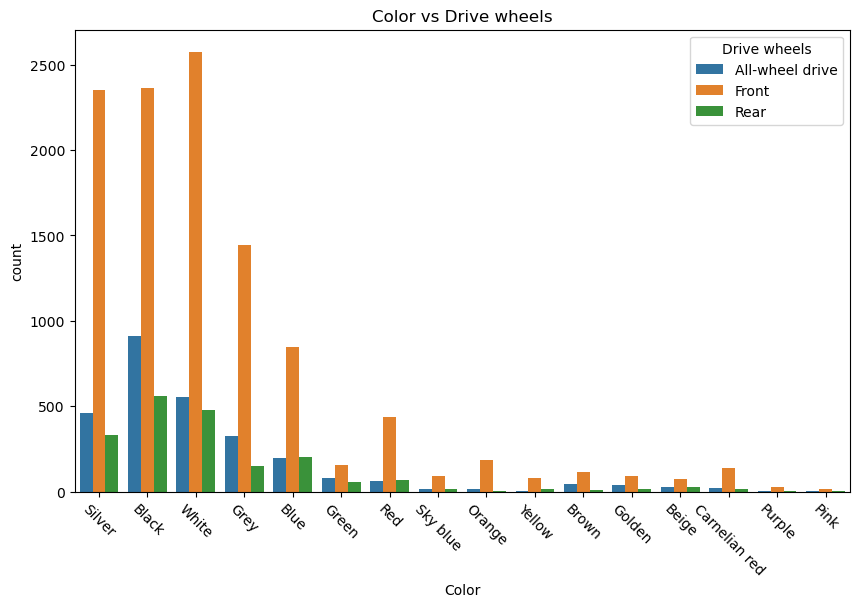

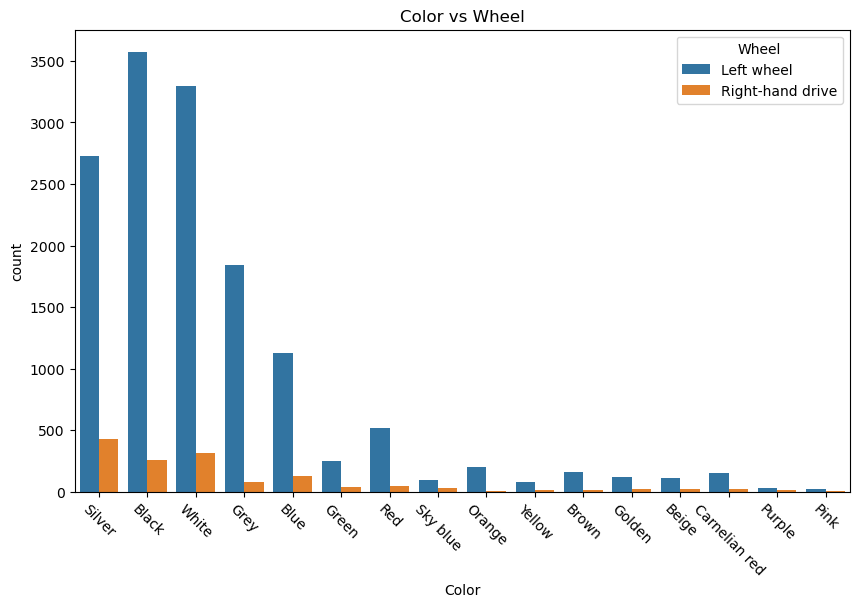

In [176]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

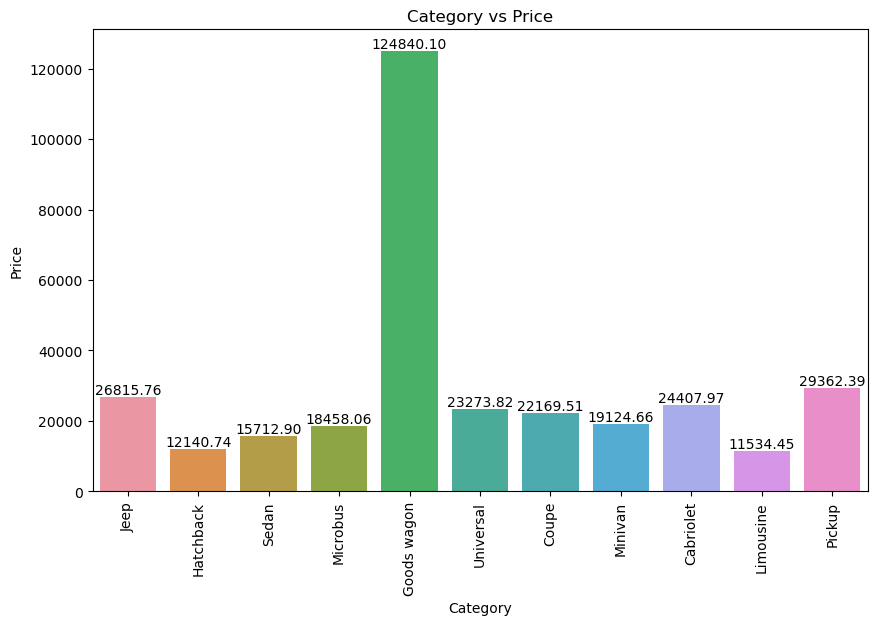

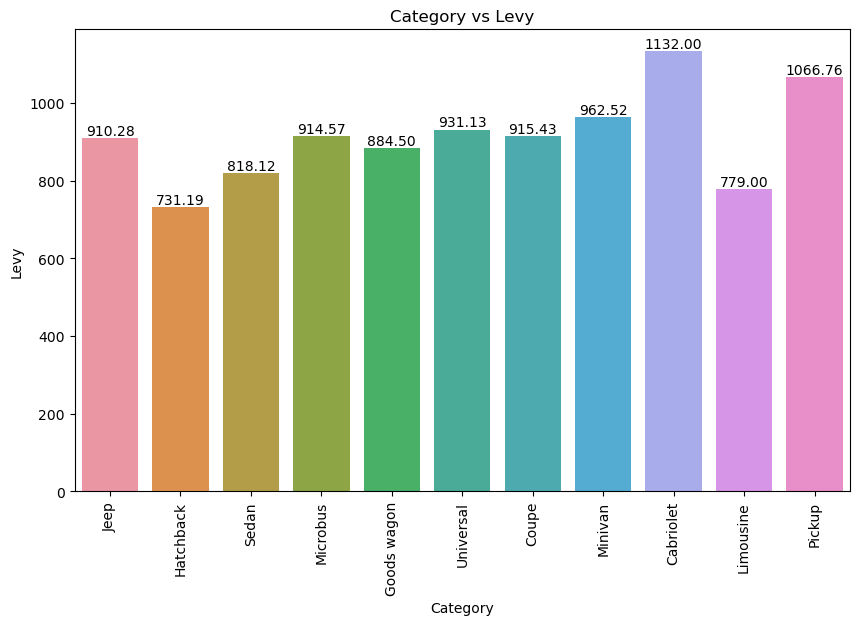

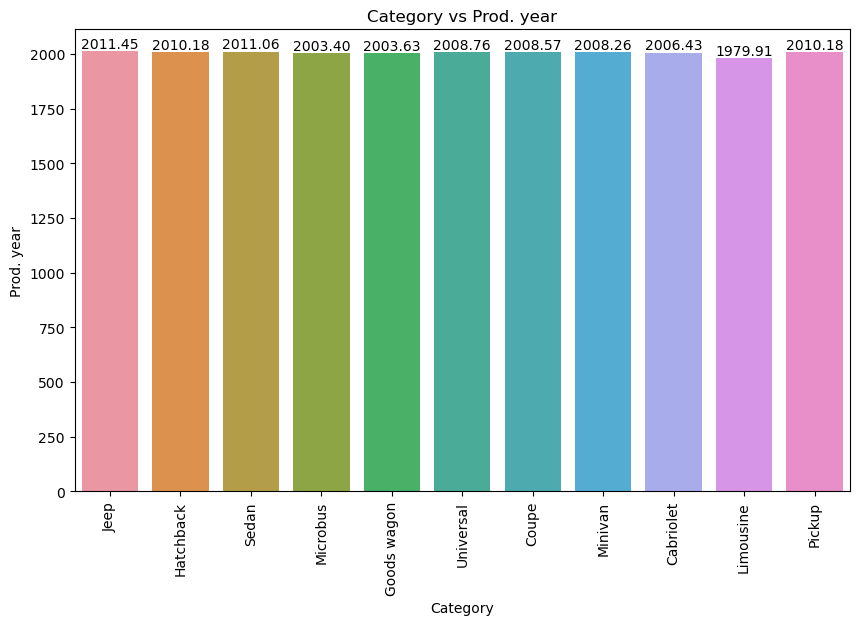

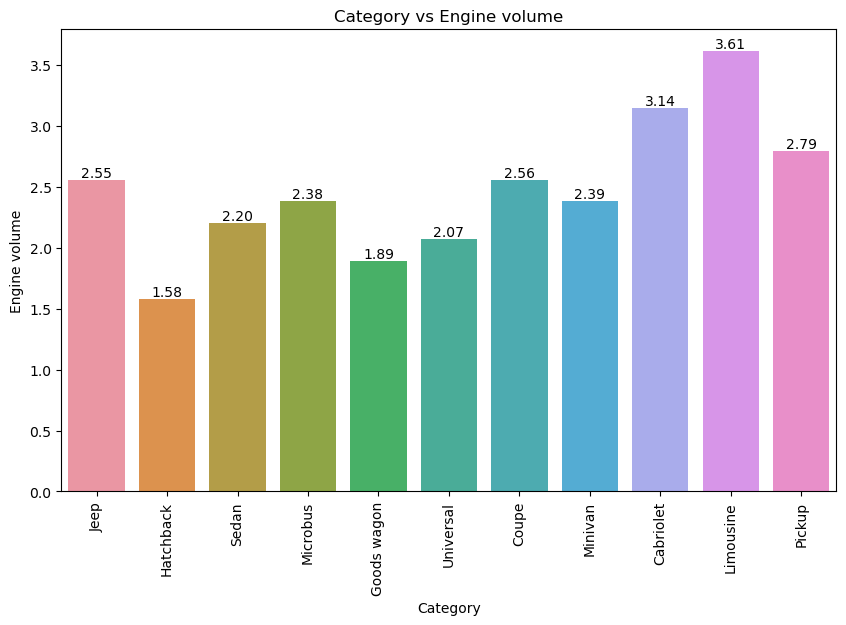

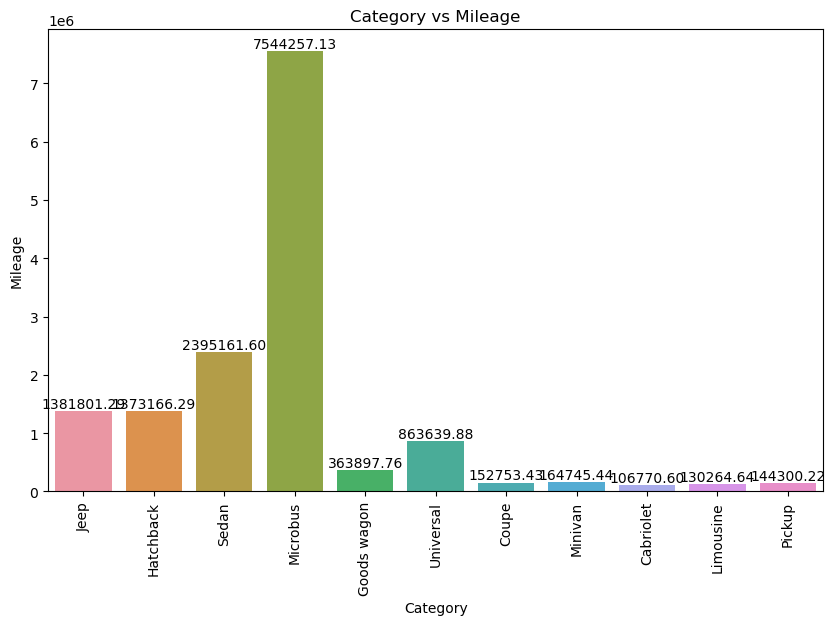

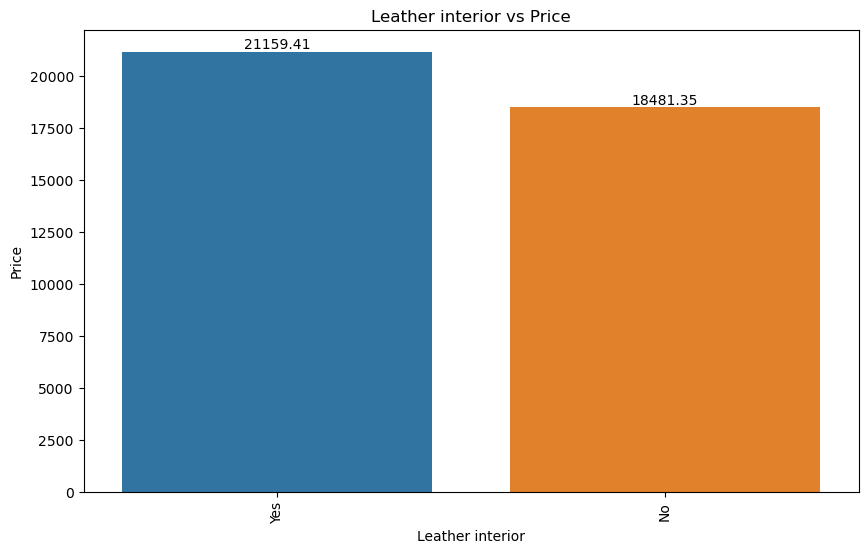

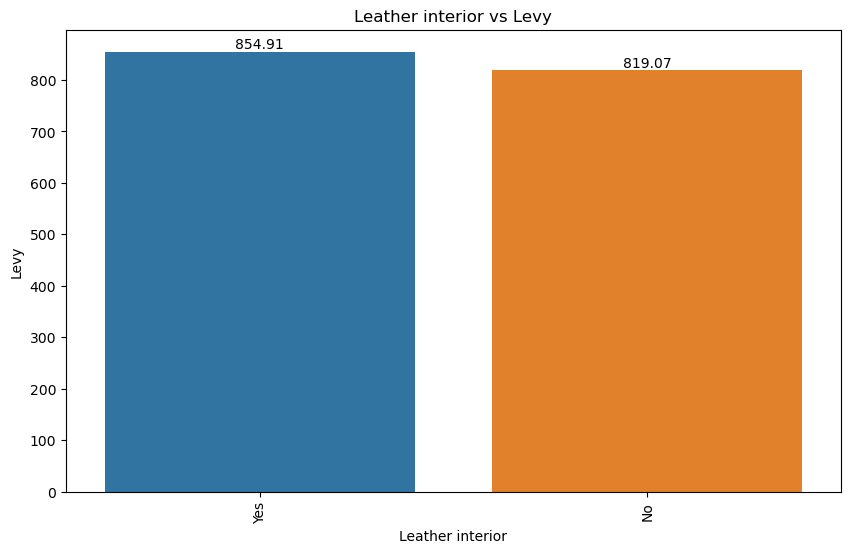

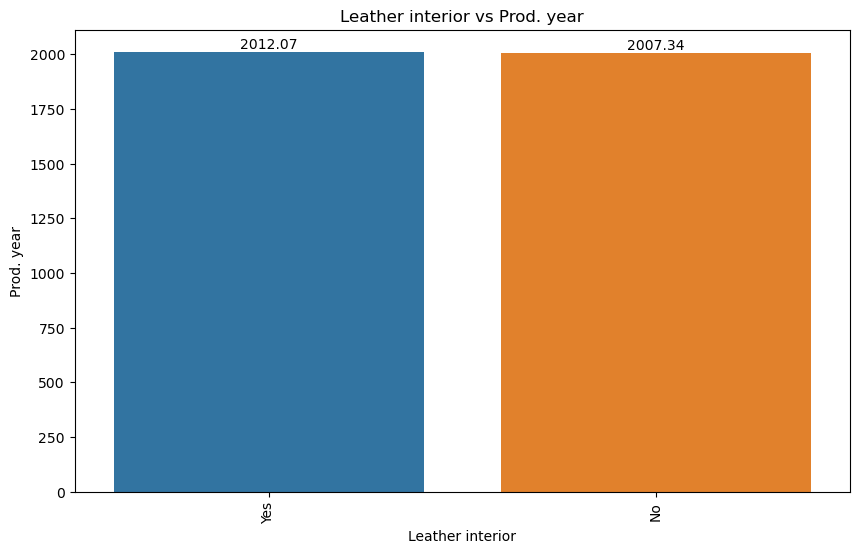

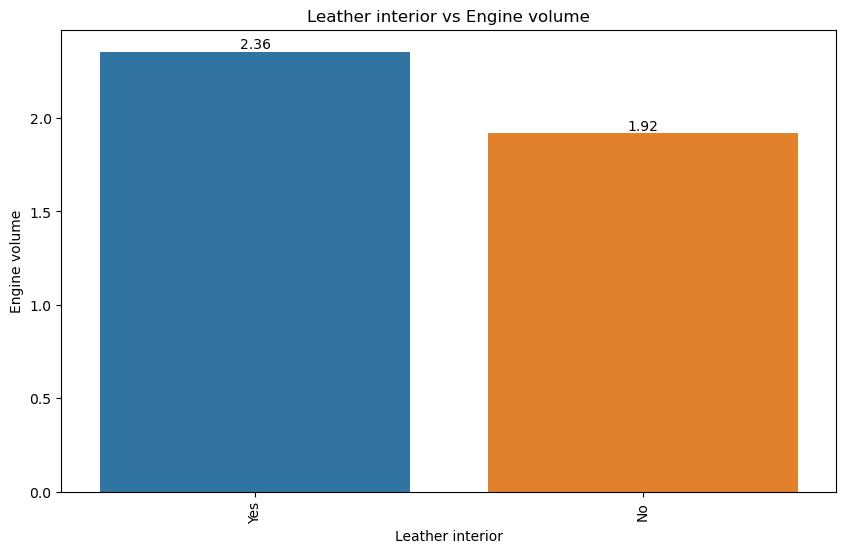

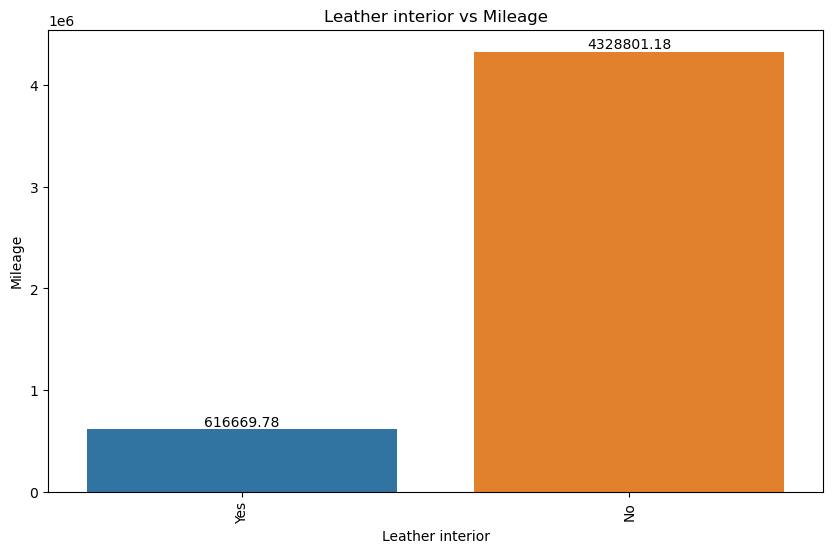

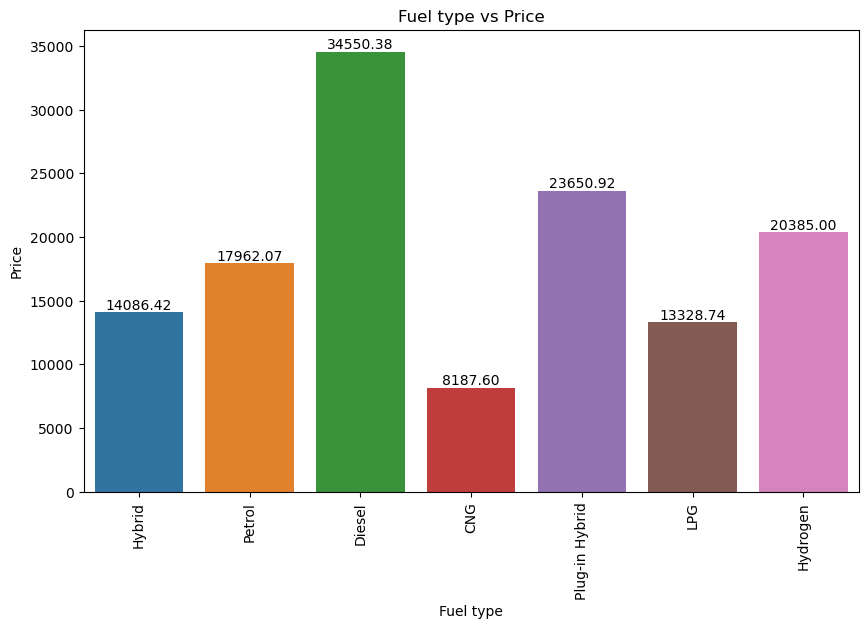

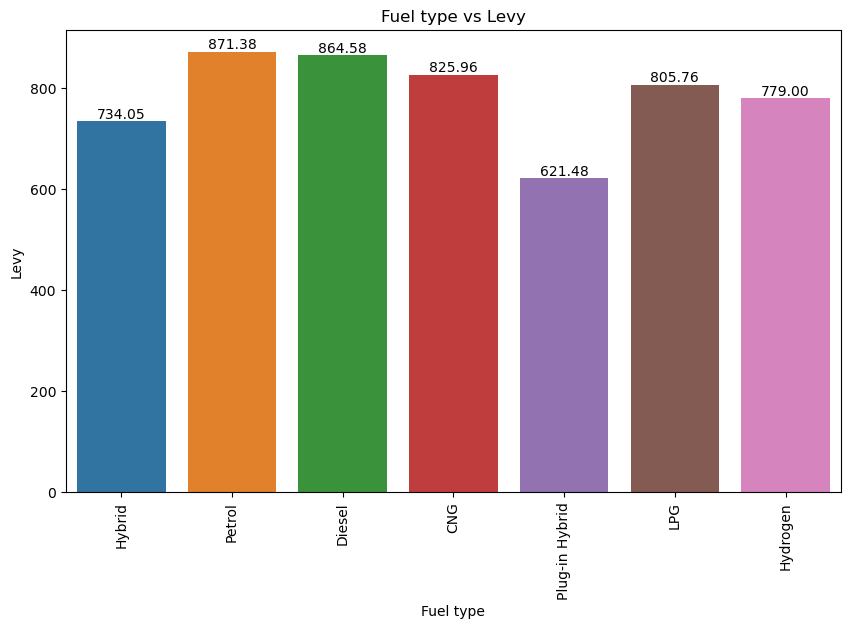

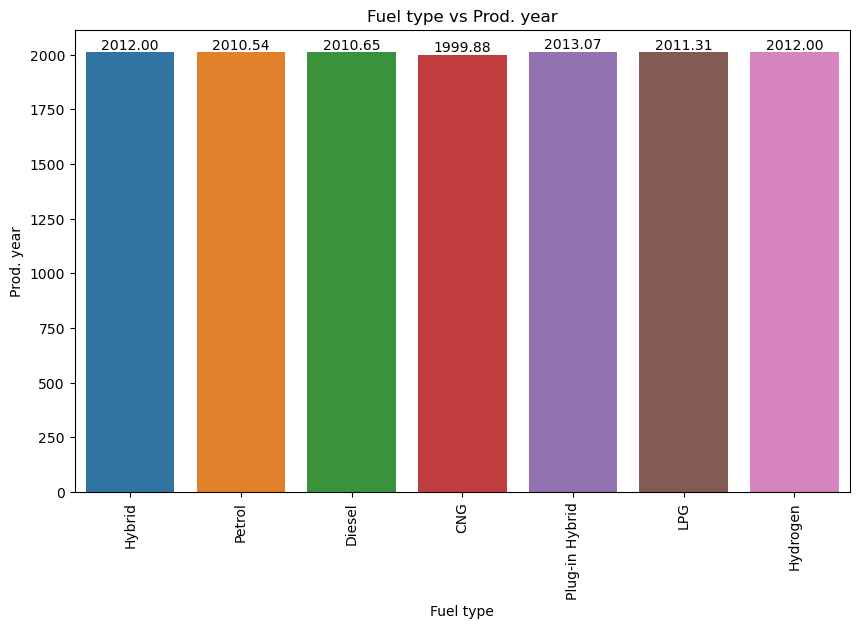

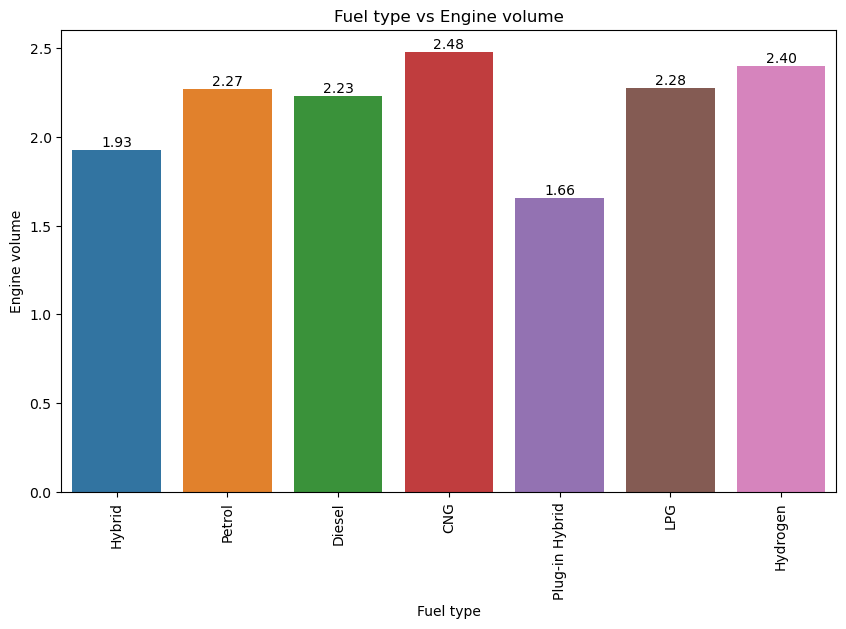

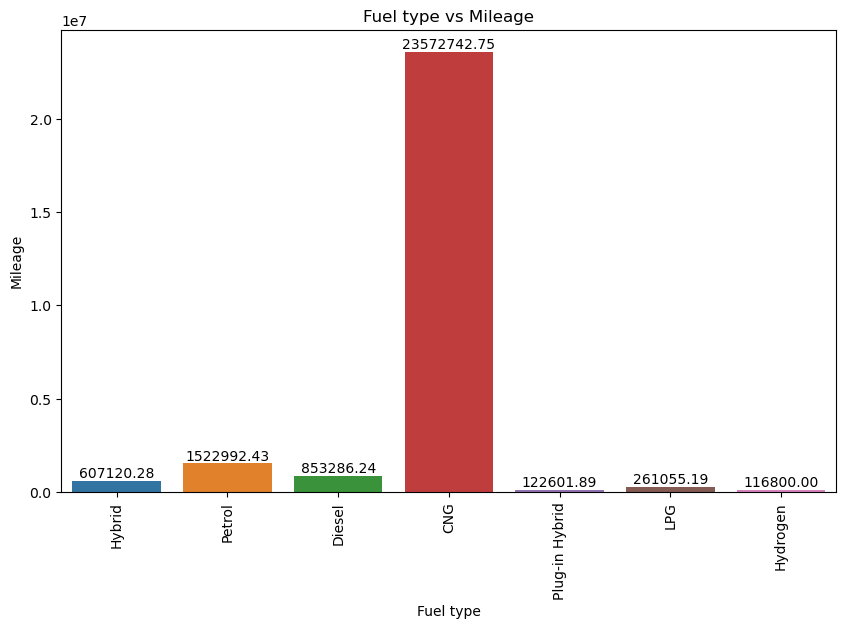

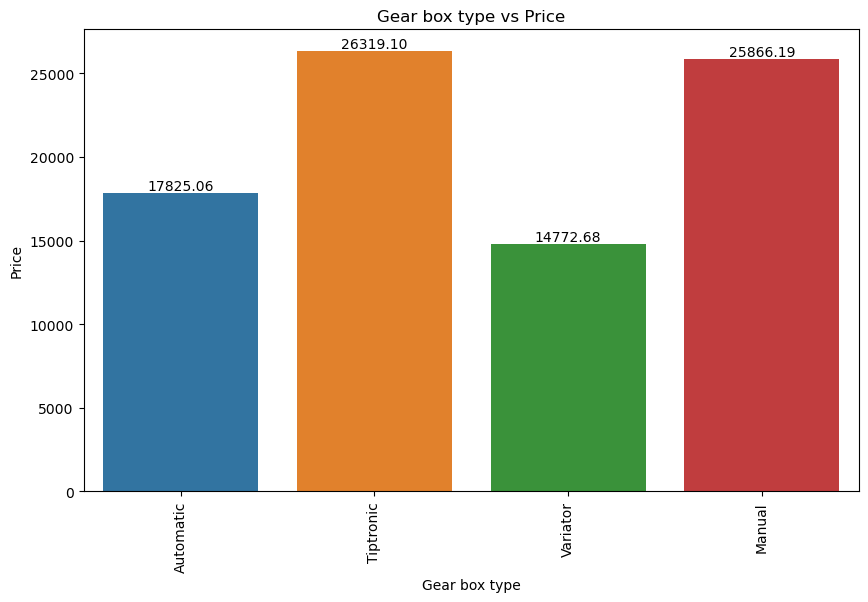

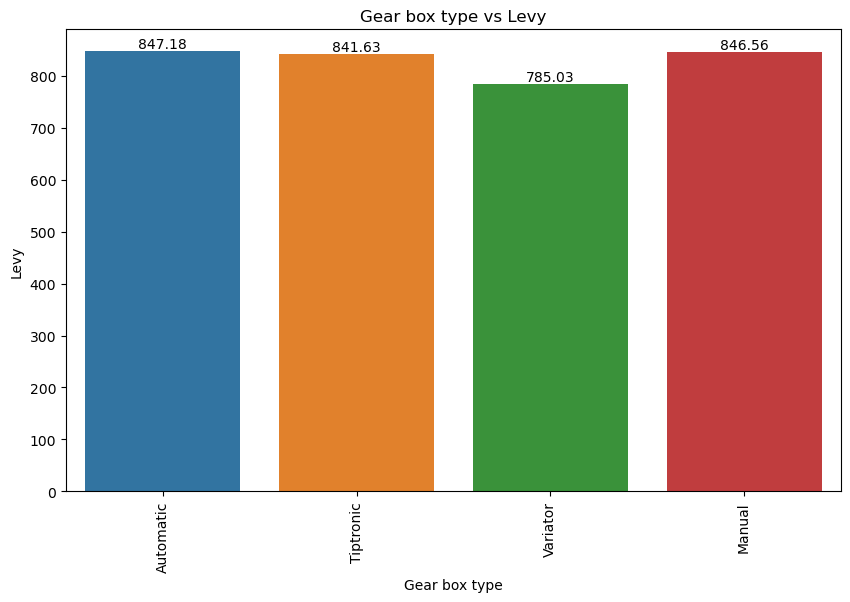

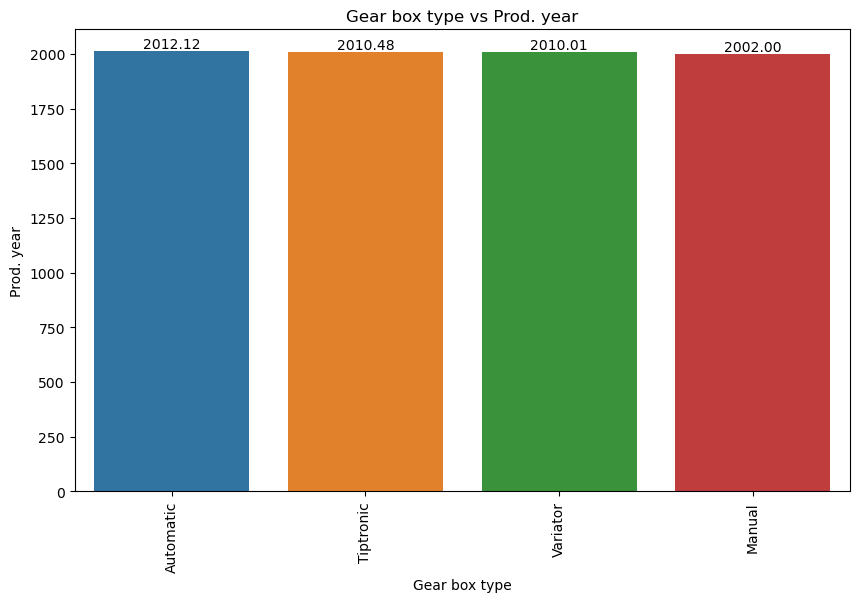

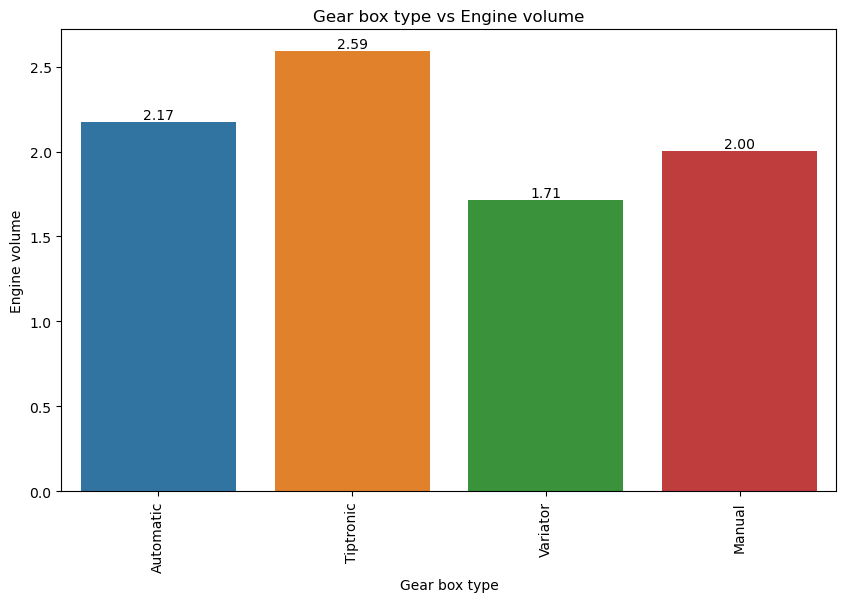

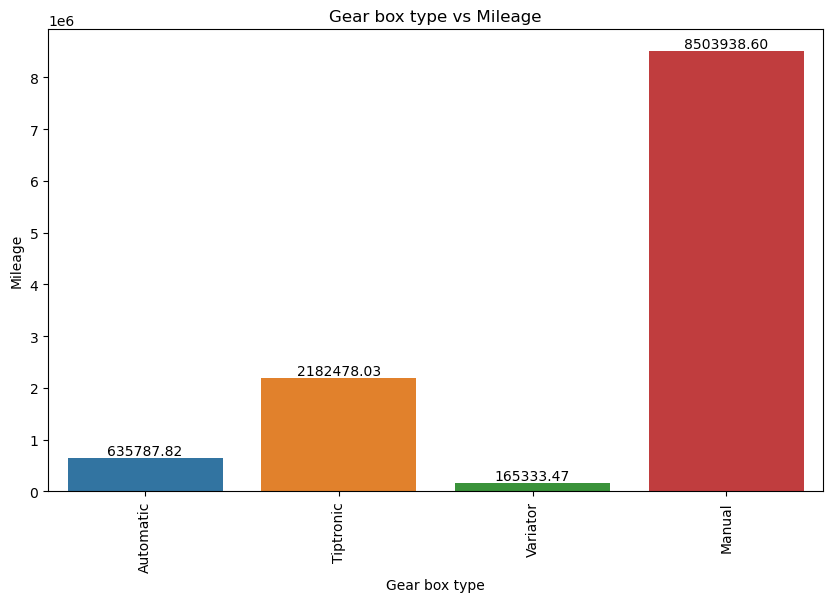

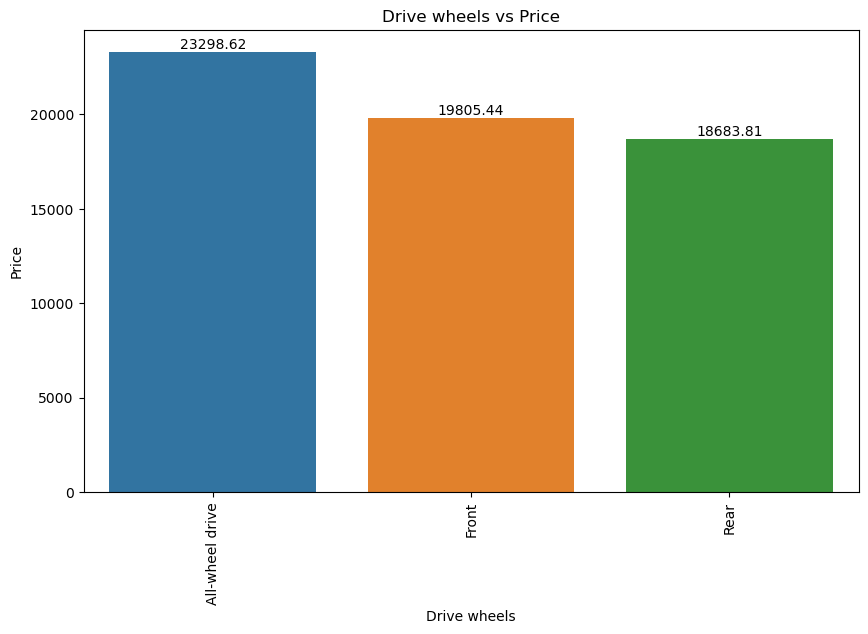

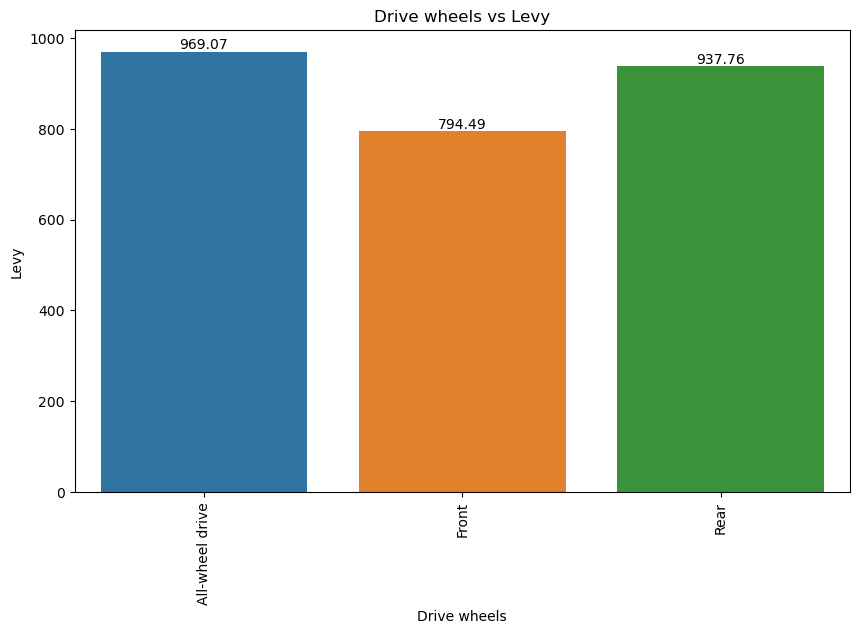

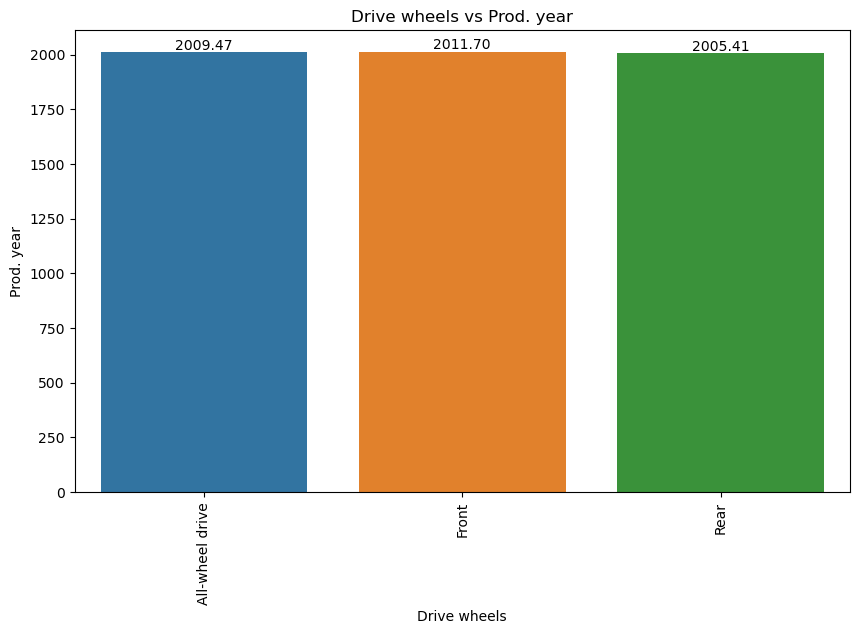

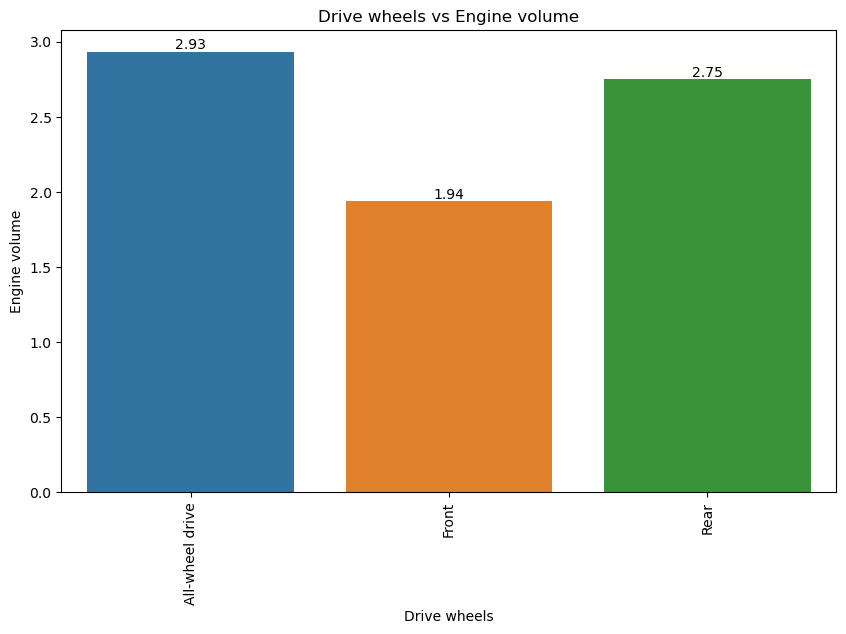

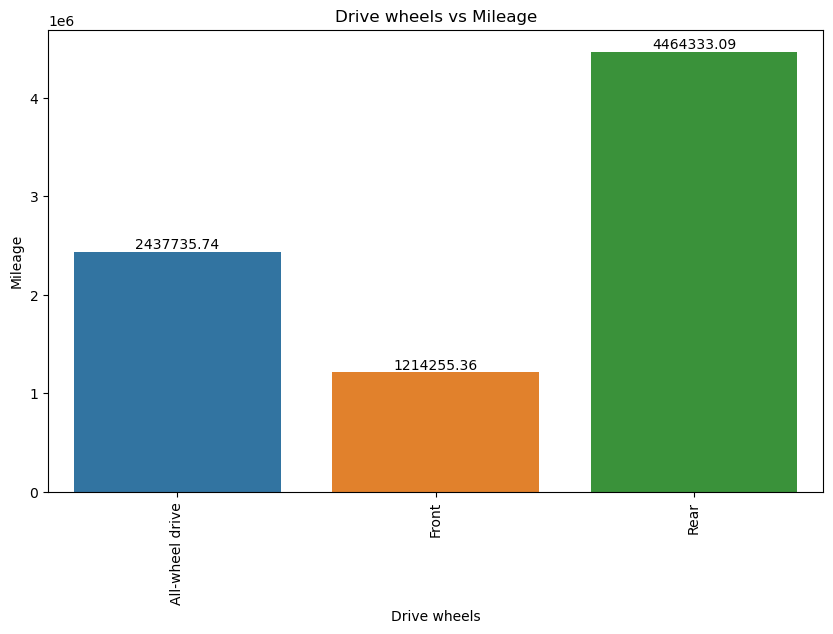

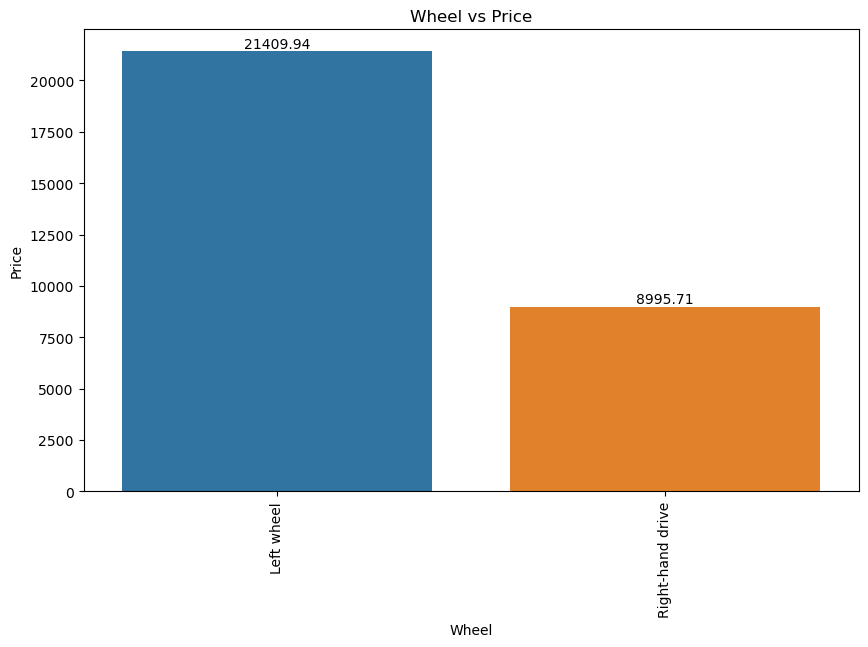

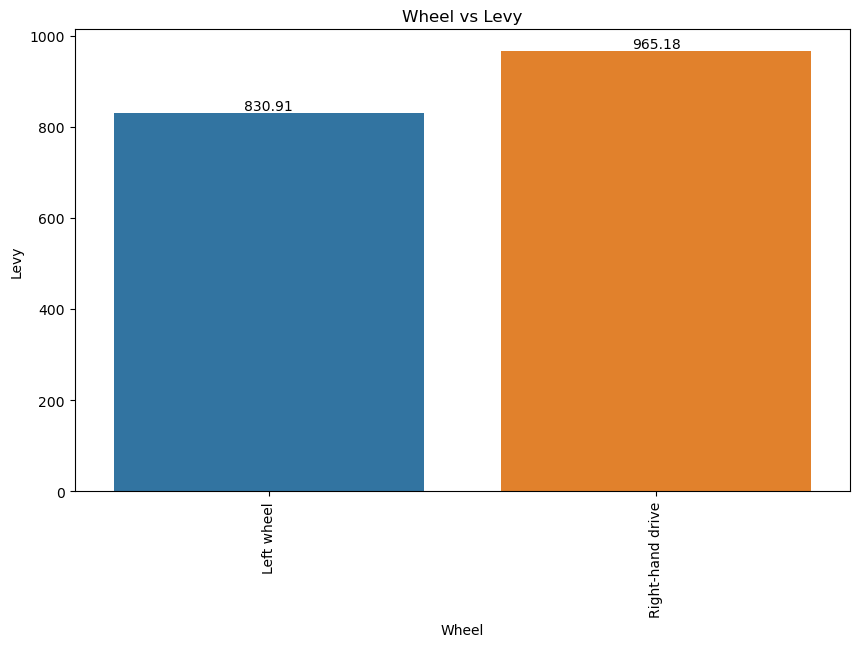

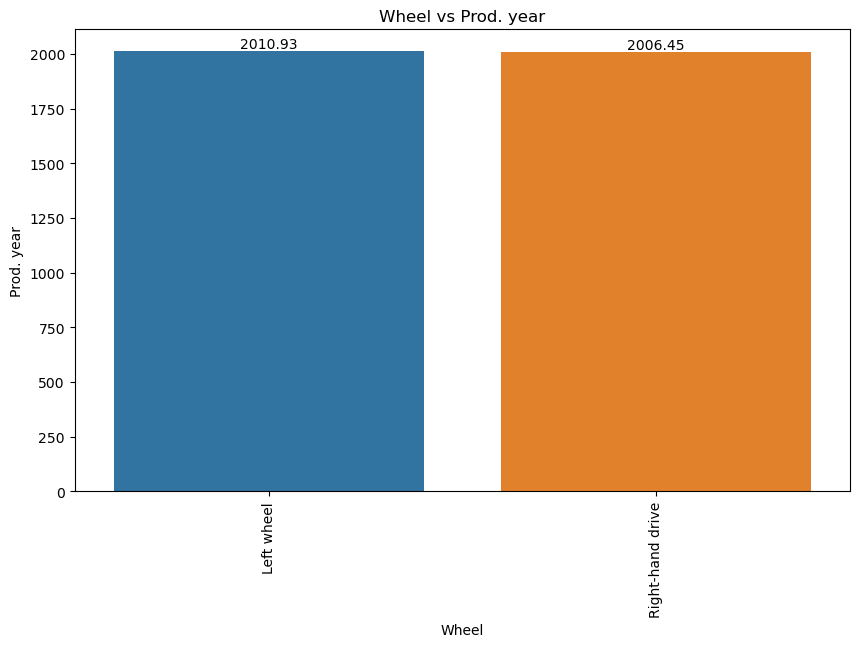

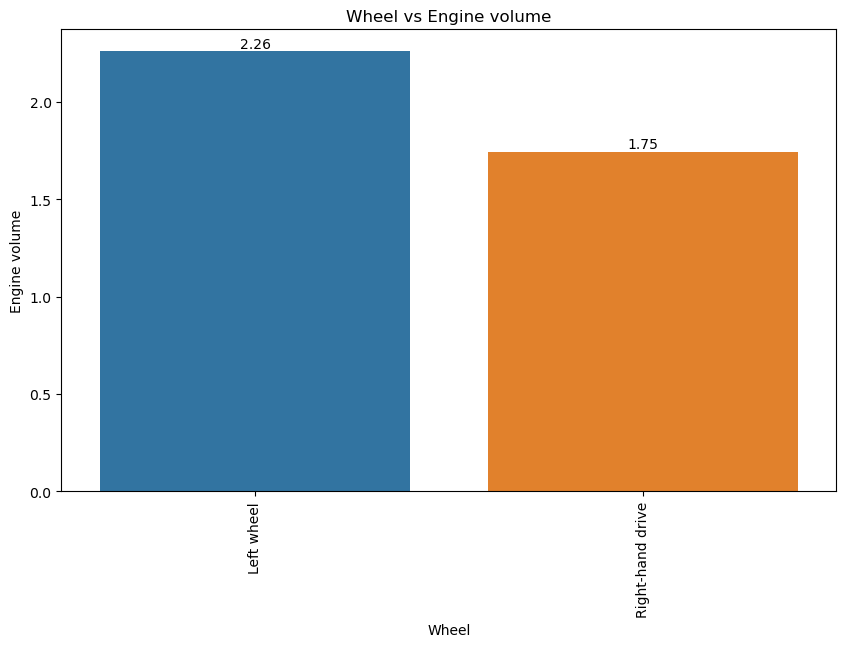

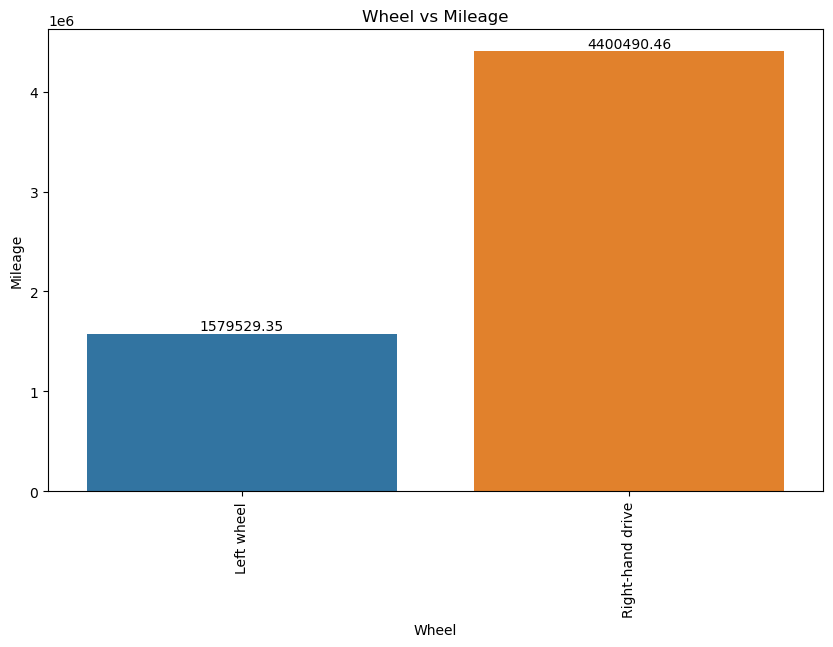

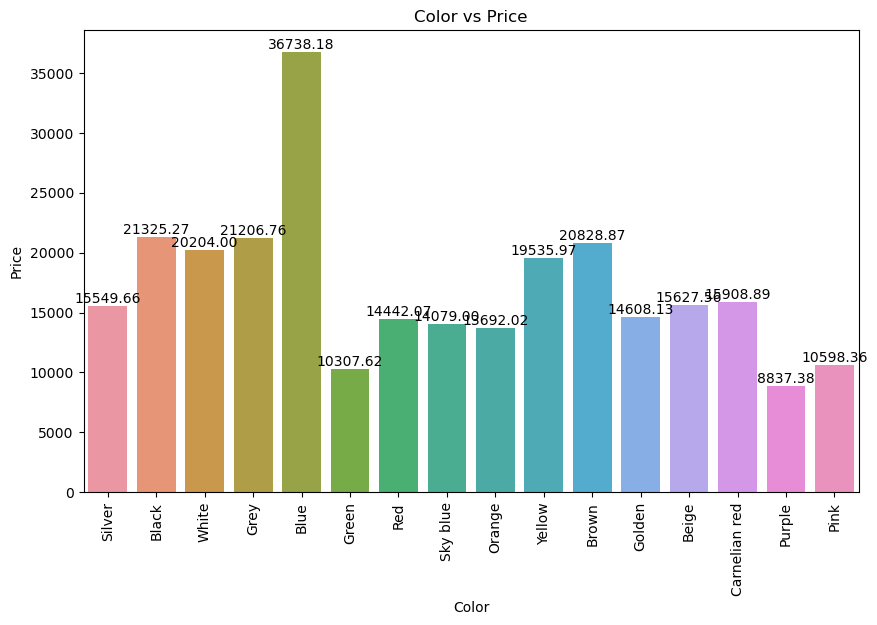

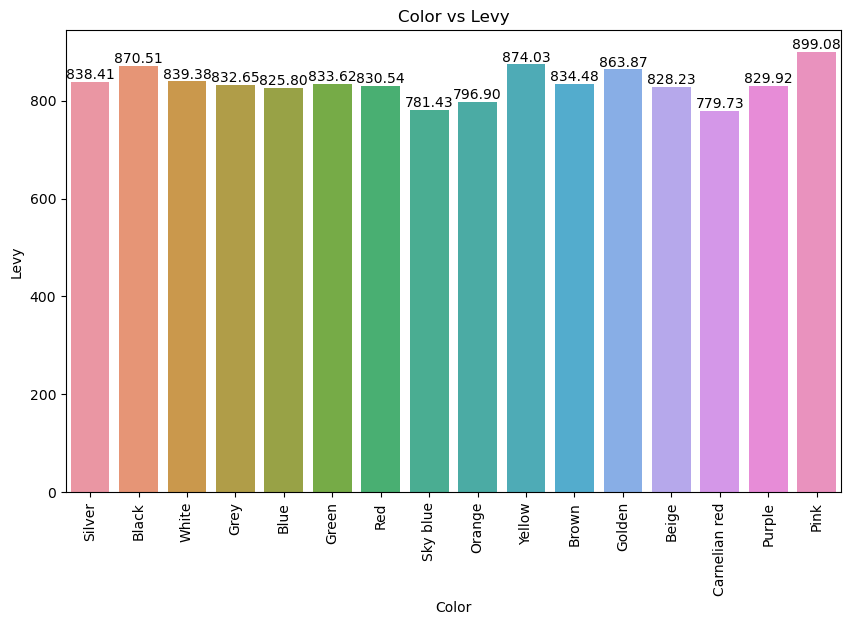

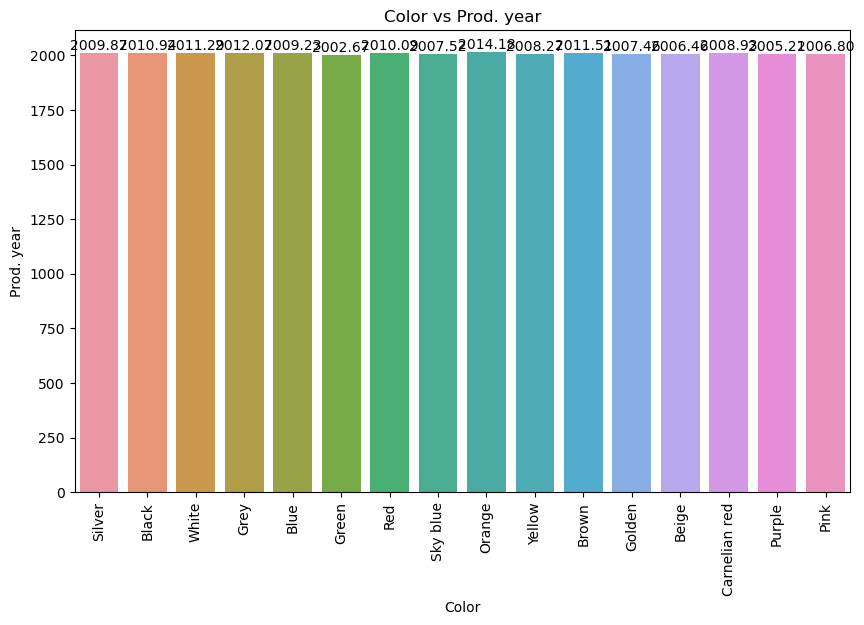

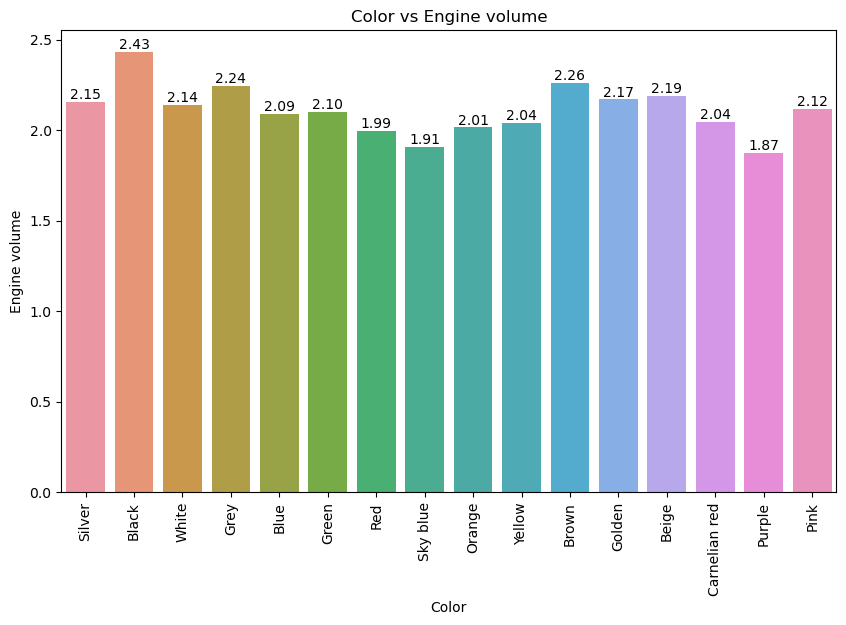

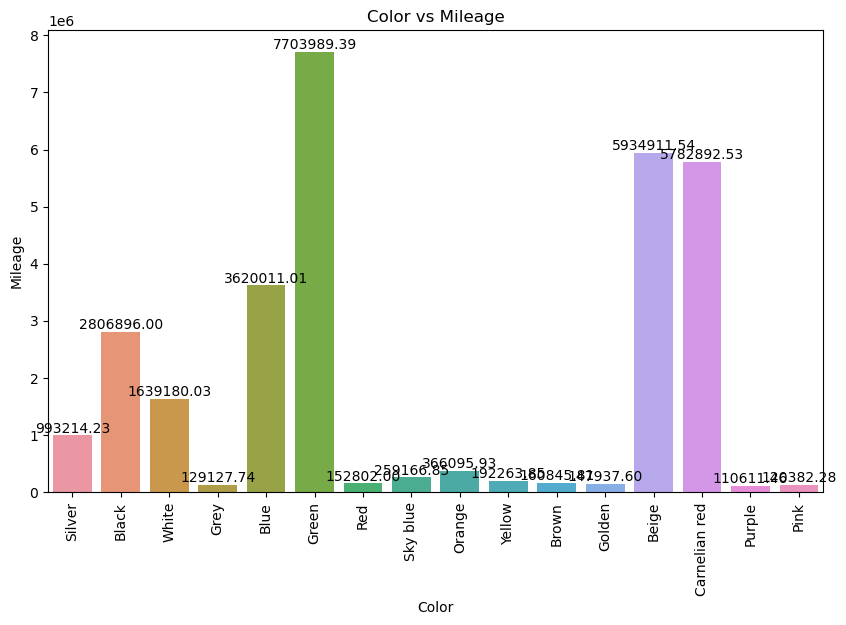

In [178]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

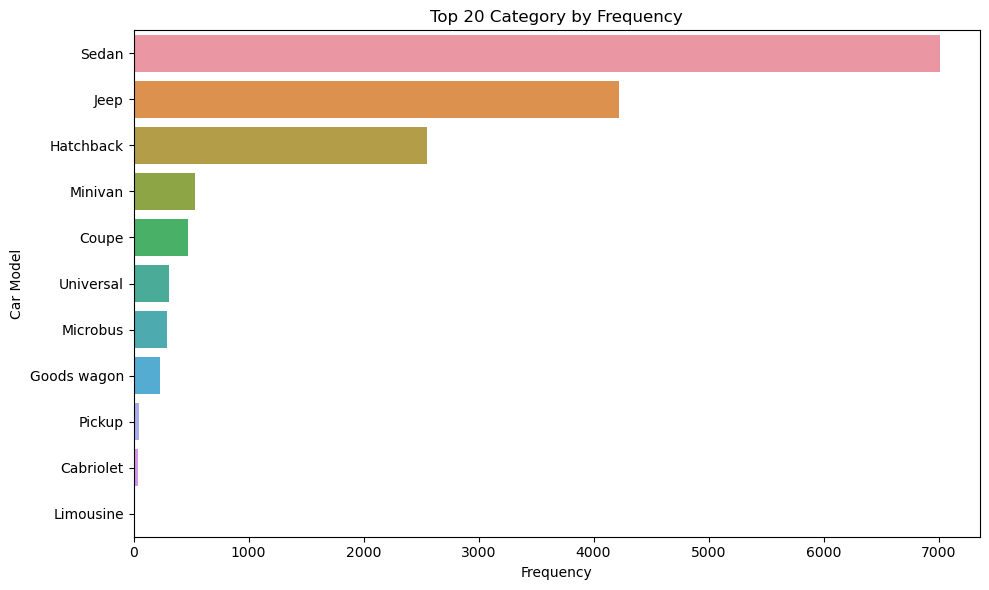

In [180]:
n = 20  
category_models = df['Category'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_models.values, y=category_models.index)
plt.title(f'Top {n} Category by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

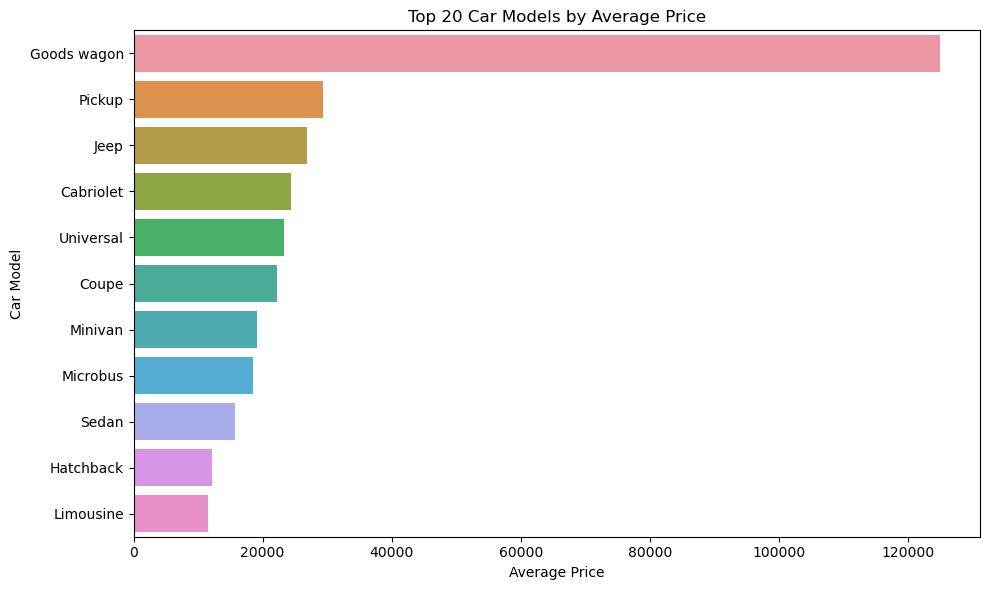

In [182]:
avg_prices_by_car = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

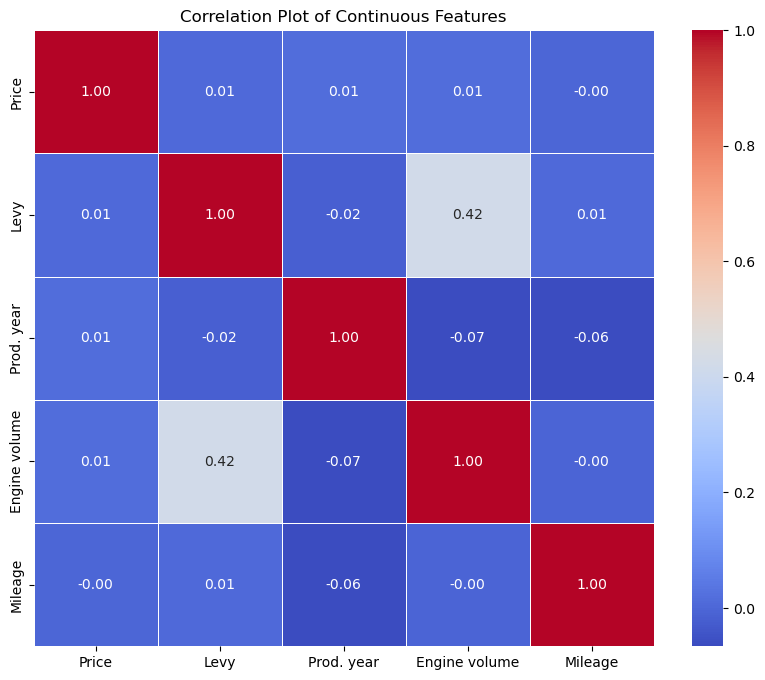

In [184]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [186]:
df

Price    Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0          LEXUS   RX 450        2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2011       Jeep   
2       8467   779.0          HONDA      FIT        2006  Hatchback   
3       3607   862.0           FORD   Escape        2011       Jeep   
4      11726   446.0          HONDA      FIT        2014  Hatchback   
...      ...     ...            ...      ...         ...        ...   
19230    470   645.0         TOYOTA    Prius        2011  Hatchback   
19232   8467   779.0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson        2010       Jeep   
19236    470   753.0        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid            3.5   186005          6   
1                   No    Petrol            3.0   192000          6   
2                   No    Petrol            1.3   200000          4   
3                  Yes    Hybrid            2.5   168966          4   
4                  Yes    Petrol            1.3    91901          4   
...                ...       ...            ...      ...        ...   
19230              Yes    Hybrid            1.8   307325          4   
19232              Yes       CNG            2.0   300000          4   
19233              Yes    Petrol            2.4   161600          4   
19234              Yes    Diesel            2.0   116365          4   
19236              Yes    Hybrid            2.4   186923          4   

      Gear box type     Drive wheels             Wheel   Color  Airbags  
0         Automatic  All-wheel drive        Left wheel  Silver       12  
1         Tiptronic  All-wheel drive        Left wheel   Black        8  
2          Variator            Front  Right-hand drive   Black        2  
3         Automatic  All-wheel drive        Left wheel   White        0  
4         Automatic            Front        Left wheel  Silver        4  
...             ...              ...               ...     ...      ...  
19230     Automatic            Front        Left wheel  Silver       12  
19232        Manual             Rear        Left wheel  Silver        5  
19233     Tiptronic            Front        Left wheel     Red        8  
19234     Automatic            Front        Left wheel    Grey        4  
19236     Automatic            Front        Left wheel   White       12  

[15725 rows x 16 columns]

In [188]:
object_types = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color']

In [190]:
df_dummies = pd.get_dummies(df[object_types])

In [192]:
df_dummies

Manufacturer_ACURA  Manufacturer_ALFA ROMEO  Manufacturer_ASTON MARTIN  \
0                   False                    False                      False   
1                   False                    False                      False   
2                   False                    False                      False   
3                   False                    False                      False   
4                   False                    False                      False   
...                   ...                      ...                        ...   
19230               False                    False                      False   
19232               False                    False                      False   
19233               False                    False                      False   
19234               False                    False                      False   
19236               False                    False                      False   

       Manufacturer_AUDI  Manufacturer_BENTLEY  Manufacturer_BMW  \
0                  False                 False             False   
1                  False                 False             False   
2                  False                 False             False   
3                  False                 False             False   
4                  False                 False             False   
...                  ...                   ...               ...   
19230              False                 False             False   
19232              False                 False             False   
19233              False                 False             False   
19234              False                 False             False   
19236              False                 False             False   

       Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
0                   False                  False                   False   
1                   False                  False                    True   
2                   False                  False                   False   
3                   False                  False                   False   
4                   False                  False                   False   
...                   ...                    ...                     ...   
19230               False                  False                   False   
19232               False                  False                   False   
19233               False                  False                   False   
19234               False                  False                   False   
19236               False                  False                   False   

       Manufacturer_CHRYSLER  ...  Color_Green  Color_Grey  Color_Orange  \
0                      False  ...        False       False         False   
1                      False  ...        False       False         False   
2                      False  ...        False       False         False   
3                      False  ...        False       False         False   
4                      False  ...        False       False         False   
...                      ...  ...          ...         ...           ...   
19230                  False  ...        False       False         False   
19232                  False  ...        False       False         False   
19233                  False  ...        False       False         False   
19234                  False  ...        False        True         False   
19236                  False  ...        False       False         False   

       Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Sky blue  \
0           False         False      False          True           False   
1           False         False      False         False           False   
2           False         False      False         False           False   
3           False         False      False         False           False   
4          

In [194]:
df_final = pd.concat([df.drop(object_types, axis=1), df_dummies], axis=1)

In [196]:
df_final = df_final.drop('Model', axis = 1) 

In [198]:
df_final 

Price    Levy  Prod. year  Engine volume  Mileage  Cylinders  Airbags  \
0      13328  1399.0        2010            3.5   186005          6       12   
1      16621  1018.0        2011            3.0   192000          6        8   
2       8467   779.0        2006            1.3   200000          4        2   
3       3607   862.0        2011            2.5   168966          4        0   
4      11726   446.0        2014            1.3    91901          4        4   
...      ...     ...         ...            ...      ...        ...      ...   
19230    470   645.0        2011            1.8   307325          4       12   
19232   8467   779.0        1999            2.0   300000          4        5   
19233  15681   831.0        2011            2.4   161600          4        8   
19234  26108   836.0        2010            2.0   116365          4        4   
19236    470   753.0        2012            2.4   186923          4       12   

       Manufacturer_ACURA  Manufacturer_ALFA ROMEO  Manufacturer_ASTON MARTIN  \
0                   False                    False                      False   
1                   False                    False                      False   
2                   False                    False                      False   
3                   False                    False                      False   
4                   False                    False                      False   
...                   ...                      ...                        ...   
19230               False                    False                      False   
19232               False                    False                      False   
19233               False                    False                      False   
19234               False                    False                      False   
19236               False                    False                      False   

       ...  Color_Green  Color_Grey  Color_Orange  Color_Pink  Color_Purple  \
0      ...        False       False         False       False         False   
1      ...        False       False         False       False         False   
2      ...        False       False         False       False         False   
3      ...        False       False         False       False         False   
4      ...        False       False         False       False         False   
...    ...          ...         ...           ...         ...           ...   
19230  ...        False       False         False       False         False   
19232  ...        False       False         False       False         False   
19233  ...        False       False         False       False         False   
19234  ...        False        True         False       False         False   
19236  ...        False       False         False       False         False   

       Color_Red  Color_Silver  Color_Sky blue  Color_White  Color_Yellow  
0          False          True           False        False         False  
1          False         False           False        False         False  
2          False         False           False        False         False  
3          False         False           False         True         False  
4          False          True           False        False         False  
...          ...           ...             ...          ...           ...  
19230      False          True           False        False         False  
19232      False          True           False        False         False  
19233       True         False           False        False         False  
19234      False         False           False        False         False  
19236      False         False           False         True         False  

[15725 rows x 117 columns]

In [202]:
df1 = df_final.copy()

In [204]:
for feature in continuous:
    df1[feature + '_log'] = np.log(df1[feature]+1)

In [206]:
df1 = df1.drop(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage'], axis = 1)

In [208]:
X = df1.drop('Price_log', axis = 1)
y = df1['Price_log']

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pred = lr_model.predict(X_test)

In [220]:
y_pred_train = lr_model.predict(X_train)

In [222]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.6022701214665307


In [224]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 109774764712194.2


In [226]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  #alpha is a hyper parameter which controls penulty given to errors
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

Mean Squared Error (Ridge): 1.8926844410260444


In [228]:
from sklearn.linear_model import Lasso

In [230]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')

Mean Squared Error (Lasso): 2.2093760268893496


In [232]:
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

print("Ridge Model Coefficients:", ridge_coefficients)
print("Ridge Model Intercept:", ridge_intercept)

Ridge Model Coefficients: [-1.93621156e-02 -5.26086750e-02 -7.09727724e-01 -2.01805279e-01
  4.00551615e-01 -2.83468935e-01  1.80904711e+00 -1.45206467e-02
 -3.31938337e-01 -1.74902598e-02  1.26294696e-01 -4.52336758e-01
  1.39764405e-01 -9.26123460e-02 -2.33269367e-01 -5.43143718e-01
  1.31919055e+00 -1.41951342e-02  6.73836539e-02 -5.50114676e-01
 -3.84875981e-01 -5.75002244e-02  3.45662087e-01  9.08884551e-02
  1.18272220e+00  4.19748660e-01 -9.89059108e-02  1.52751252e-01
  2.80540123e-01  3.39702460e-01  1.02909653e-01  1.60726322e+00
 -9.15331958e-02  7.22022363e-01  5.56017775e-02  9.65253647e-03
  1.07206649e+00 -1.86825393e-01 -2.37360097e-02  1.11178648e-01
  1.54008152e-01 -1.29815461e-01 -1.23153312e+00 -3.38069770e-01
 -4.01518760e-01 -3.46253873e-01 -9.04631960e-02  5.48299591e-01
 -1.89664826e-01 -1.43762928e+00 -9.16468835e-01 -2.25293661e-01
  7.03201099e-02  3.08183424e-01 -6.29800324e-01  2.93361281e-01
  6.13468141e-01 -1.78878136e-01  6.64959016e-03  0.00000000e+00

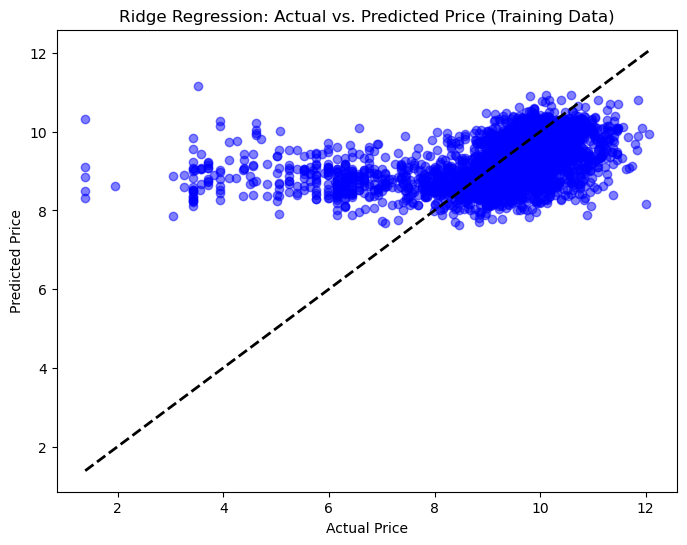

In [234]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression: Actual vs. Predicted Price (Training Data)')
plt.show()

In [236]:
lasso_coefficients = lasso_model.coef_
lasso_intercept = lasso_model.intercept_

print("Lasso Model Coefficients:", lasso_coefficients)
print("Lasso Model Intercept:", lasso_intercept)

Lasso Model Coefficients: [ 0.         -0.03066153 -0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.          0.0245719  -0.          0.
  0.         -0.          0.         -0.         -0.          0.

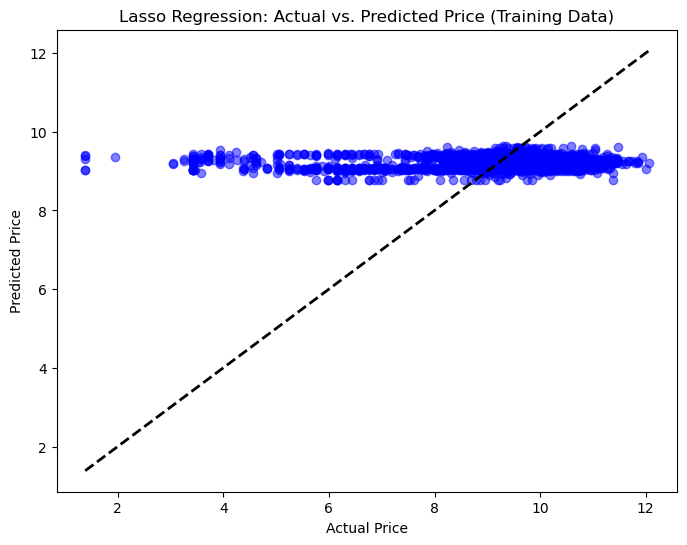

In [238]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression: Actual vs. Predicted Price (Training Data)')
plt.show()

In [240]:
df2 = df_final.copy()

In [242]:
from sklearn.preprocessing import StandardScaler ## formula for scaling is (x-mue) / sigma

In [244]:
scaler = StandardScaler()
df2[continuous] = scaler.fit_transform(df2[continuous])

In [246]:
df2 # after scaling you may get negative values

Price      Levy  Prod. year  Engine volume   Mileage  Cylinders  \
0     -0.033003  1.503384   -0.086315       1.596678 -0.030831          6   
1     -0.017369  0.472937    0.080021       0.976454 -0.030719          6   
2     -0.056081 -0.173458   -0.751658      -1.132305 -0.030570          4   
3     -0.079154  0.051022    0.080021       0.356231 -0.031149          4   
4     -0.040608 -1.074084    0.579029      -1.132305 -0.032589          4   
...         ...       ...         ...            ...       ...        ...   
19230 -0.094047 -0.535872    0.080021      -0.512082 -0.028565          4   
19232 -0.056081 -0.173458   -1.916010      -0.263992 -0.028702          4   
19233 -0.021832 -0.032820    0.080021       0.232186 -0.031287          4   
19234  0.027672 -0.019297   -0.086315      -0.263992 -0.032132          4   
19236 -0.094047 -0.243777    0.246357       0.232186 -0.030814          4   

       Airbags  Manufacturer_ACURA  Manufacturer_ALFA ROMEO  \
0           12               False                    False   
1            8               False                    False   
2            2               False                    False   
3            0               False                    False   
4            4               False                    False   
...        ...                 ...                      ...   
19230       12               False                    False   
19232        5               False                    False   
19233        8               False                    False   
19234        4               False                    False   
19236       12               False                    False   

       Manufacturer_ASTON MARTIN  ...  Color_Green  Color_Grey  Color_Orange  \
0                          False  ...        False       False         False   
1                          False  ...        False       False         False   
2                          False  ...        False       False         False   
3                          False  ...        False       False         False   
4                          False  ...        False       False         False   
...                          ...  ...          ...         ...           ...   
19230                      False  ...        False       False         False   
19232                      False  ...        False       False         False   
19233                      False  ...        False       False         False   
19234                      False  ...        False        True         False   
19236                      False  ...        False       False         False   

       Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Sky blue  \
0           False         False      False          True           False   
1           False         False      False         False           False   
2           False         False      False         False           False   
3           False         False      False         False           False   
4           False         False      False          True           False   
...           ...           ...        ...           ...             ...   
19230       False         False      False          True           False   
19232       False         False      False          True           False   
19233       False         False       True         False           False   
19234       False         False      False         False           False   
19236       False         False      False         False           False   

       Color_White  Color_Yellow  
0            False         False  
1            False         False  
2            False         False  
3             True         False  
4            False         False  
...            ...           ...  
19230        False         False  
19232        False         False  
19233        False         False  
19234        False         False  
19236         True         False  

[15725 rows x 117 columns]

In [248]:
from sklearn.svm import SVR

In [250]:
X = df2.drop('Price', axis=1)
y = df2['Price']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
svr_model = SVR()  
svr_model.fit(X_train, y_train)

SVR()

In [256]:
y_pred_test = svr_model.predict(X_test)

In [258]:
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Mean Squared Error (Test): {mse_test}')

Mean Squared Error (Test): 0.0035522323229316135


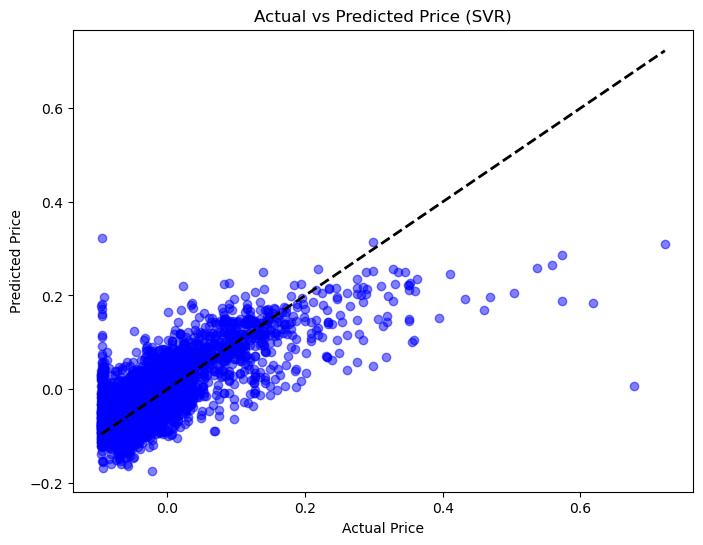

In [260]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (SVR)')
plt.show()

In [262]:
df3 = df_final.copy()

In [264]:
from sklearn.tree import DecisionTreeRegressor

In [266]:
X = df3.drop('Price', axis=1)
y = df3['Price']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [272]:
y_pred_test = dt_model.predict(X_test)

In [274]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Test): {mse_test}')

Mean Squared Error (Test): 220196320812.7783


In [276]:
scaler = StandardScaler()
df3[continuous] = scaler.fit_transform(df3[continuous])

In [278]:
X = df3.drop('Price', axis=1)
y = df3['Price']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [284]:
y_pred_dt = dt_model.predict(X_test)

In [286]:
mse_test = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error (Test): {mse_test}')

Mean Squared Error (Test): 4.963031217014507


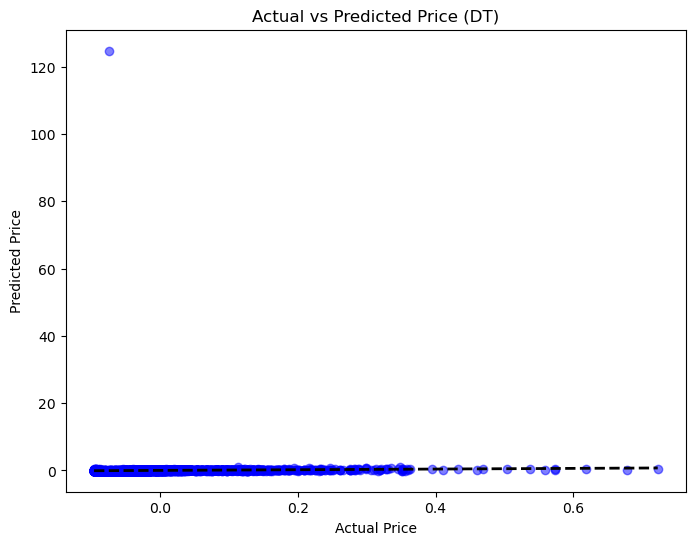

In [288]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (DT)')
plt.show()